# Treść

Treść zadania umieszczona jest we fragmentach w toku rozwiązania.

# Rozwiązanie

## 1.
Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem nagłówków, kodowania zbioru, separatorów itd.

In [94]:
install.packages('R.utils')
install.packages('corrplot')
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
library(data.table)
library(R.utils)
library(dplyr)
library(tidyr)
library(purrr)
library(ggplot2)
library(corrplot)
library(reshape2)

In [96]:
options(repr.matrix.max.cols=Inf)
options(repr.plot.width = 12, repr.plot.height = 10)

In [97]:
df <- fread('http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/listings.csv.gz')

## 2.
Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują)

In [98]:
dim(df)

[1] 91778    75

Obserwacji jest 91778, cech 75.

## 3.
Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych

In [99]:
tail(df, 4)

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
<chr>,<chr>,<int64>,<IDate>,<chr>,<chr>,<lgl>,<chr>,<chr>,<int>,<chr>,<chr>,<IDate>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<lgl>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<IDate>,<int>,<int>,<int>,<IDate>,<IDate>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<dbl>
951178246905249947,https://www.airbnb.com/rooms/951178246905249947,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · 3 bedrooms · 3 beds · 1 bath,NA,,https://a0.muscache.com/pictures/miso/Hosting-951178246905249947/original/09311848-7143-45dd-9080-8e943dcd8f8c.jpeg,211074697,https://www.airbnb.com/users/show/211074697,Abdul,2018-08-22,"London, United Kingdom",,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-211074697/original/36f9b14c-37d4-4b51-88f1-96c4a0d499bc.jpeg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/User-211074697/original/36f9b14c-37d4-4b51-88f1-96c4a0d499bc.jpeg?aki_policy=profile_x_medium,,7,13,"['email', 'phone']",t,t,,Lambeth,NA,51.48016,-0.1143752,Entire rental unit,Entire home/apt,6,NA,1 bath,NA,3,[],$289.00,3,20,3,7,20,20,3.1,20,NA,t,25,25,25,25,2023-12-10,2,2,0,2023-08-27,2023-09-10,3.00,3.00,3.00,4.00,4.00,4.00,3.00,NA,t,7,7,0,0,0.57
951188392382129035,https://www.airbnb.com/rooms/951188392382129035,20231210055232,2023-12-11,city scrape,Home in Greater London · 4 bedrooms · 4 beds · 1.5 baths,NA,,https://a0.muscache.com/pictures/b4758d11-e7dd-4851-9c5b-edac37646ee1.jpg,526113148,https://www.airbnb.com/users/show/526113148,Matthew,2023-07-16,,,within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/User-526113148/original/d1cddbed-e318-49e7-b23a-ce828954b28a.jpeg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/User-526113148/original/d1cddbed-e318-49e7-b23a-ce828954b28a.jpeg?aki_policy=profile_x_medium,,2,2,['phone'],t,t,,Kensington and Chelsea,NA,51.47832,-0.1806400,Entire home,Entire home/apt,7,NA,1.5 baths,NA,4,[],$400.00,1,365,1,1,365,365,1.0,365,NA,t,11,41,68,227,2023-12-11,2,2,0,2023-09-17,2023-10-08,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NA,f,2,2,0,0,0.70
951192793768996976,https://www.airbnb.com/rooms/951192793768996976,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · 1 bedroom · 1 bed · Half-bath,NA,,https://a0.muscache.com/pictures/miso/Hosting-951192793768996976/original/decbec06-4533-4cca-9f11-a595888c8c0f.jpeg,56125082,https://www.airbnb.com/users/show/56125082,Ellis,2016-01-25,,,a few days or more,0%,0%,f,https://a0.muscache.com/im

## 4.
Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.)

In [100]:
glimpse(df)

Rows: 91,778
Columns: 75
$ id                                           <chr> "198258", "33332", "42010…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <int64> 20231210055232, 2023121…
$ last_scraped                                 <IDate> 2023-12-10, 2023-12-10,…
$ source                                       <chr> "city scrape", "city scra…
$ name                                         <chr> "Rental unit in Barking ·…
$ description                                  <lgl> NA, NA, NA, NA, NA, NA, N…
$ neighborhood_overview                        <chr> "I live in Barking town c…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <int> 967537, 144444, 157884, 1…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "Ryan", "Chi-Chi", "Agri …
$ host_since   

## 5.
Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje, takie jak:  
a. wartości minimalne,  
b. wartości maksymalne,  
c. średnia,  
d. mediana,  
e. drugi (dolny) kwartyl,  
f. trzeci (górny) kwartyl,  
g. odchylenie standardowe,  
h. liczba danych brakujących lub nienumerycznych.  
W tym kroku należy również dokonać analogicznej analizy zmiennych kategorycznych, dającej dla każdej z nich informacje m.in. takie jak:  
a. liczby poszczególnych kategorii i ich liczności,  
b. wartości najczęściej występującej i częstości jej występowania,  
c. liczba wartości unikalnych,  
d. liczba braków danych.

In [101]:
# Statystyki dla zmiennych numerycznych
numerical_cols <- select_if(df, is.numeric)
summary(numerical_cols)

   scrape_id                 host_id          host_listings_count
 Min.   :20231210055232   Min.   :     4775   Min.   :   1.00    
 1st Qu.:20231210055232   1st Qu.: 22604674   1st Qu.:   1.00    
 Median :20231210055232   Median : 84236066   Median :   2.00    
 Mean   :20231210055232   Mean   :165687783   Mean   :  43.34    
 3rd Qu.:20231210055232   3rd Qu.:279510081   3rd Qu.:   7.00    
 Max.   :20231210055232   Max.   :550101907   Max.   :2475.00    
                                              NA's   :5          
 host_total_listings_count    latitude       longitude         accommodates   
 Min.   :   1.00           Min.   :51.30   Min.   :-0.49780   Min.   : 1.000  
 1st Qu.:   1.00           1st Qu.:51.48   1st Qu.:-0.18949   1st Qu.: 2.000  
 Median :   3.00           Median :51.51   Median :-0.12621   Median : 2.000  
 Mean   :  86.19           Mean   :51.51   Mean   :-0.12775   Mean   : 3.186  
 3rd Qu.:  11.00           3rd Qu.:51.54   3rd Qu.:-0.06772   3rd Qu.: 4.000 

In [102]:
# Statystyki dla zmiennych kategorycznych
categorical_cols <- select_if(df, is.character)

summary_categorical <- categorical_cols %>%
  summarise_all(list(
    n_categories = ~length(unique(.)),
    most_common_value = ~names(which.max(table(.))),
    frequency_most_common = ~max(table(.)) / sum(table(.)),
    n_unique = ~length(unique(.)),
    na_count = ~sum(is.na(.))
  ))

print(summary_categorical)

  id_n_categories listing_url_n_categories source_n_categories
1           91778                    91778                   2
  name_n_categories neighborhood_overview_n_categories picture_url_n_categories
1             21551                              39641                    89269
  host_url_n_categories host_name_n_categories host_location_n_categories
1                 55343                  15482                       1693
  host_about_n_categories host_response_time_n_categories
1                   24498                               6
  host_response_rate_n_categories host_acceptance_rate_n_categories
1                              92                               102
  host_is_superhost_n_categories host_thumbnail_url_n_categories
1                              3                           53204
  host_picture_url_n_categories host_neighbourhood_n_categories
1                         53204                             644
  host_verifications_n_categories host_has_profile_pic_n

## 6.
Sprawdzenie, czy w zbiorze występują braki danych. Należy sporządzić odrębne podsumowanie, skupiając się na poszukiwaniu brakujących wartości w zbiorze – Pozwoli to Państwu odpowiedzieć na pytanie, jakie zmienne zawierają braki i jaka jest ich liczba, z czego mogą one wynikać itd.
Etap ten (wraz z poprzednim) pozwoli Państwu odnaleźć błędy w danych – brakujące wartości, błędne interpretacje rodzaju zmiennych itp. Da również wskazówki, które atrybuty wybrać do analizy (pod kątem ich istotności dla przewidywań modelu), czy i jak uzupełnić brakujące dane (ewentualnie usunąć wiersze/kolumny, zawierające zbyt wiele braków danych), dokonać ich transformacji itd.

In [103]:
glimpse(df)

Rows: 91,778
Columns: 75
$ id                                           <chr> "198258", "33332", "42010…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <int64> 20231210055232, 2023121…
$ last_scraped                                 <IDate> 2023-12-10, 2023-12-10,…
$ source                                       <chr> "city scrape", "city scra…
$ name                                         <chr> "Rental unit in Barking ·…
$ description                                  <lgl> NA, NA, NA, NA, NA, NA, N…
$ neighborhood_overview                        <chr> "I live in Barking town c…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <int> 967537, 144444, 157884, 1…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "Ryan", "Chi-Chi", "Agri …
$ host_since   

In [104]:
# Procentowa wartość brakujących danych
missing_percentages <- df %>%
  summarise_all(~ mean(is.na(.)) * 100) %>%
  gather(key = "variable", value = "missing_percentage") %>%
  filter(missing_percentage > 0) %>%
  mutate(missing_percentage = sprintf("%.2f%%", missing_percentage)) %>%
  arrange(desc(as.numeric(gsub("%", "", missing_percentage))))

print(missing_percentages)

                       variable missing_percentage
1                   description            100.00%
2  neighbourhood_group_cleansed            100.00%
3                     bathrooms            100.00%
4              calendar_updated            100.00%
5                       license            100.00%
6                      bedrooms             99.98%
7                  first_review             26.28%
8                   last_review             26.28%
9         review_scores_checkin             26.28%
10       review_scores_location             26.28%
11          review_scores_value             26.28%
12            reviews_per_month             26.28%
13       review_scores_accuracy             26.25%
14  review_scores_communication             26.25%
15    review_scores_cleanliness             26.24%
16         review_scores_rating             26.22%
17                         beds              1.22%
18                   host_since              0.01%
19          host_listings_count

## 7.
Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych

In [105]:
# Stworzenie string z cechami numerycznymi
features_num <- colnames(df)[sapply(df, is.numeric)]
features_num_string <- paste0("'", features_num, "', ", collapse = "")
print(features_num_string)

[1] "'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', "


In [106]:
# zmienne numeryczne - wybrane (niepotrzebne zostały usunięte)
numerical <- c(
  # 'scrape_id', - nieważne
  # 'description', - puste
  # 'host_id', - nieważne
  'host_listings_count',
  'host_total_listings_count',
  # 'neighbourhood_group_cleansed', - puste
  'latitude',
  'longitude',
  'accommodates',
  # 'bathrooms', - puste
  # 'bedrooms', - puste
  'beds',
  'minimum_nights',
  'maximum_nights',
  'minimum_minimum_nights',
  'maximum_minimum_nights',
  'minimum_maximum_nights',
  'maximum_maximum_nights',
  'minimum_nights_avg_ntm',
  'maximum_nights_avg_ntm',
  # 'calendar_updated', - puste
  'availability_30',
  'availability_60',
  'availability_90',
  'availability_365',
  'number_of_reviews',
  'number_of_reviews_ltm',
  'number_of_reviews_l30d',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value',
  # 'license', - puste
  'calculated_host_listings_count',
  'calculated_host_listings_count_entire_homes',
  'calculated_host_listings_count_private_rooms',
  'calculated_host_listings_count_shared_rooms',
  'reviews_per_month'
)

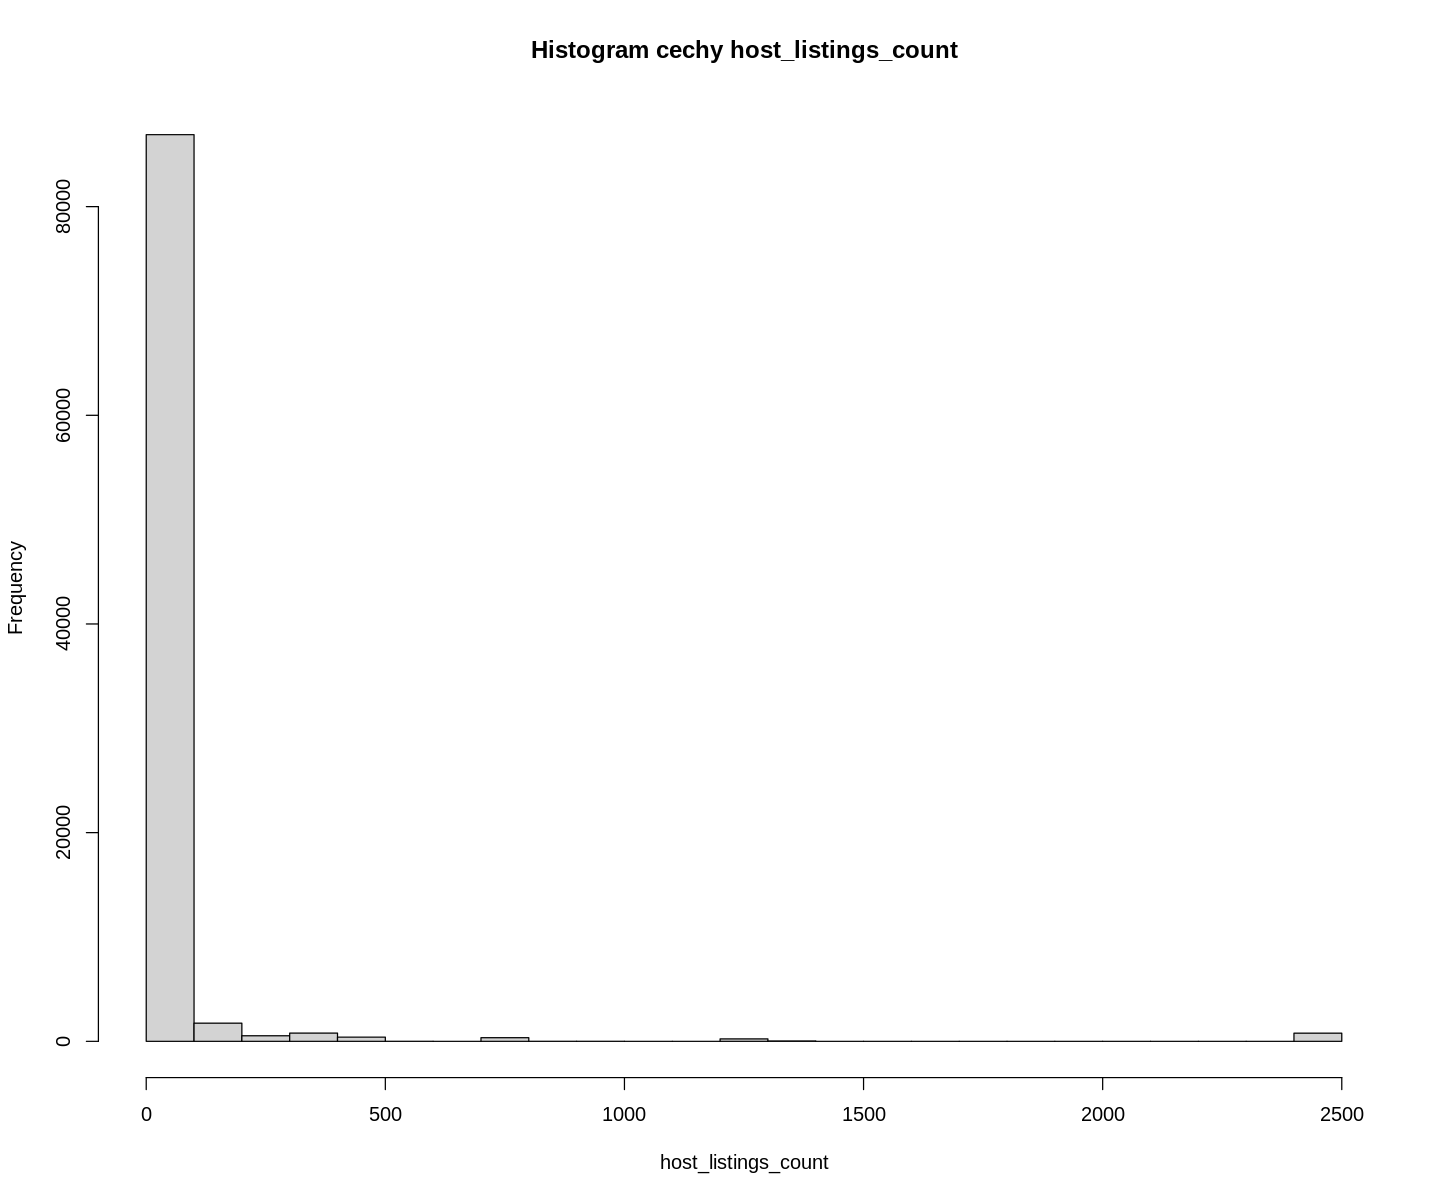

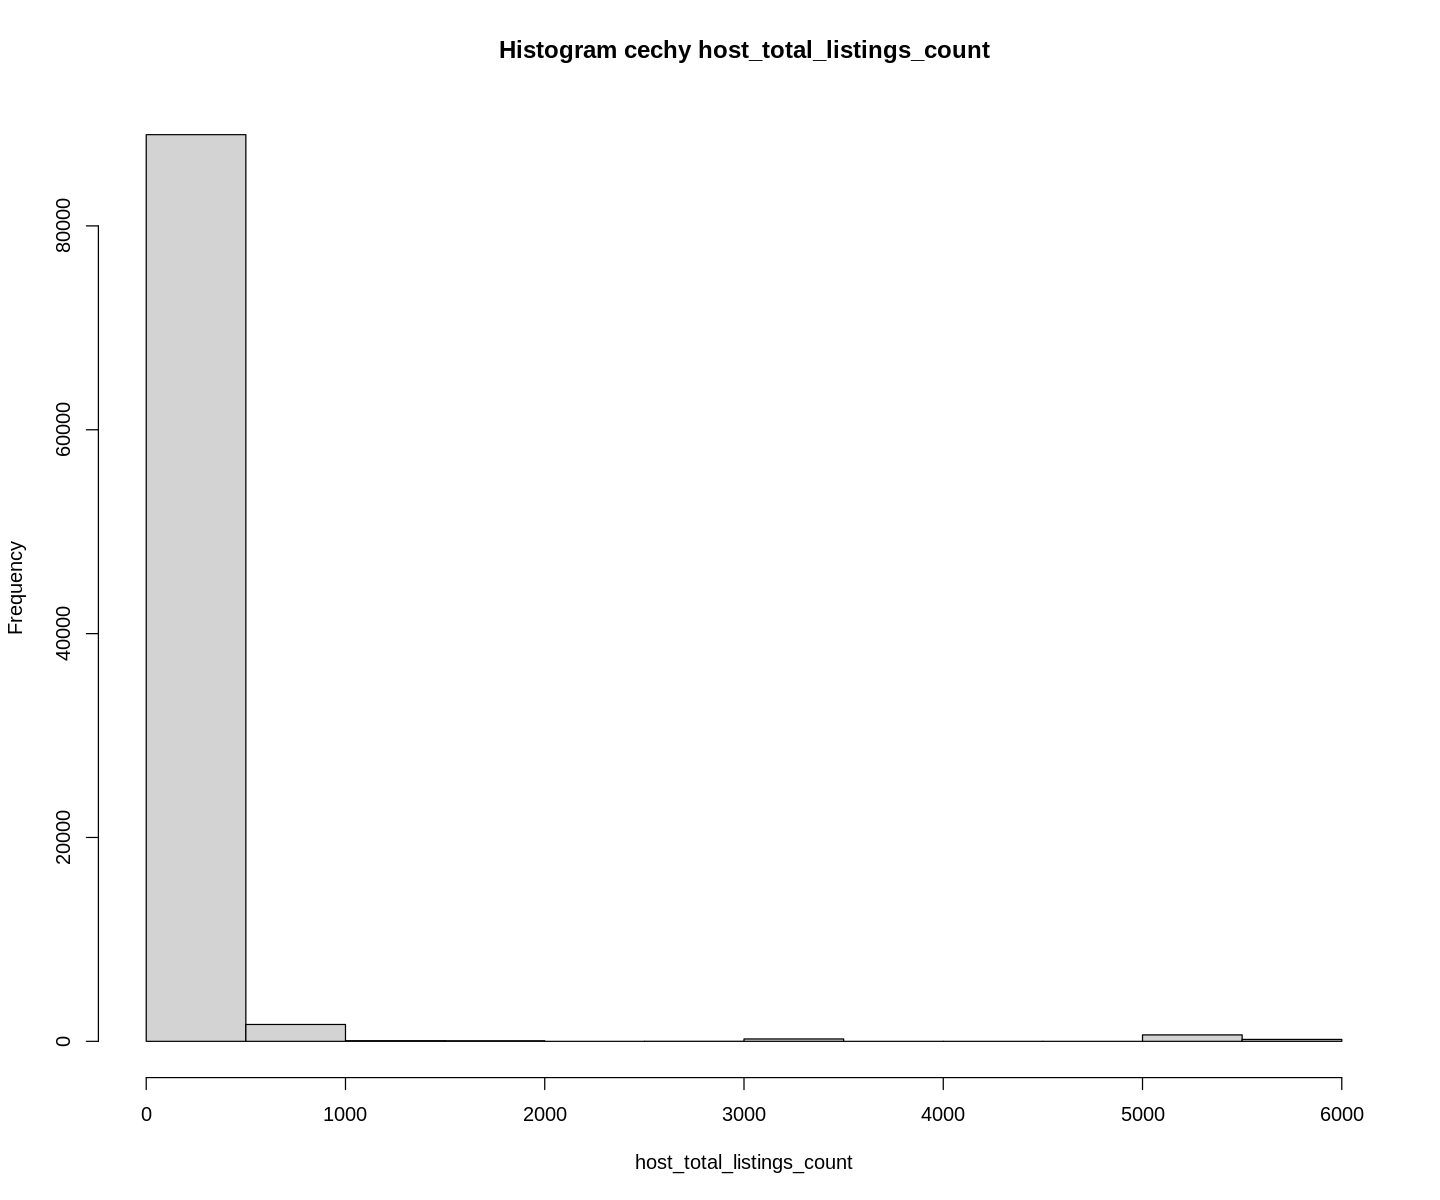

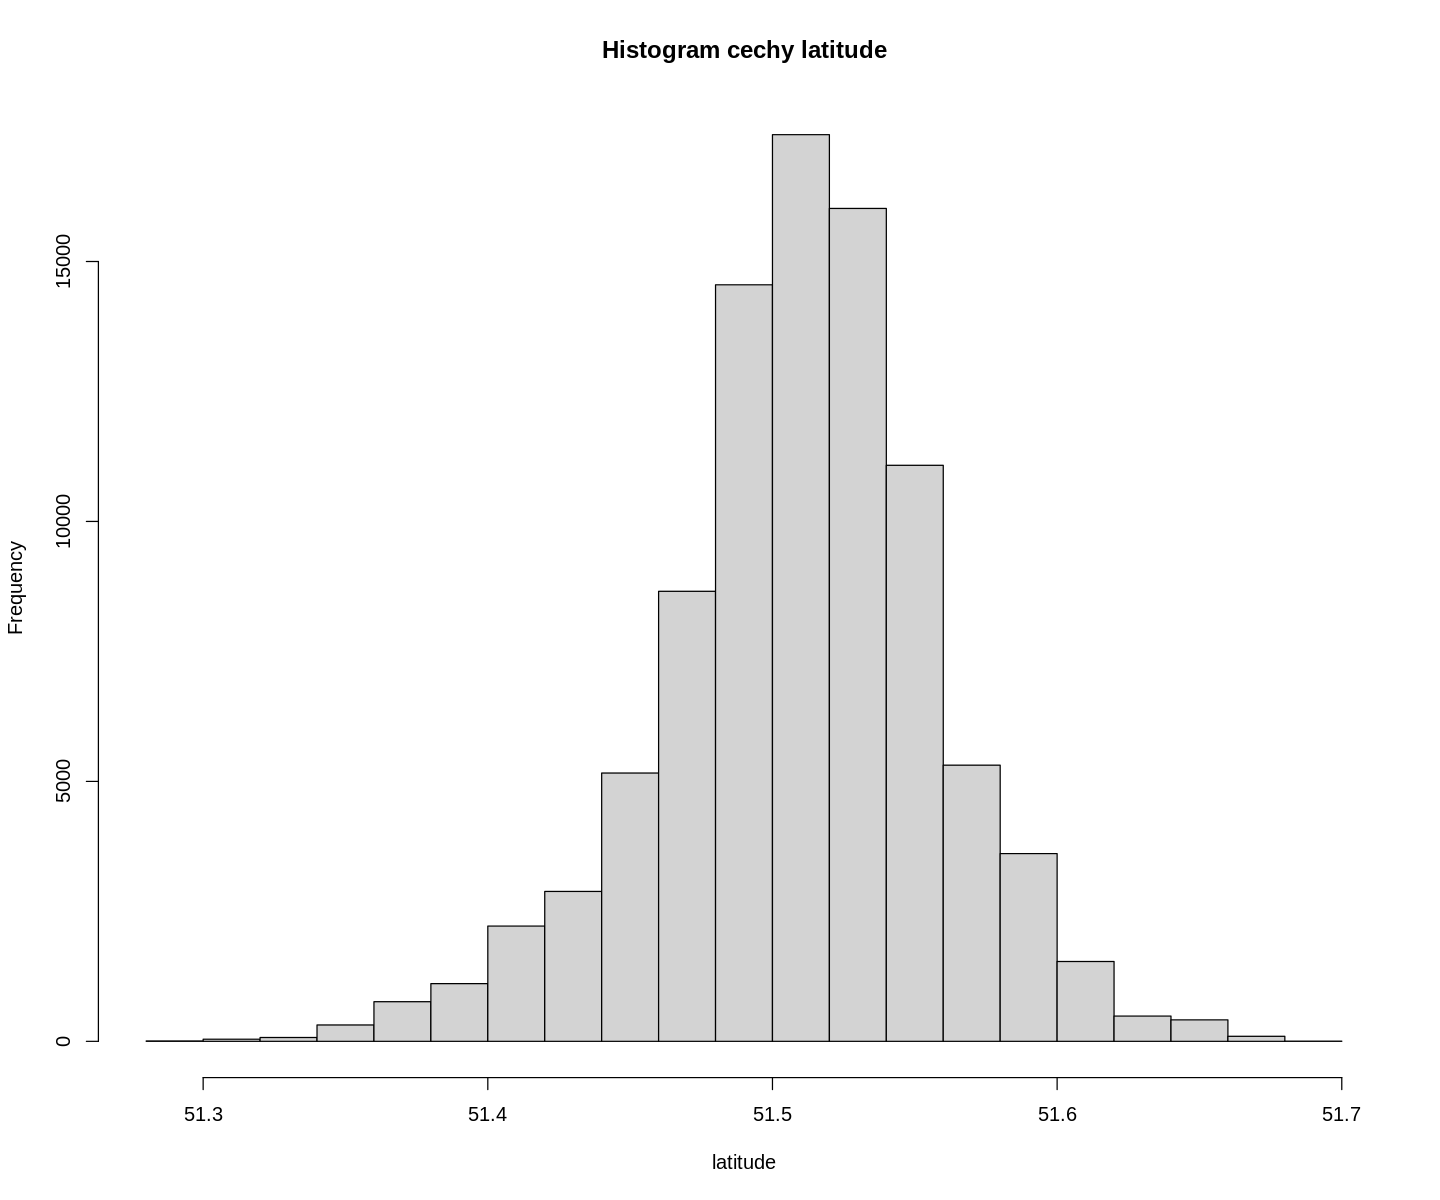

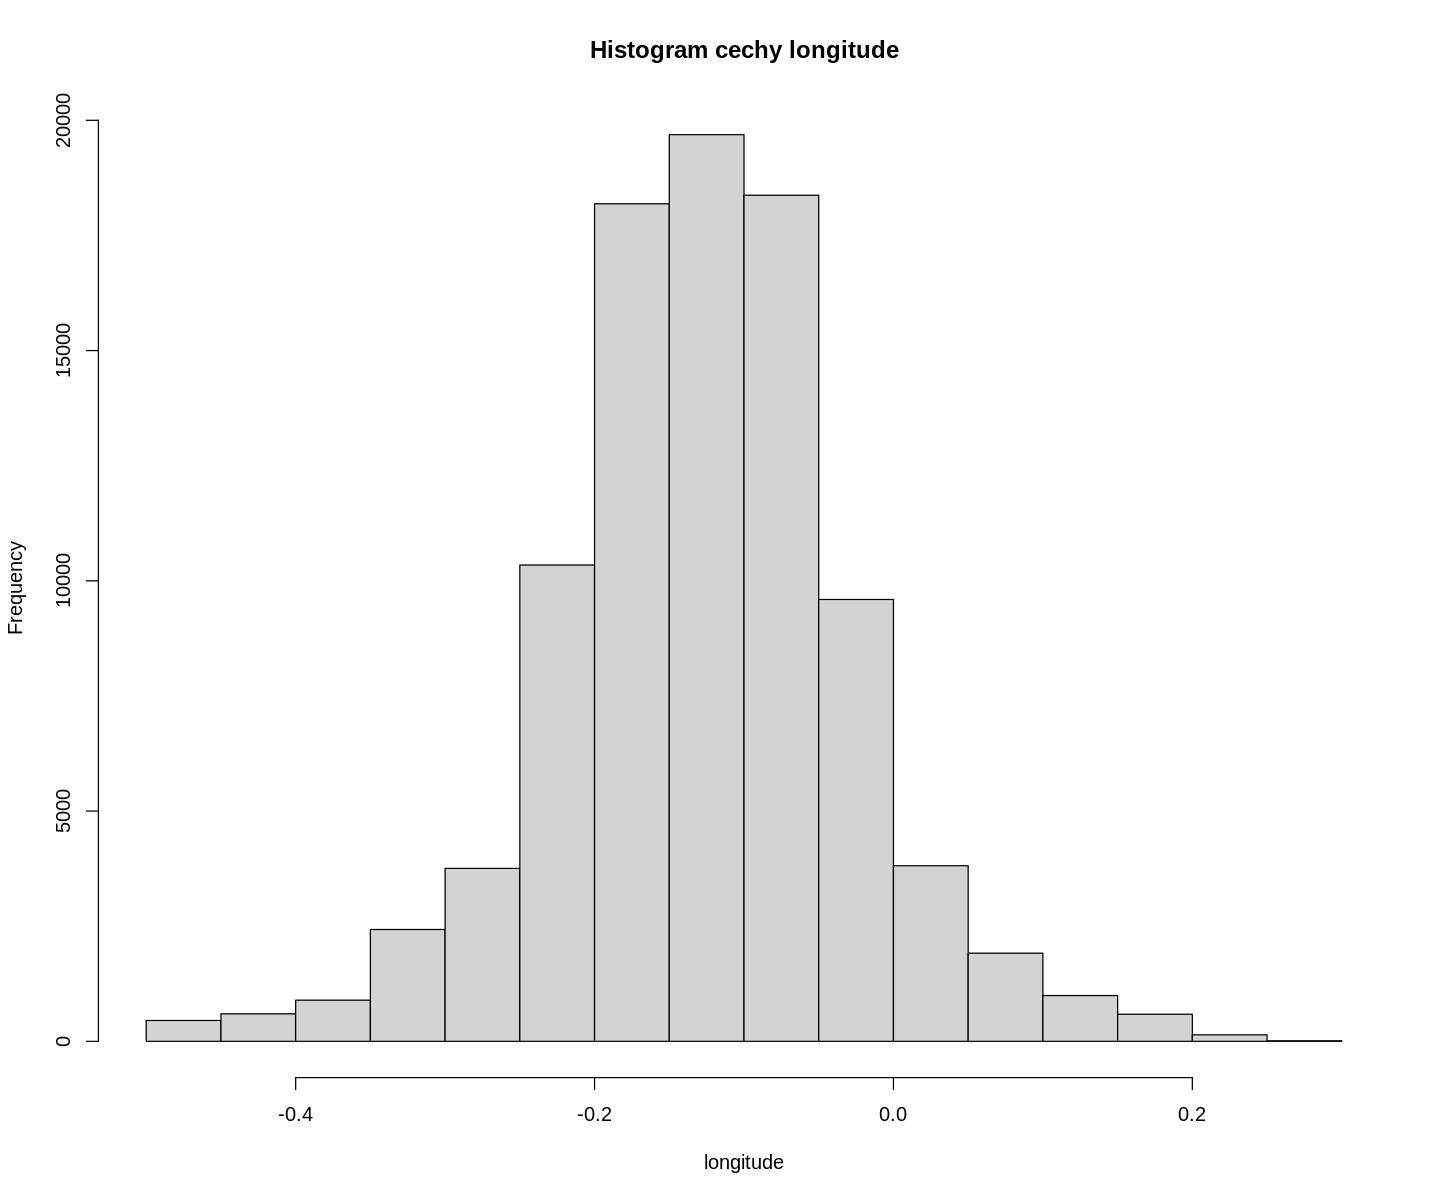

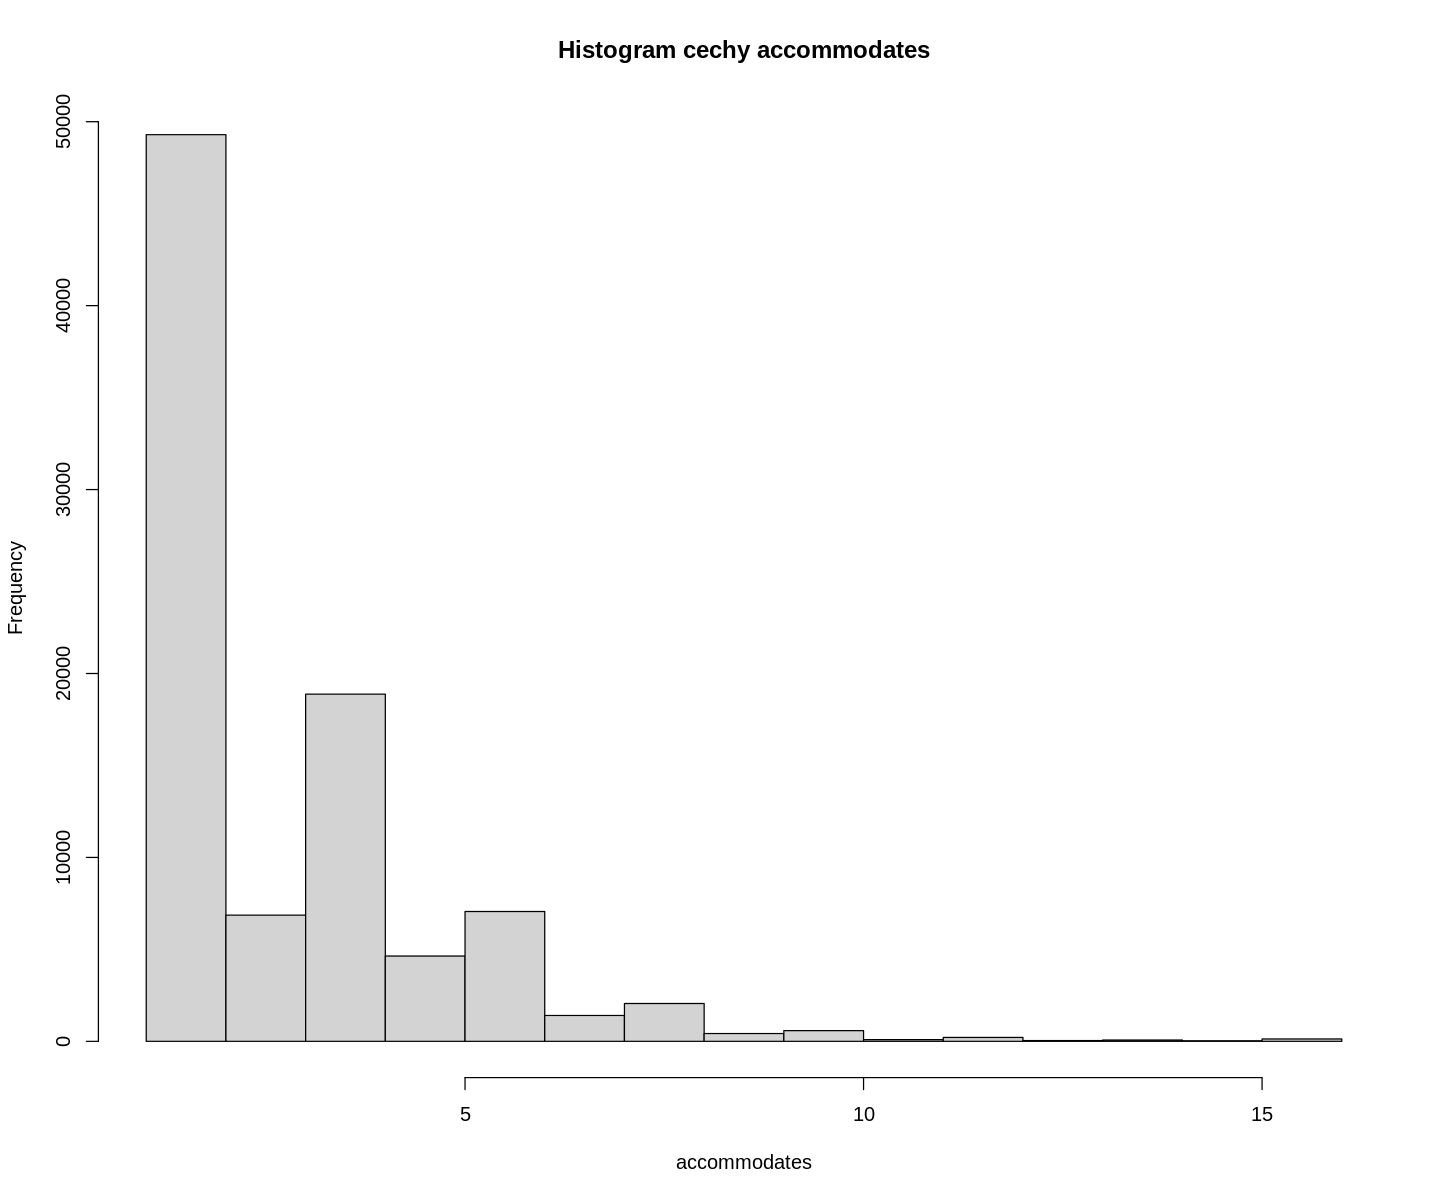

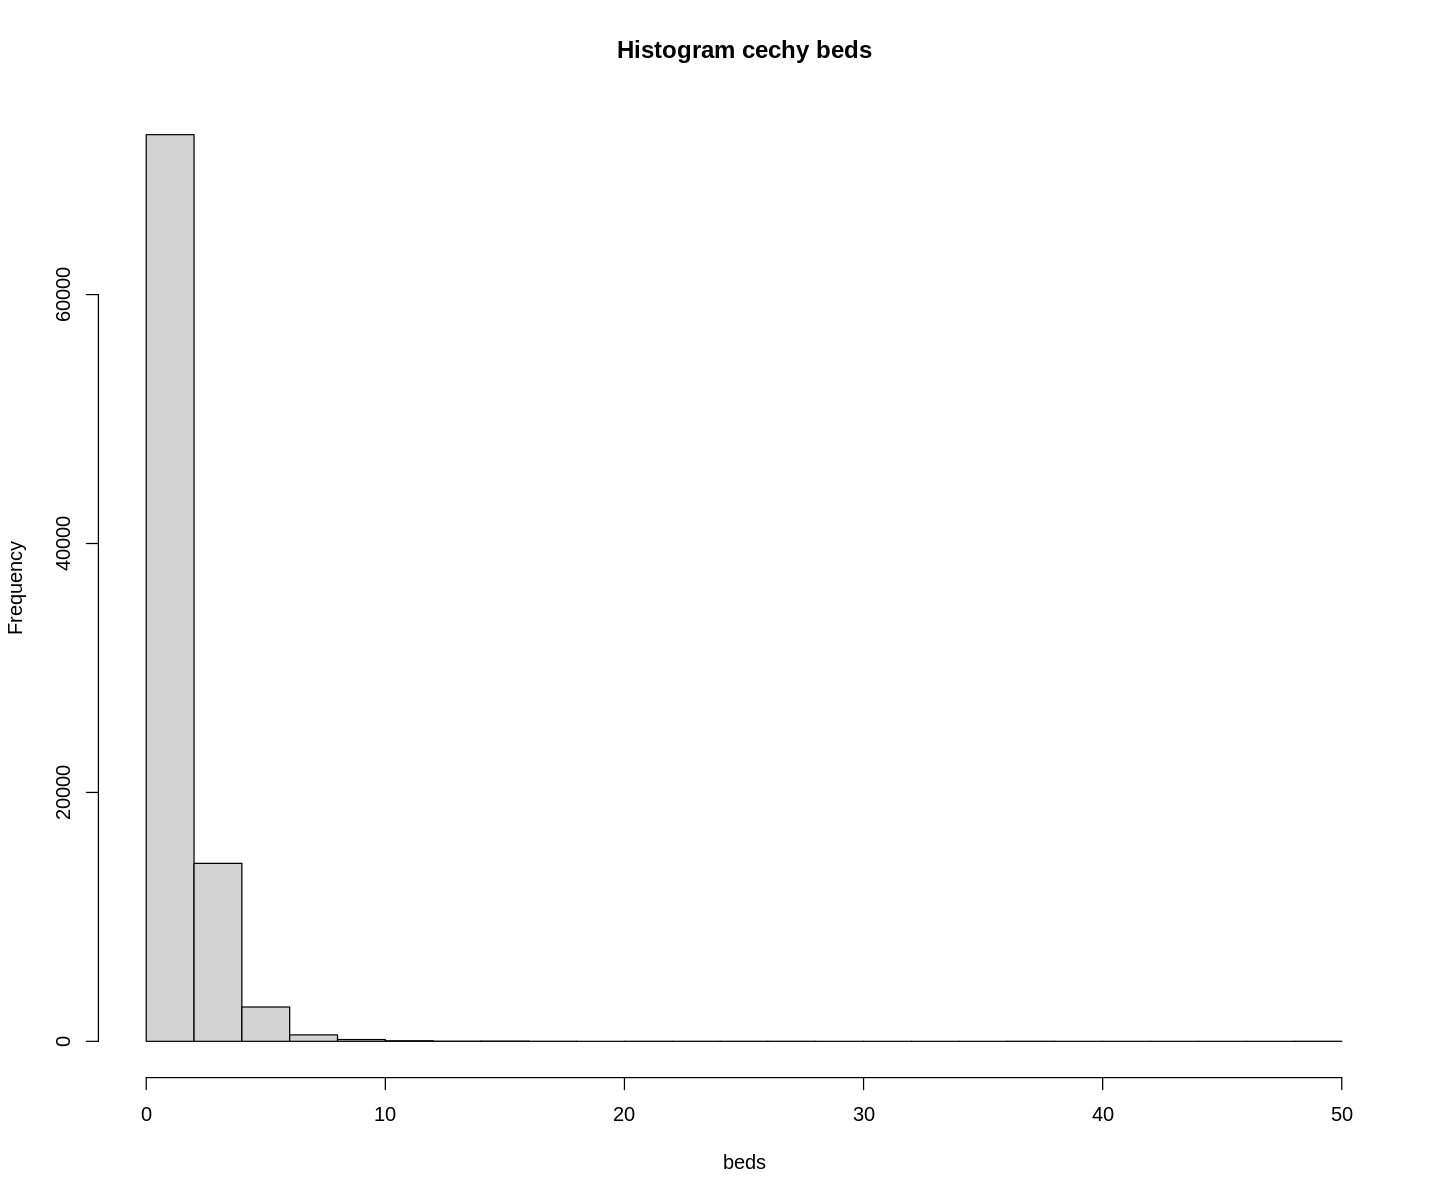

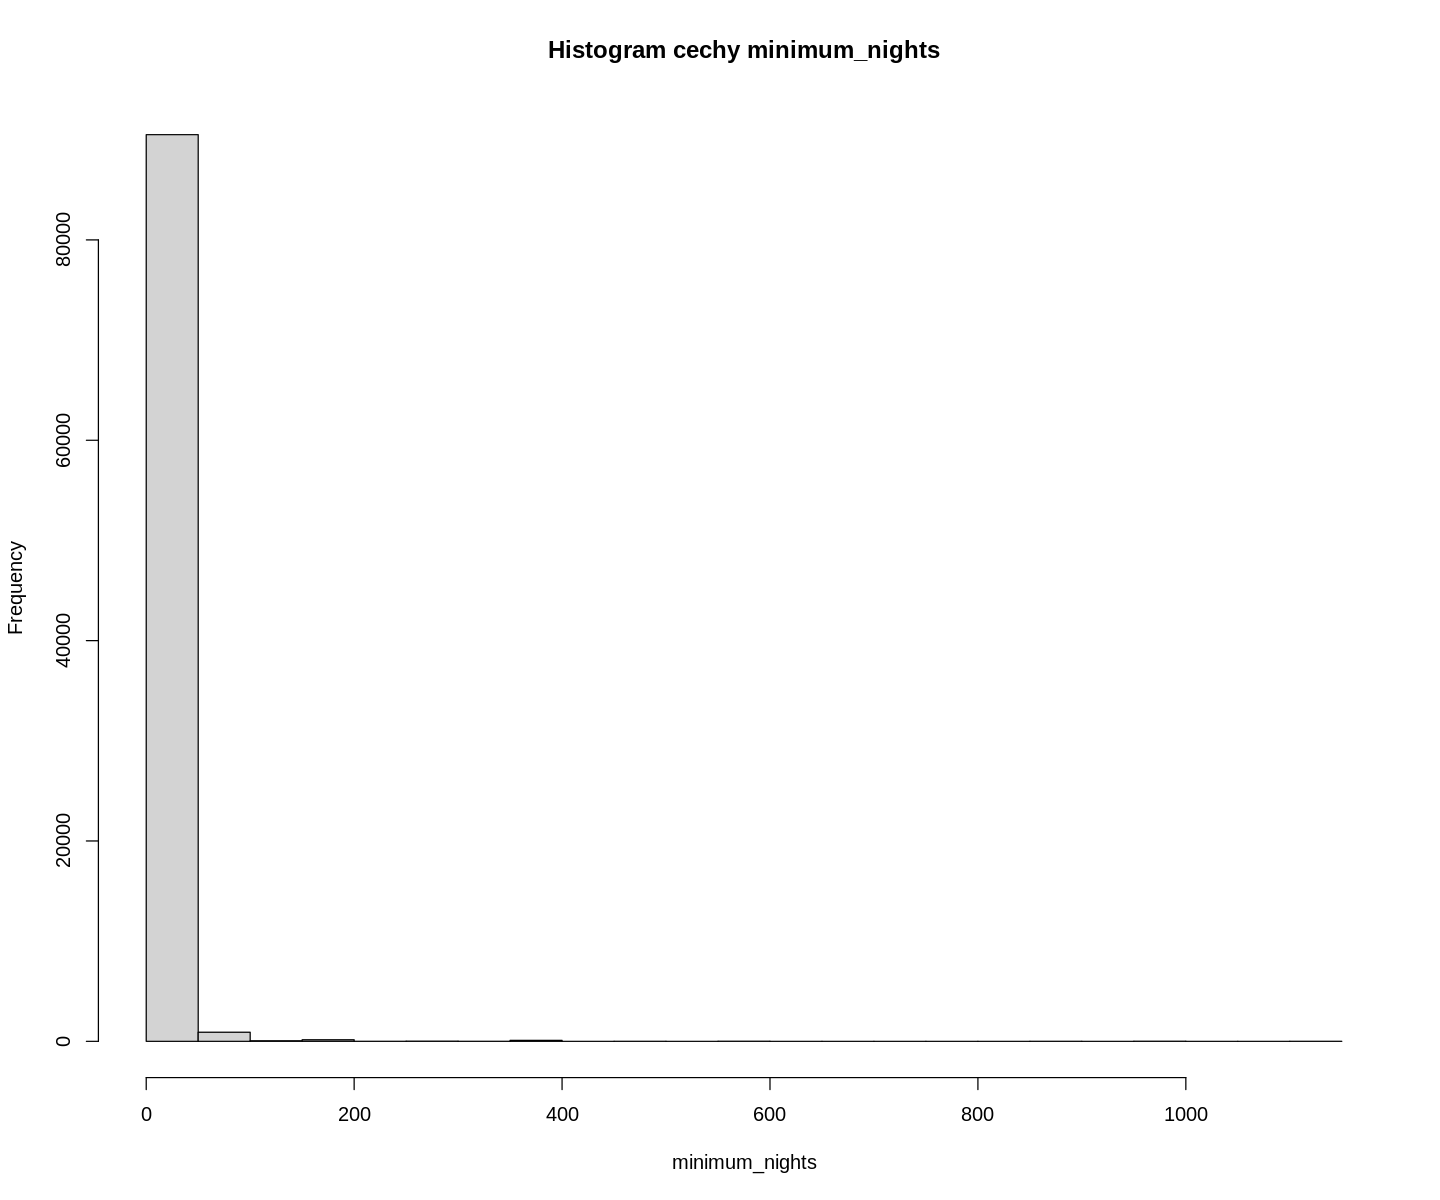

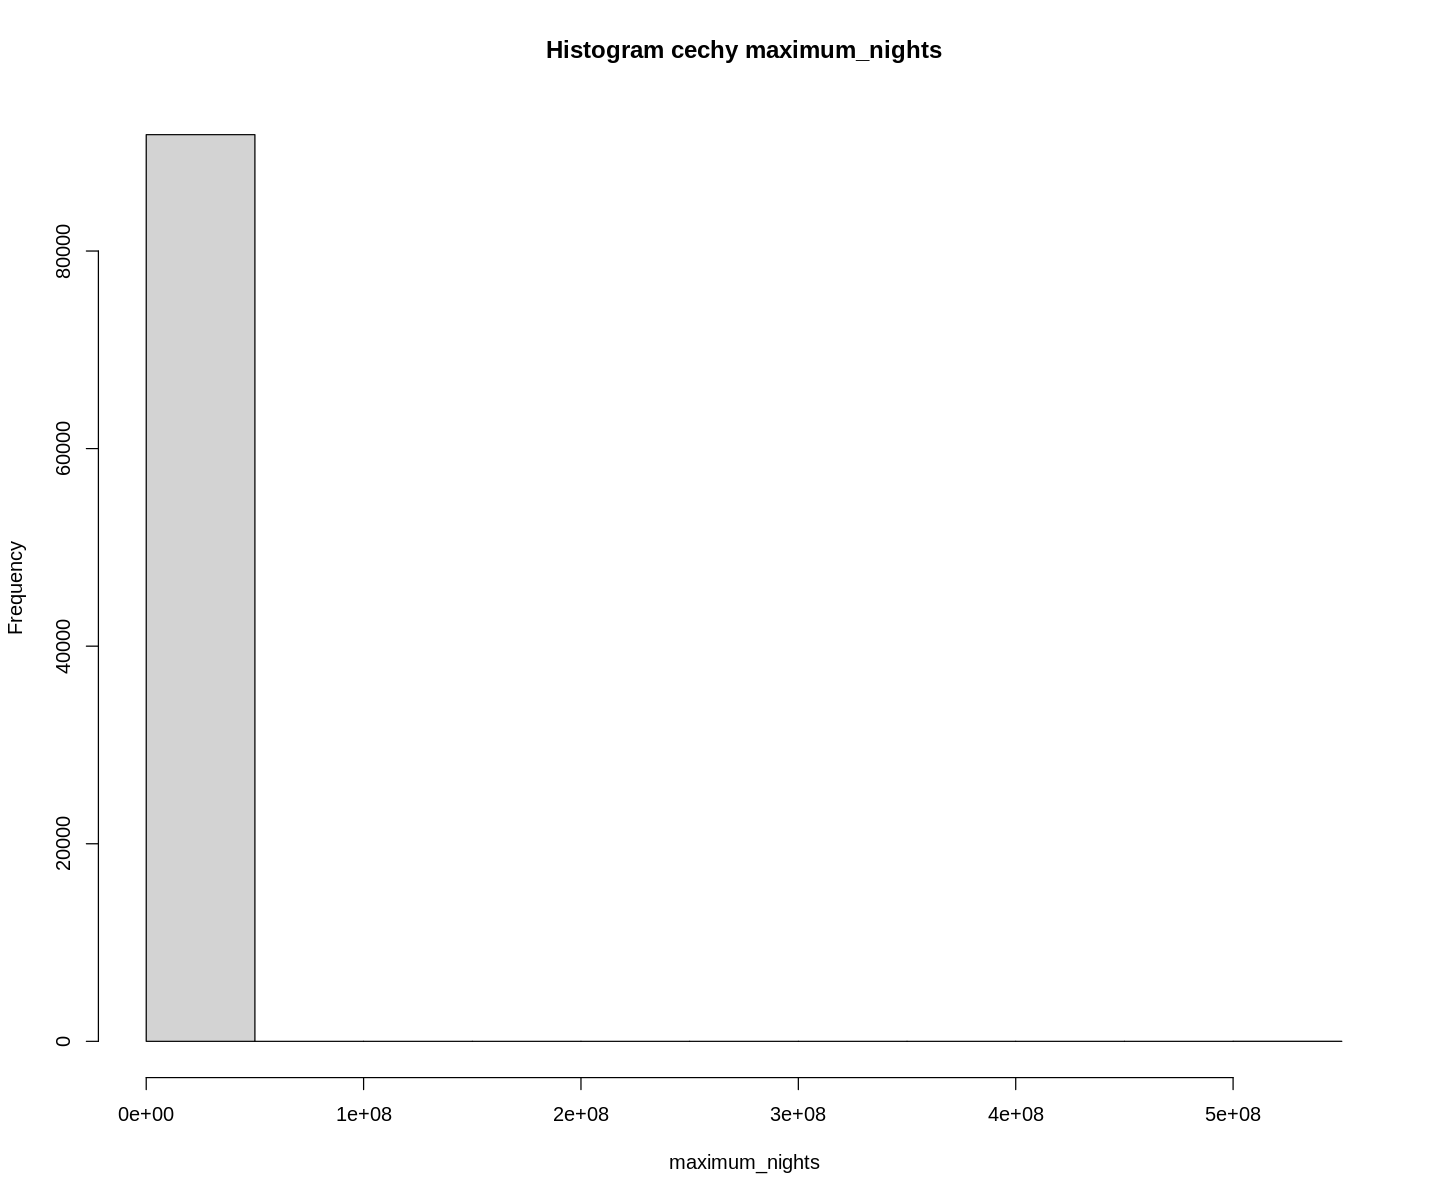

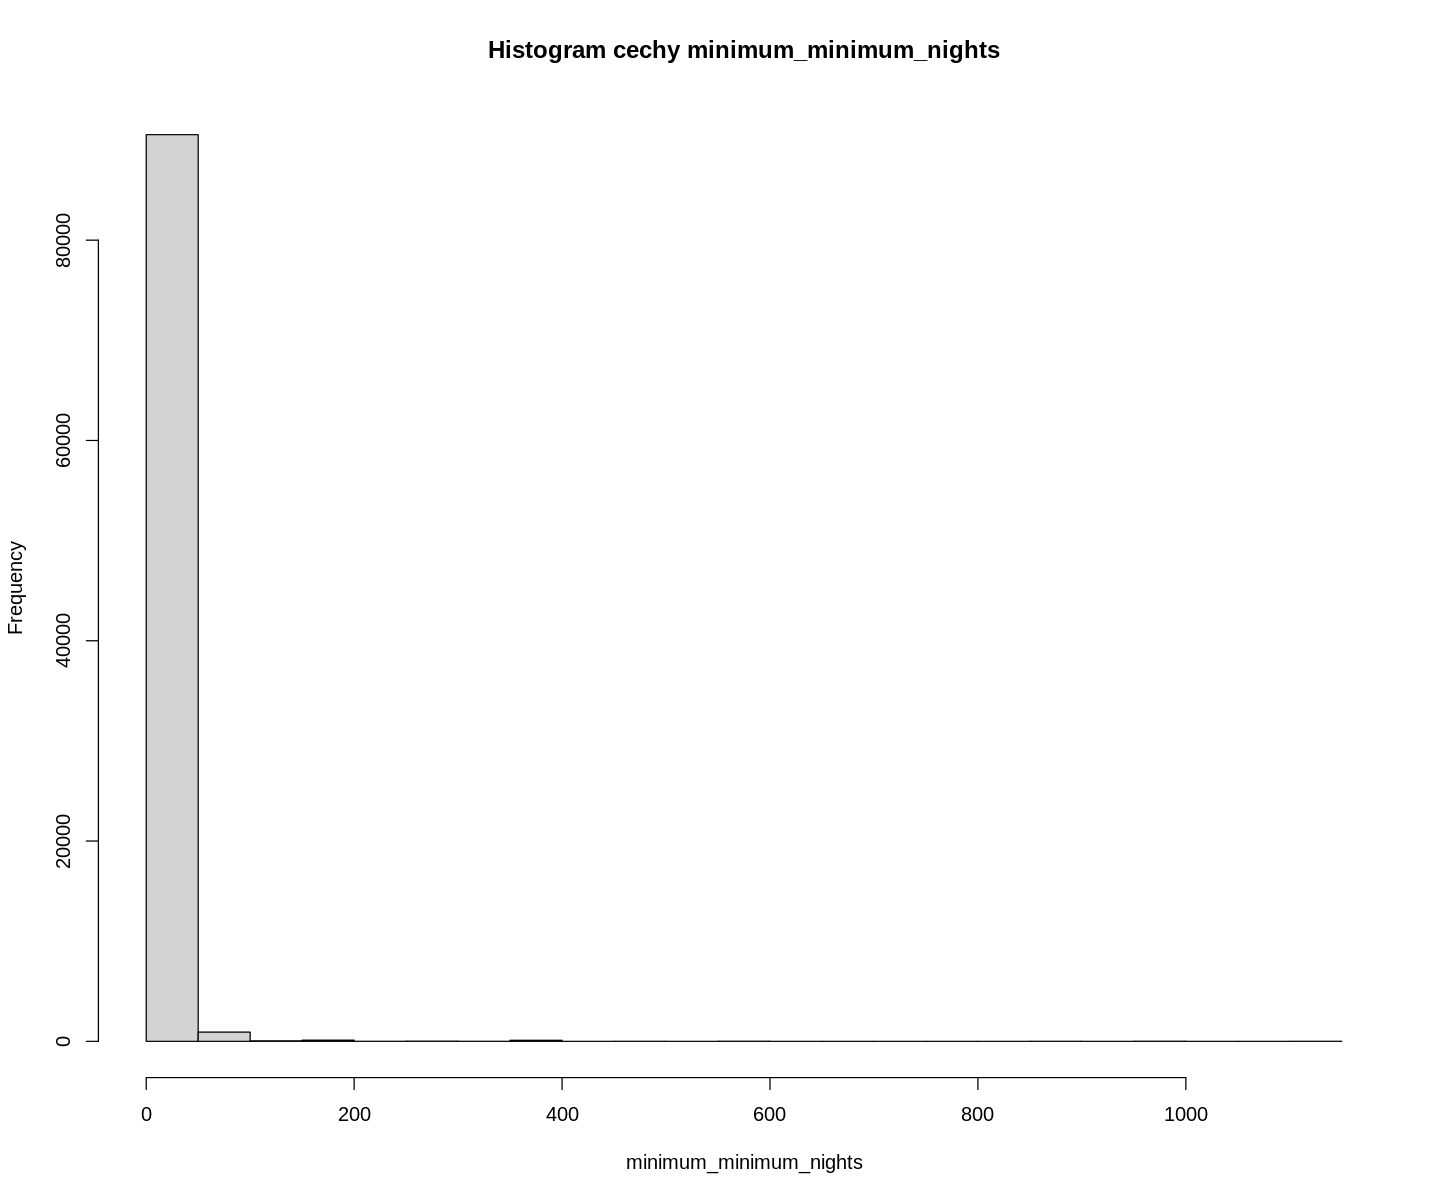

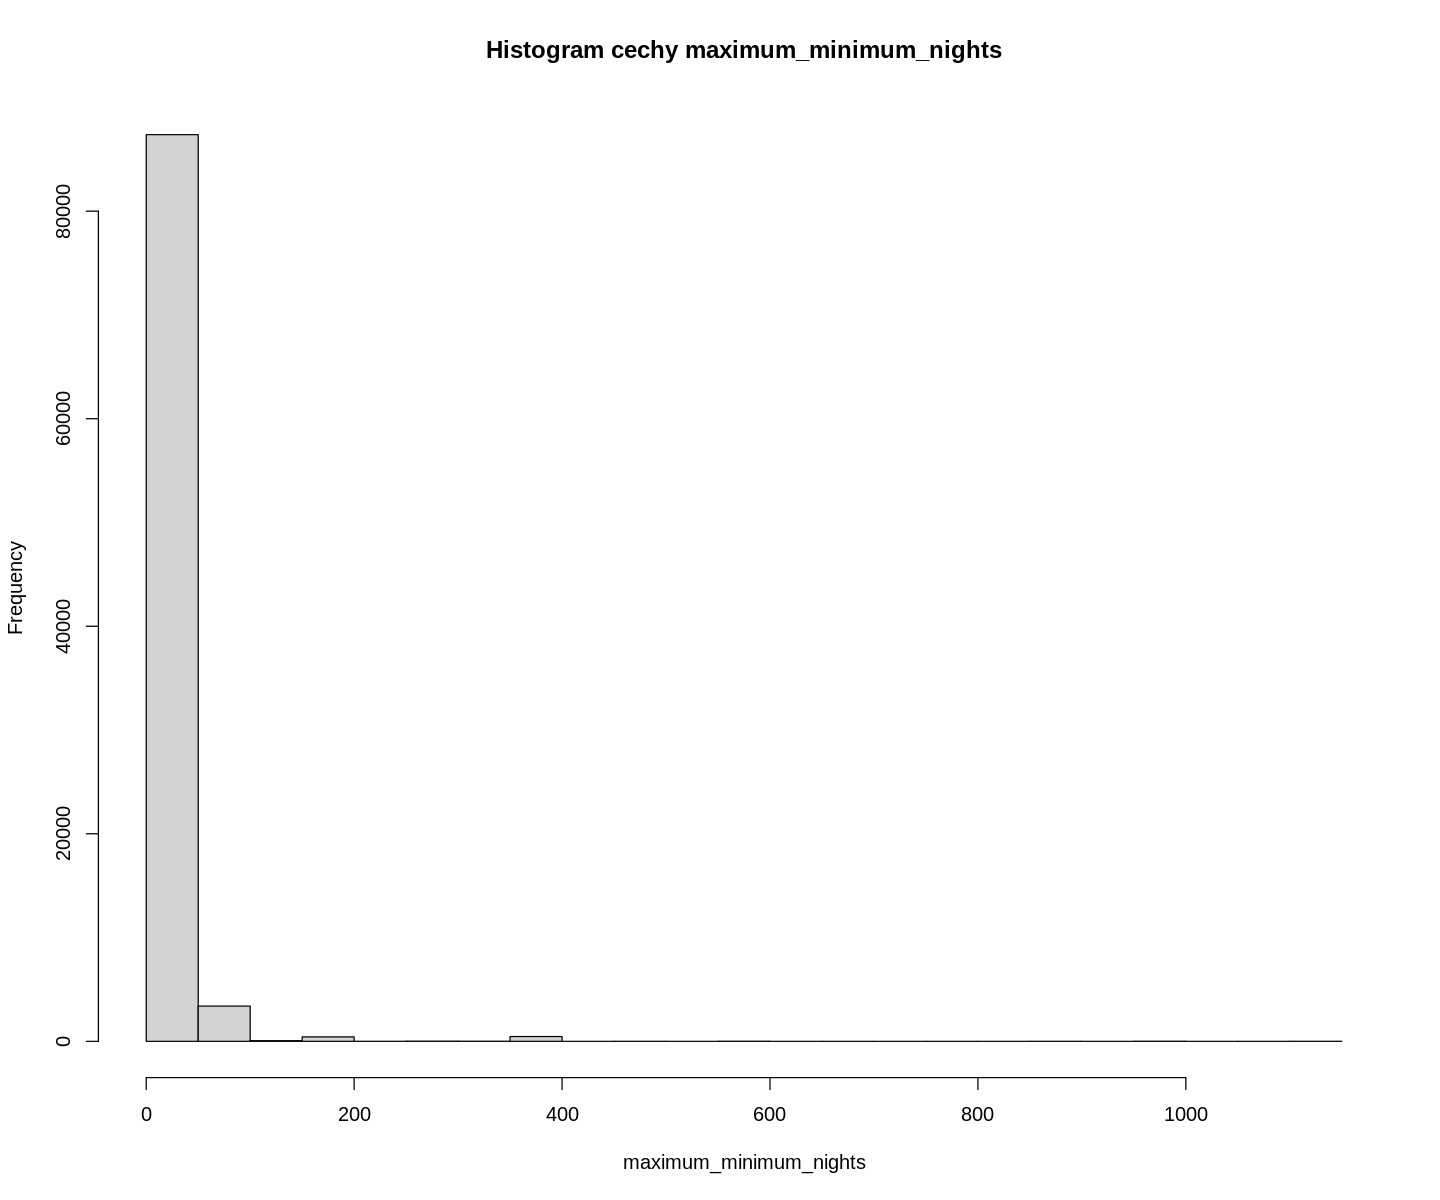

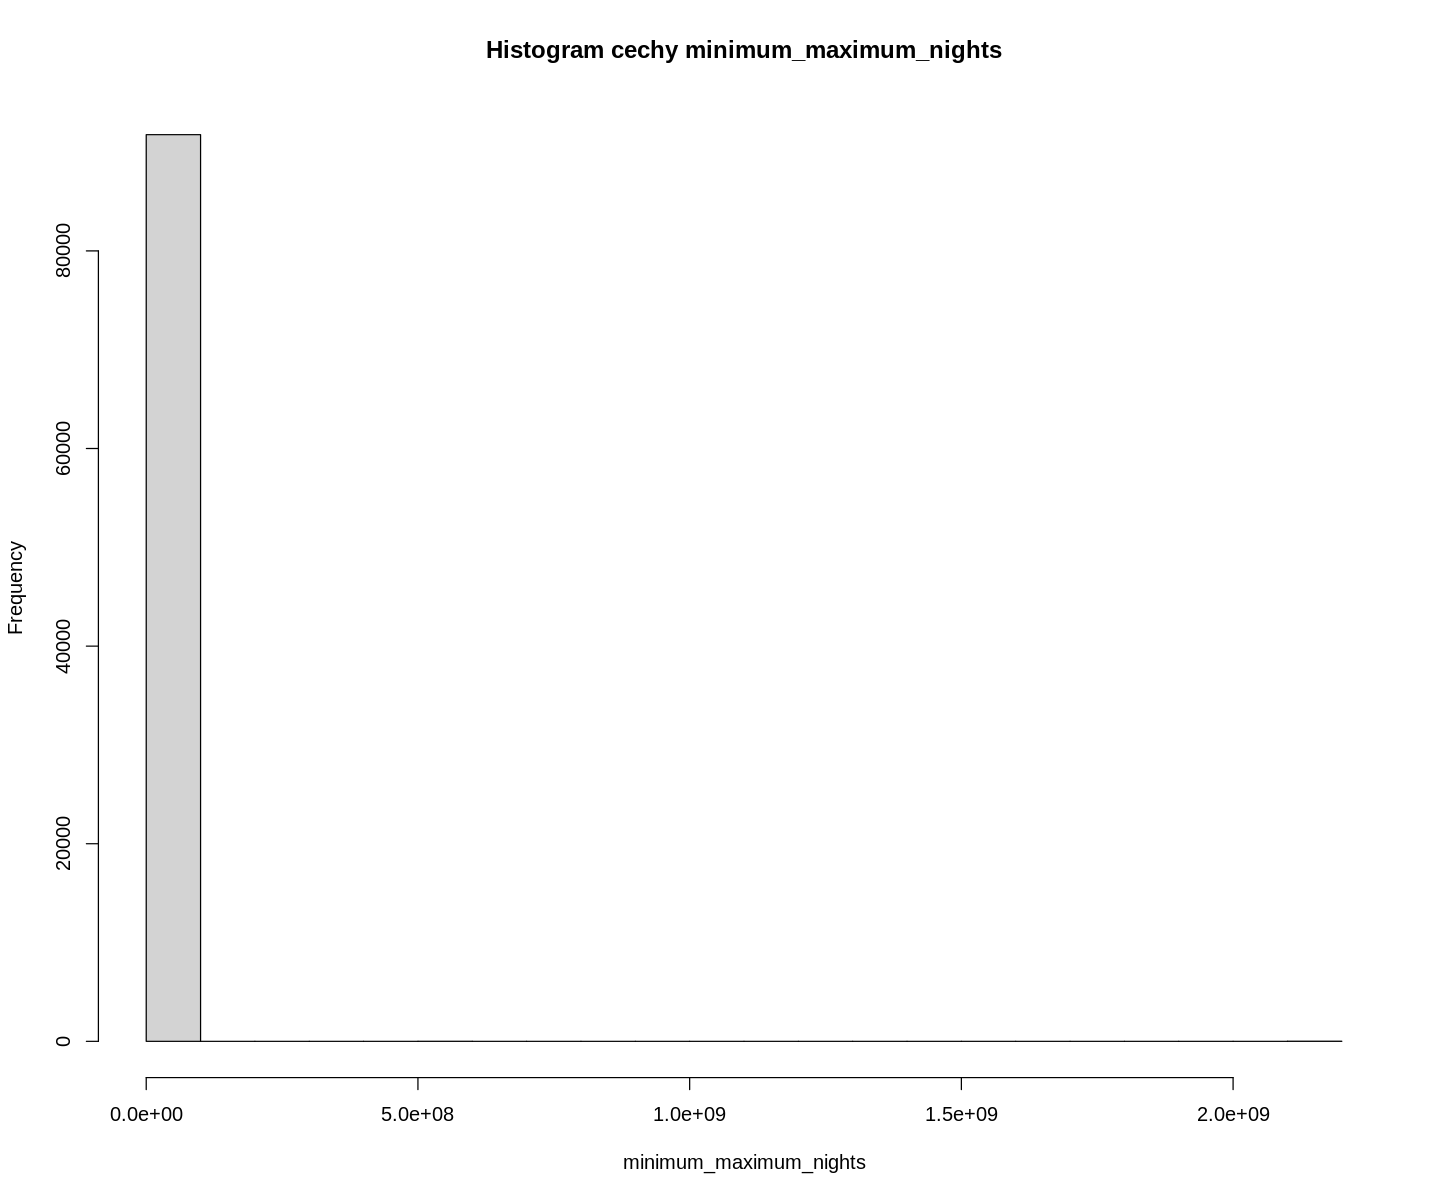

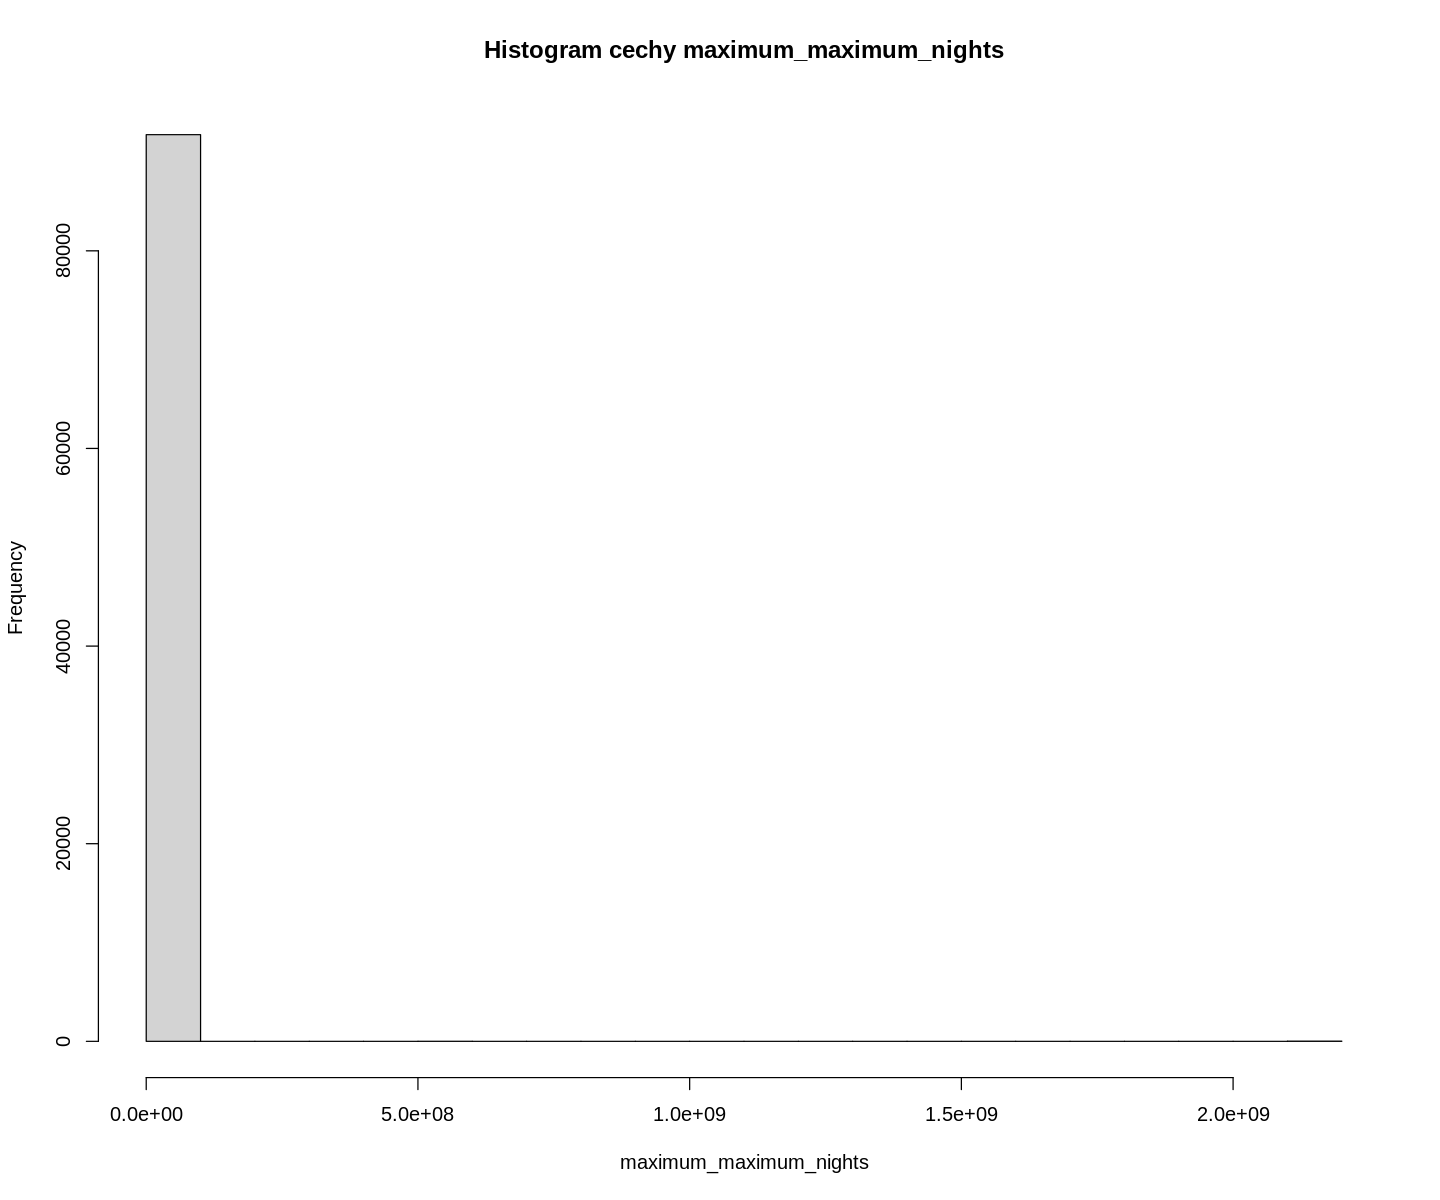

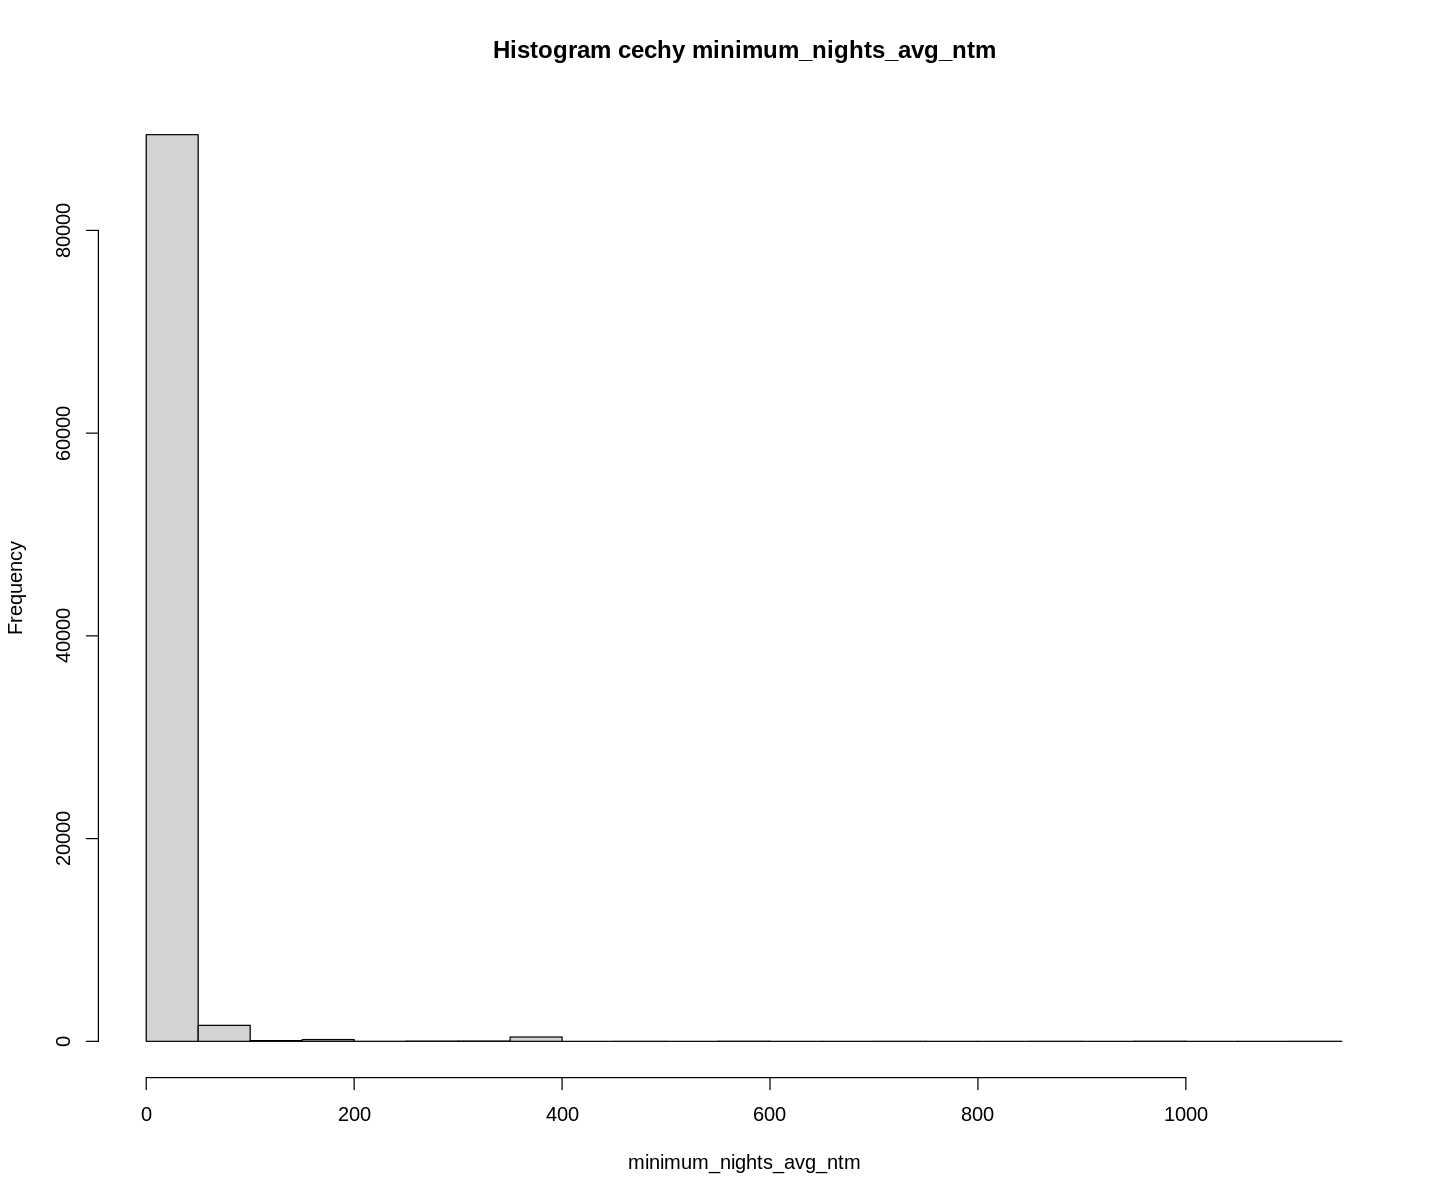

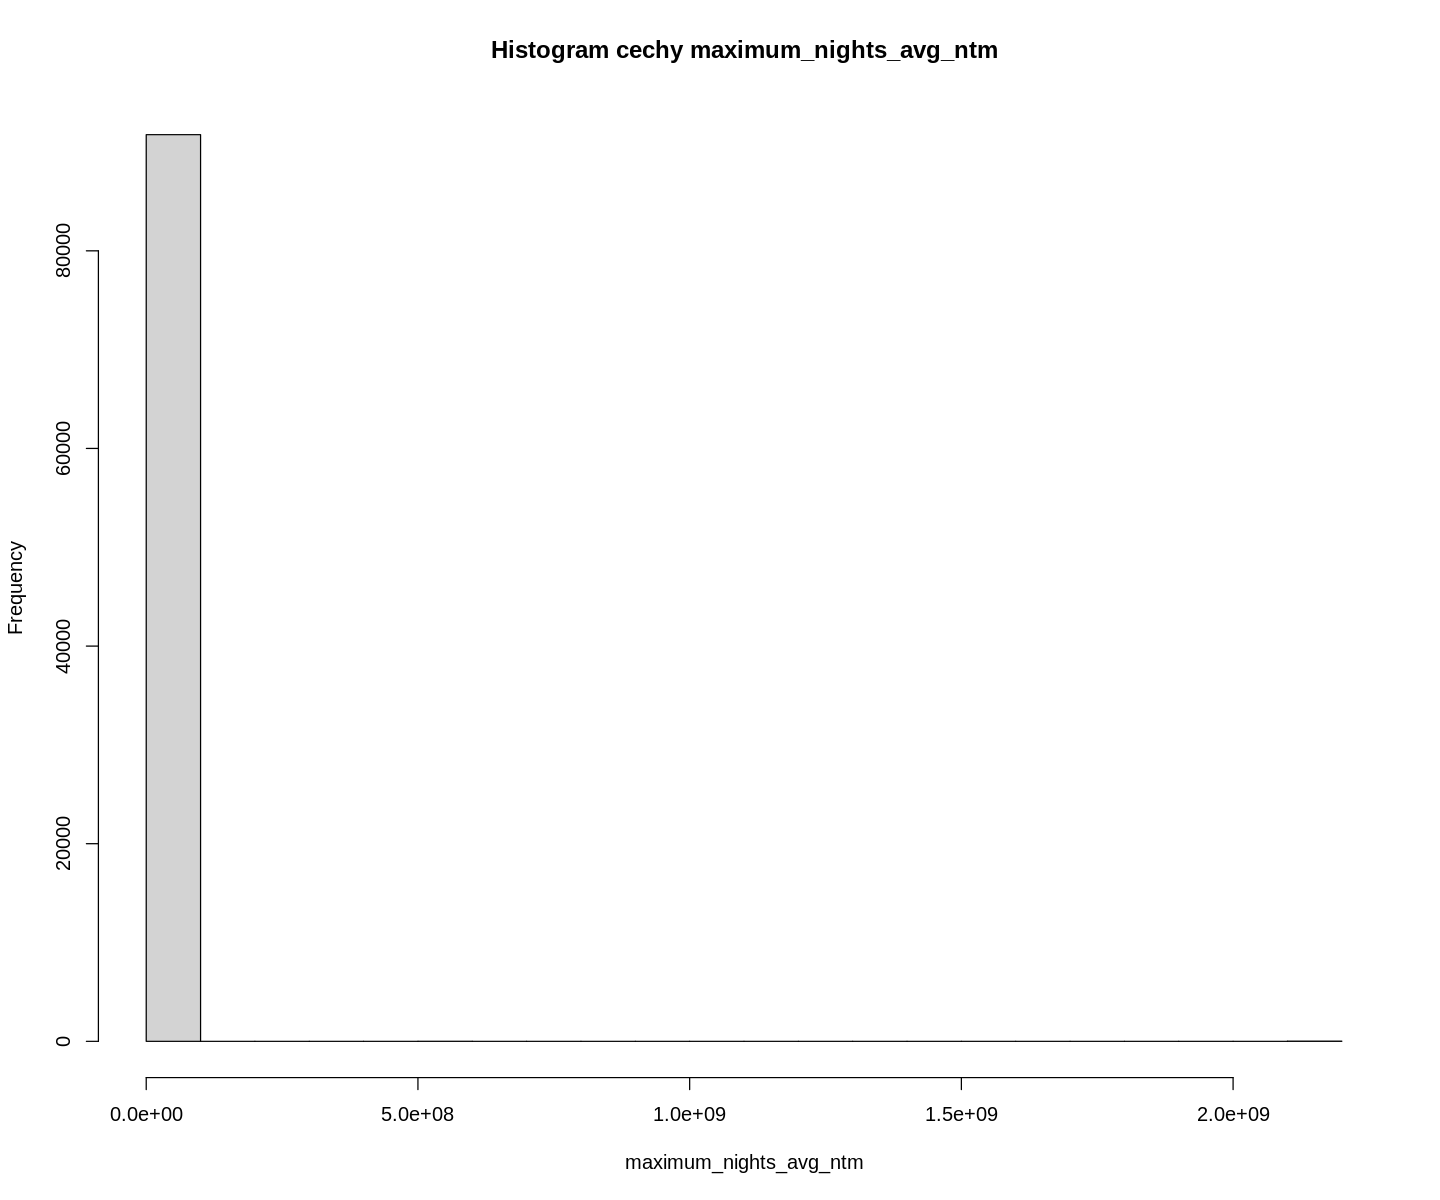

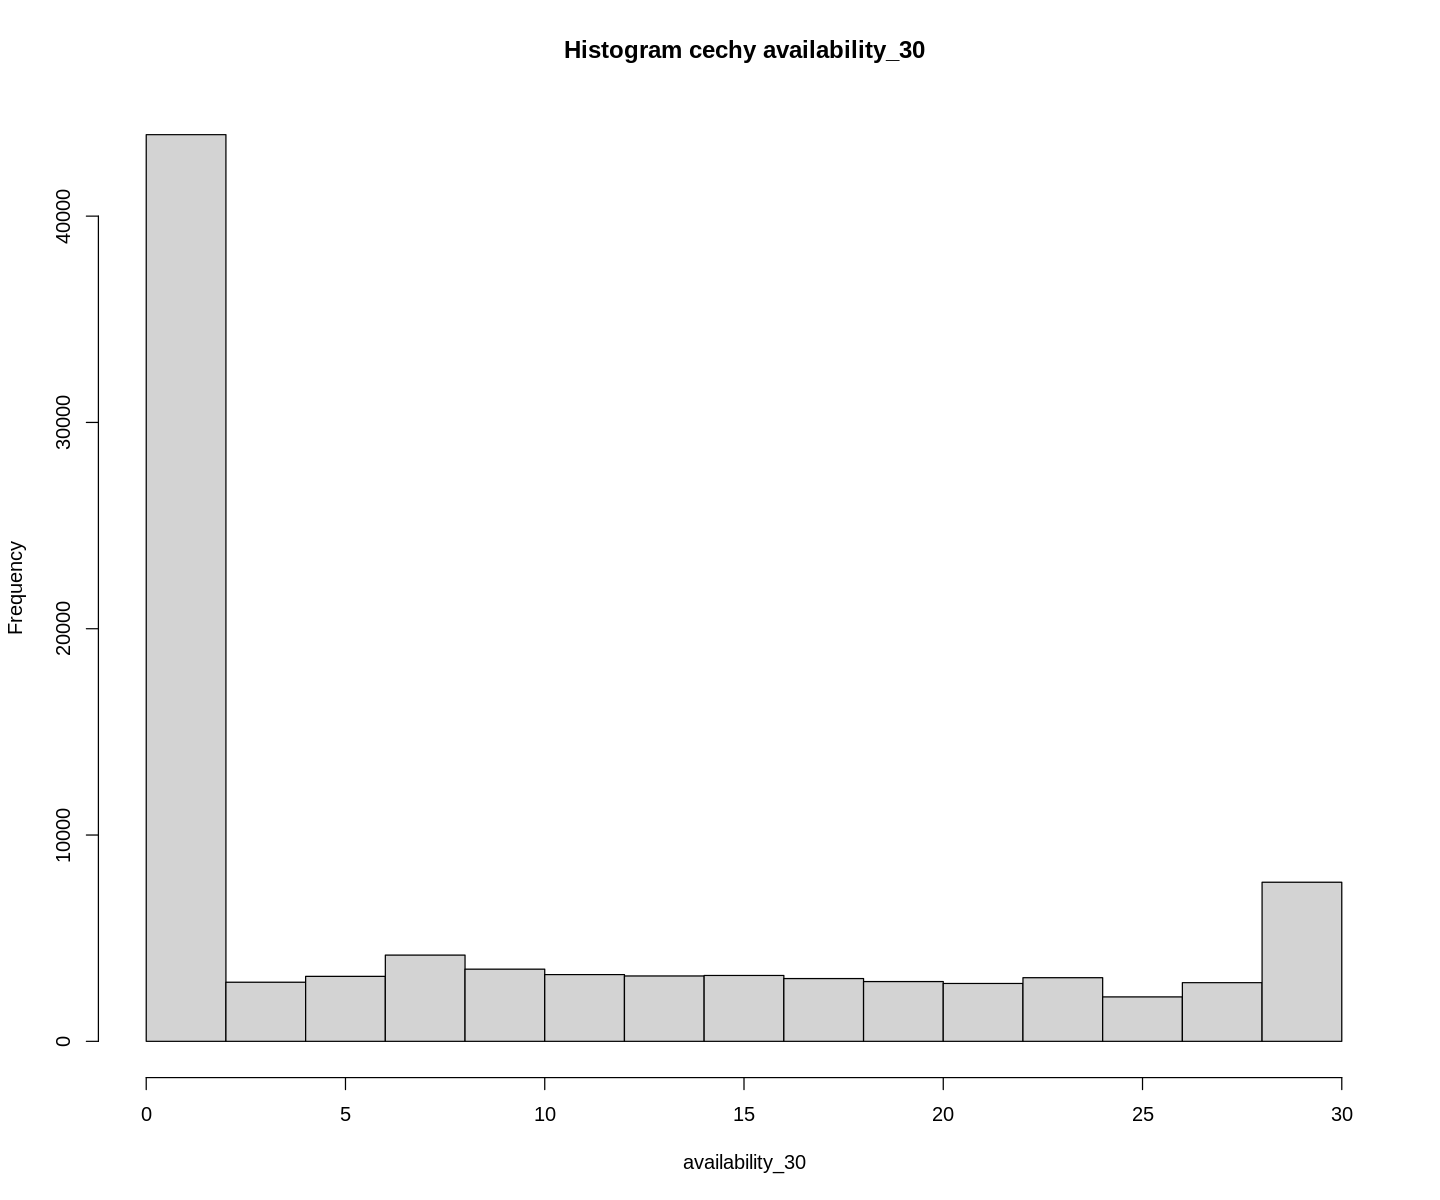

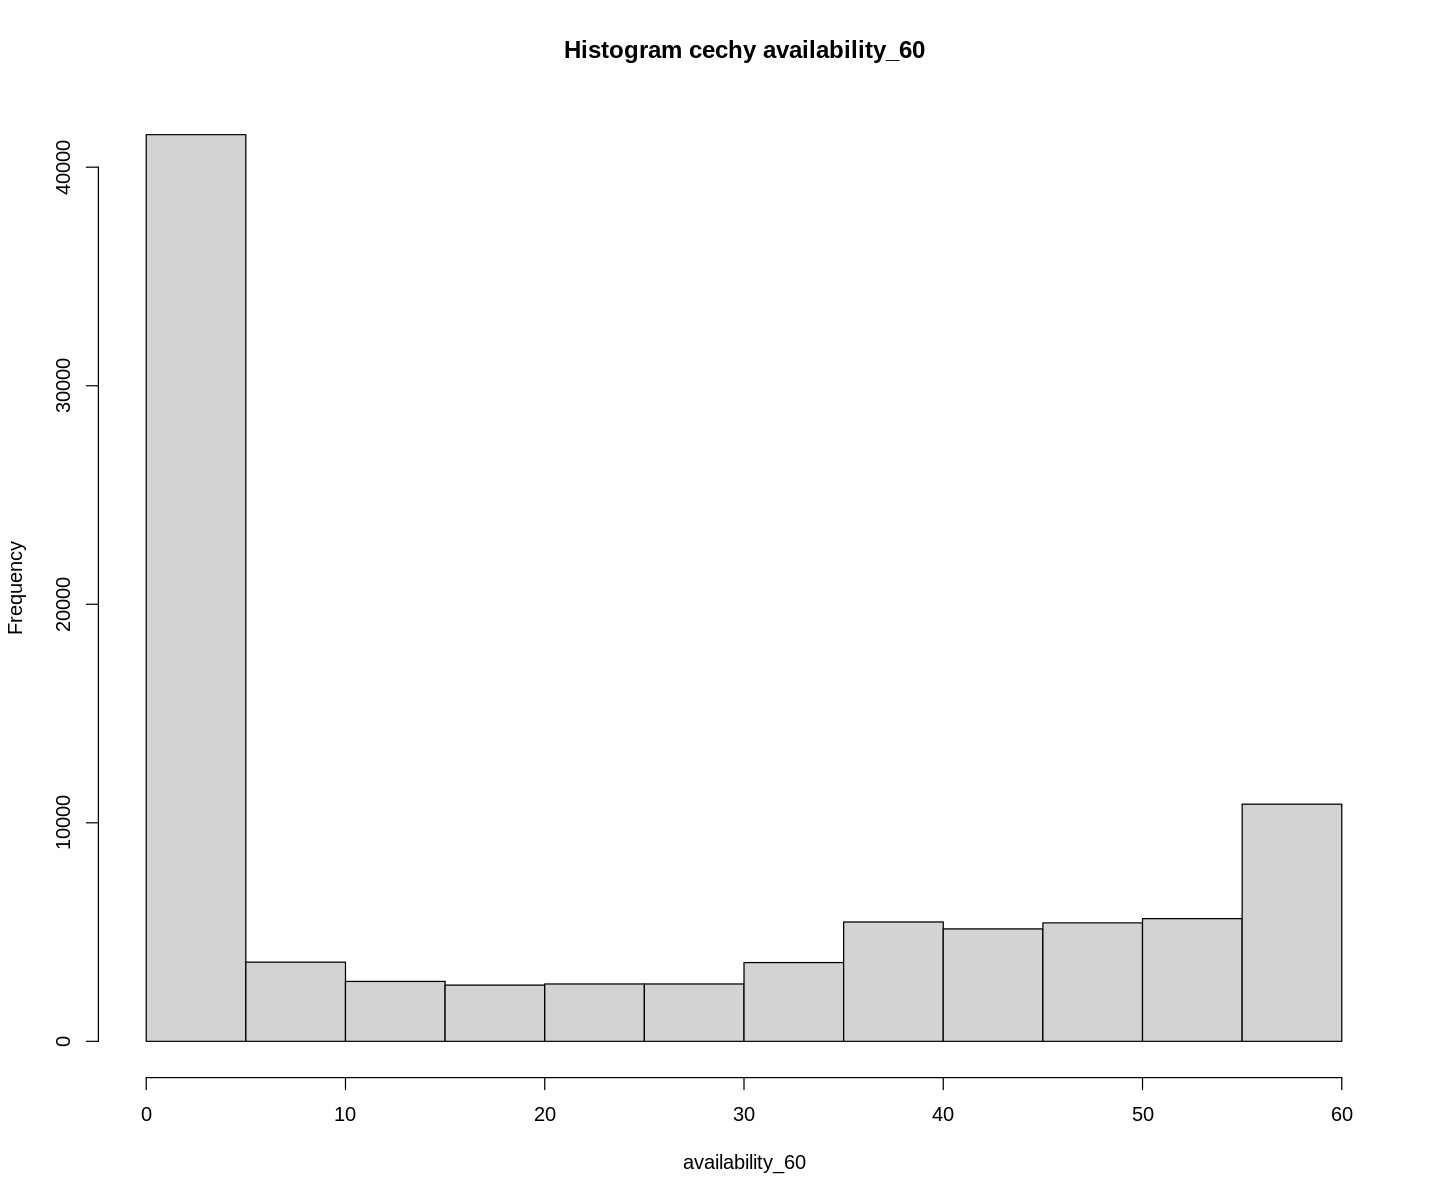

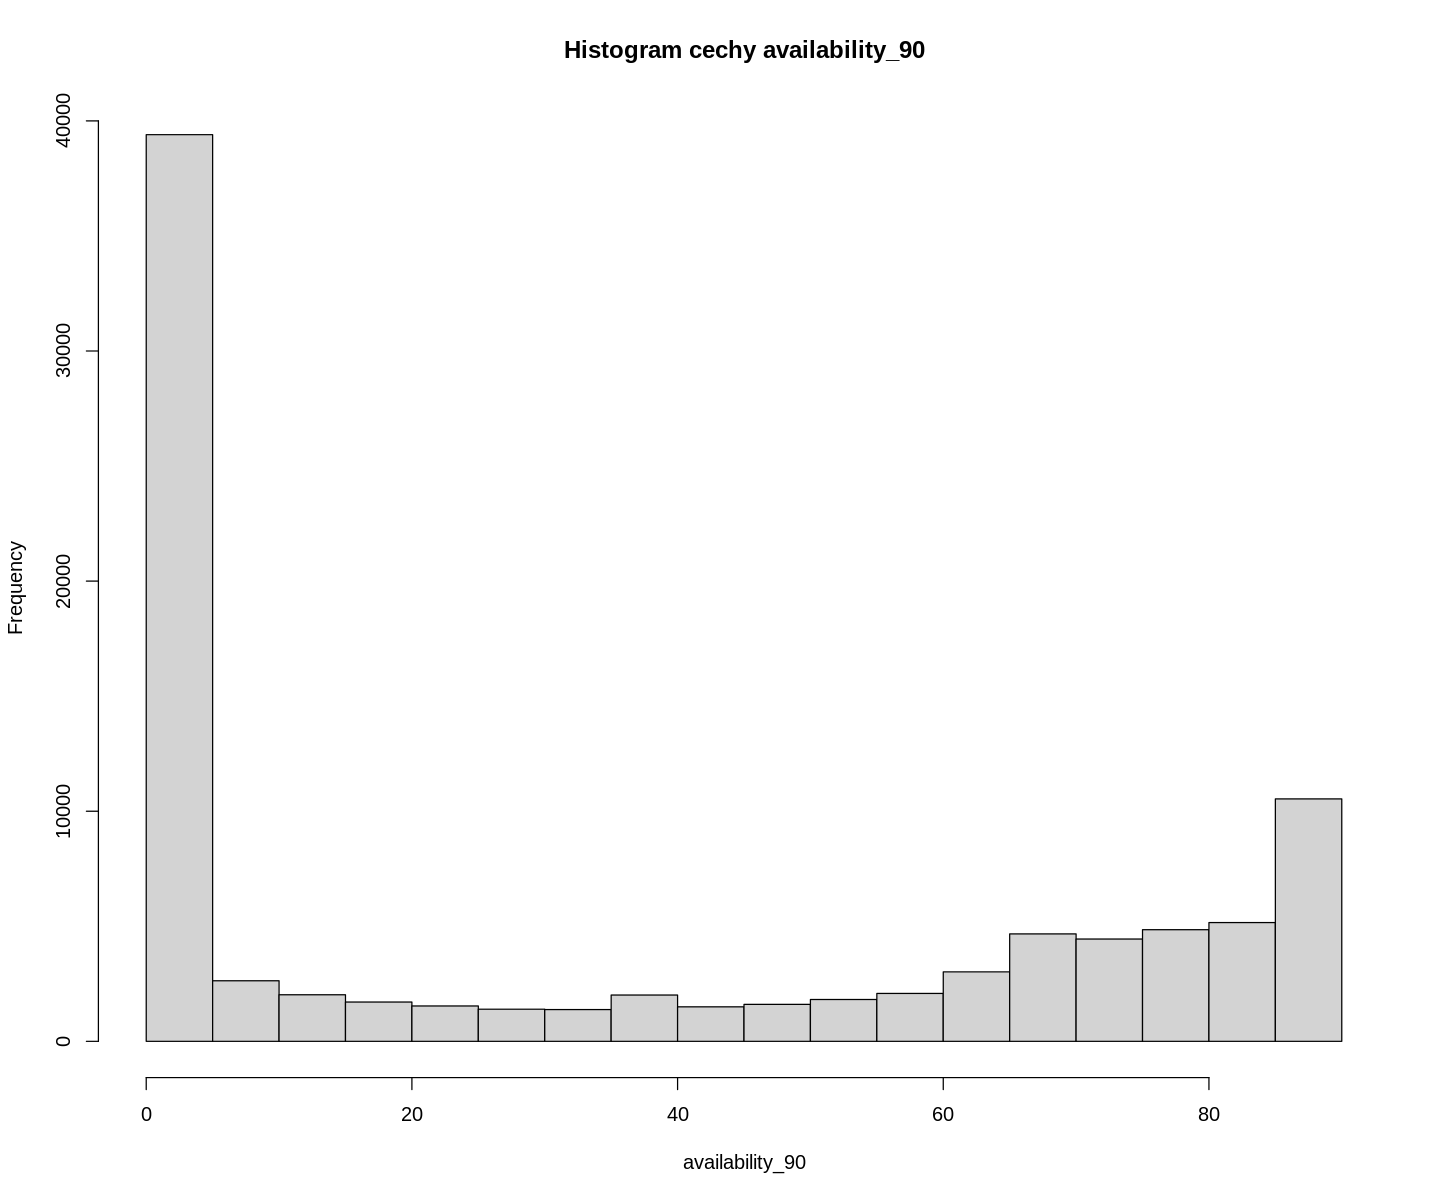

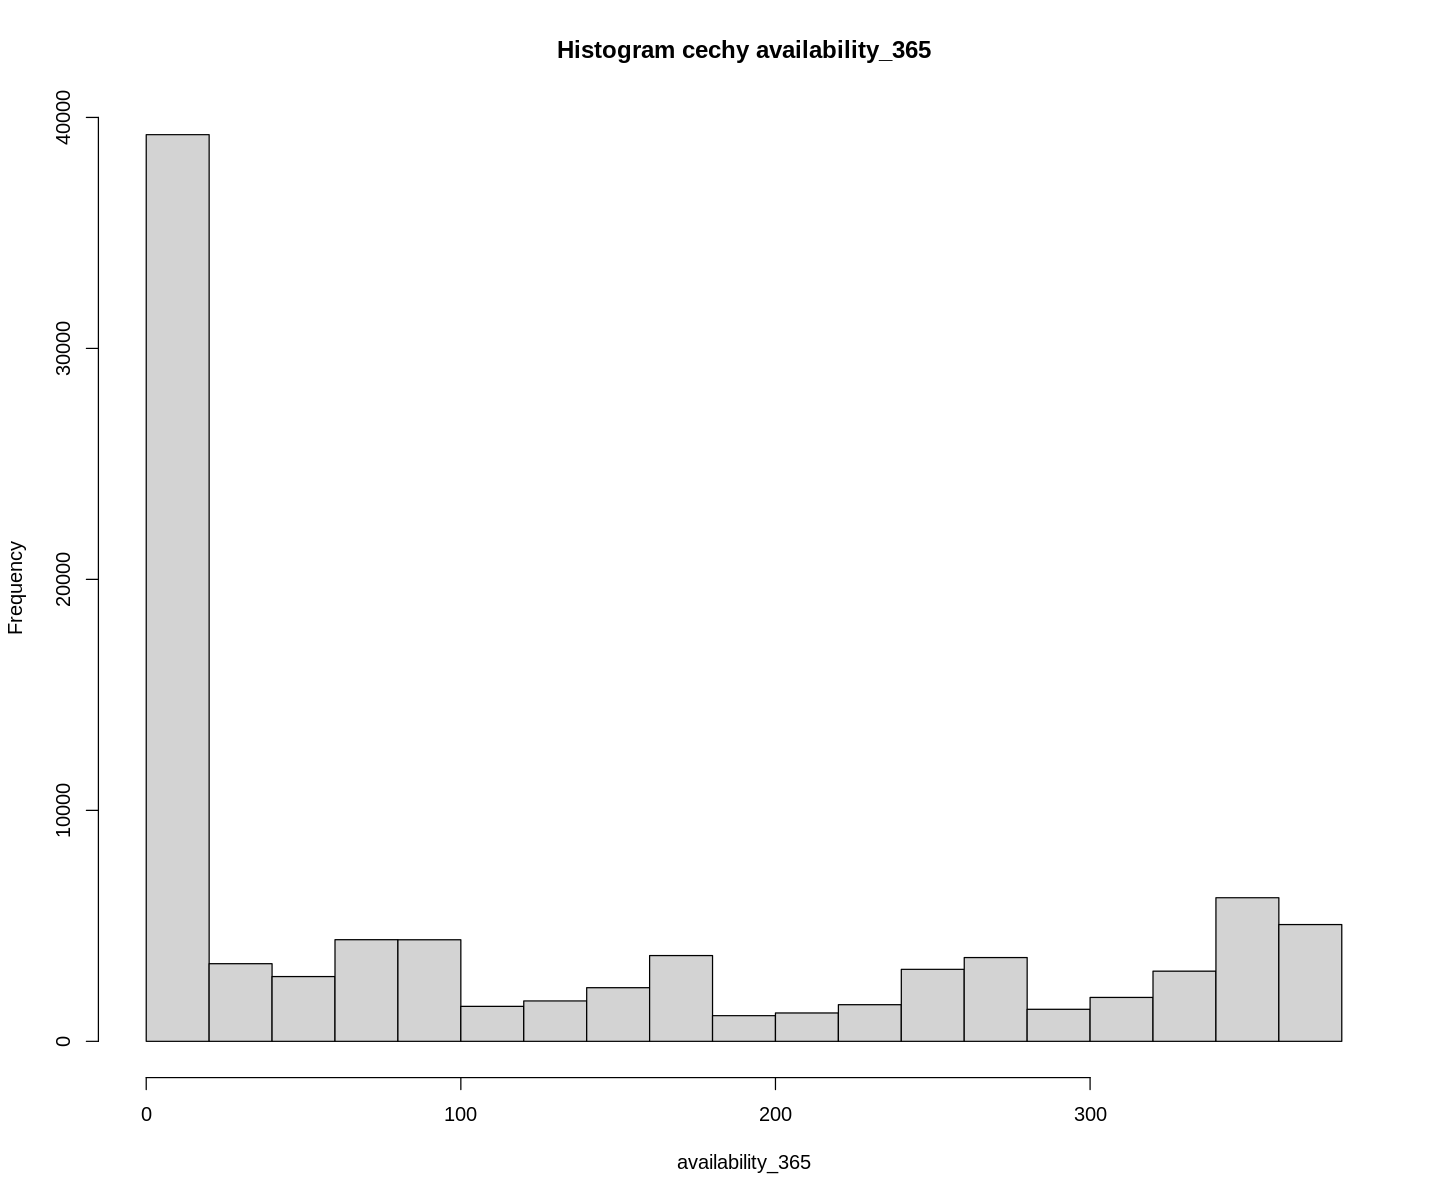

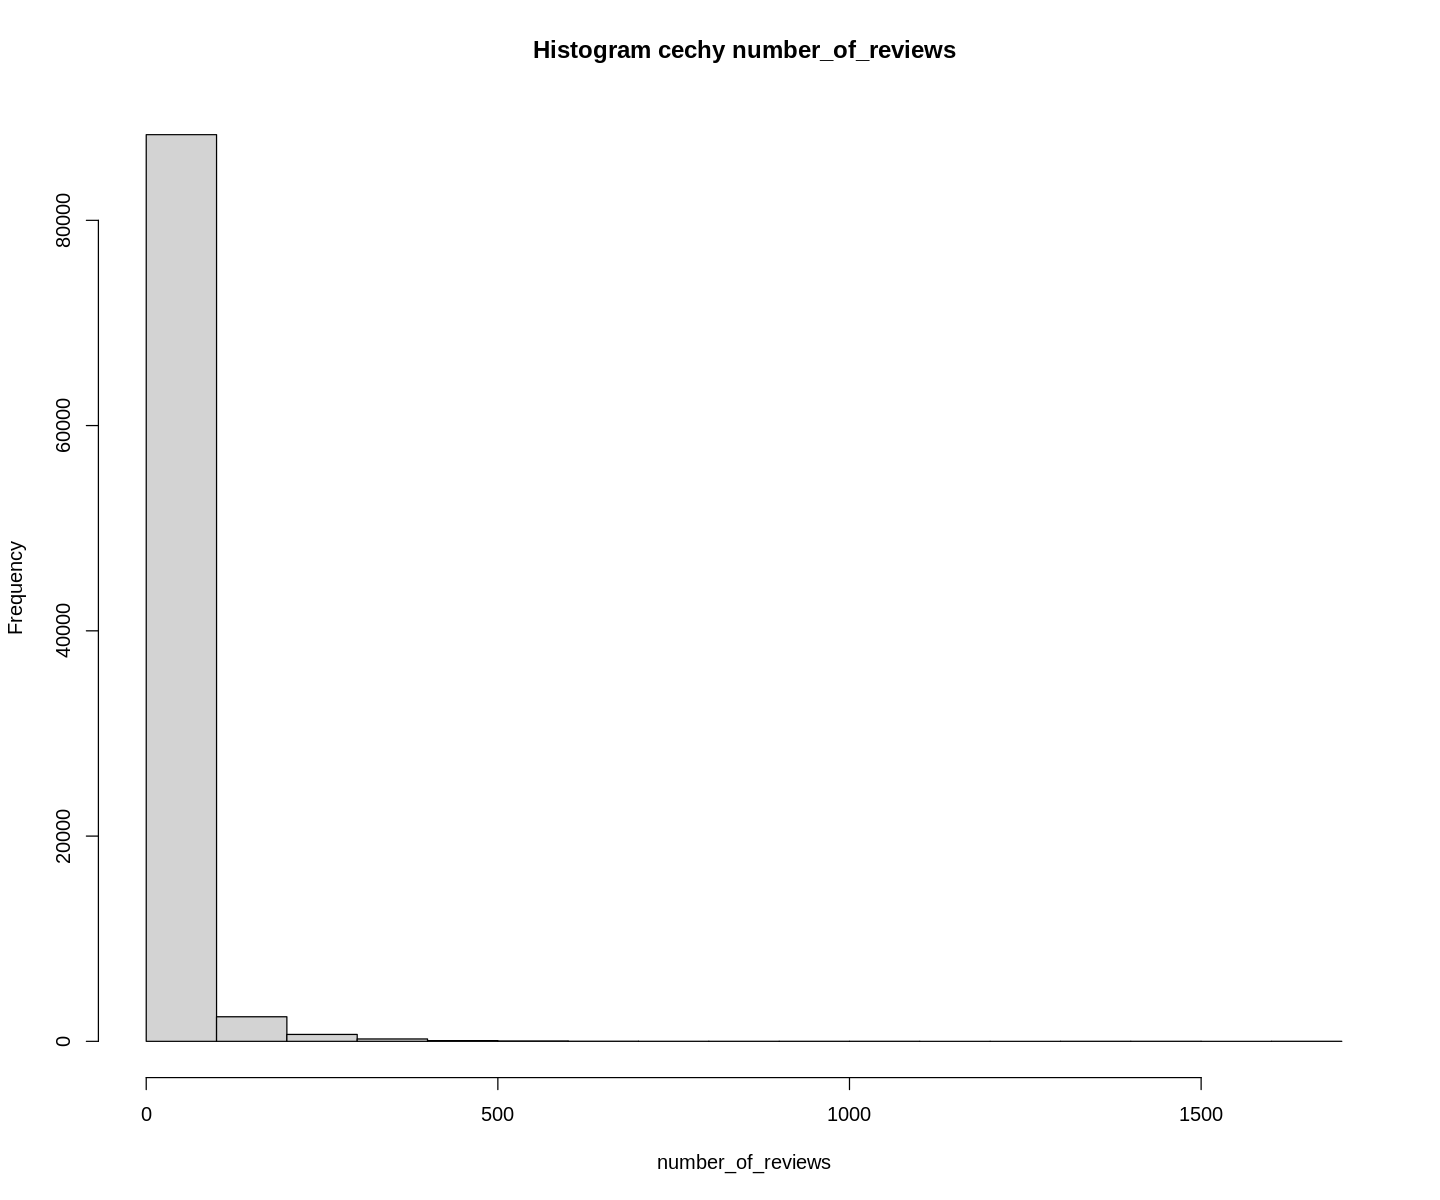

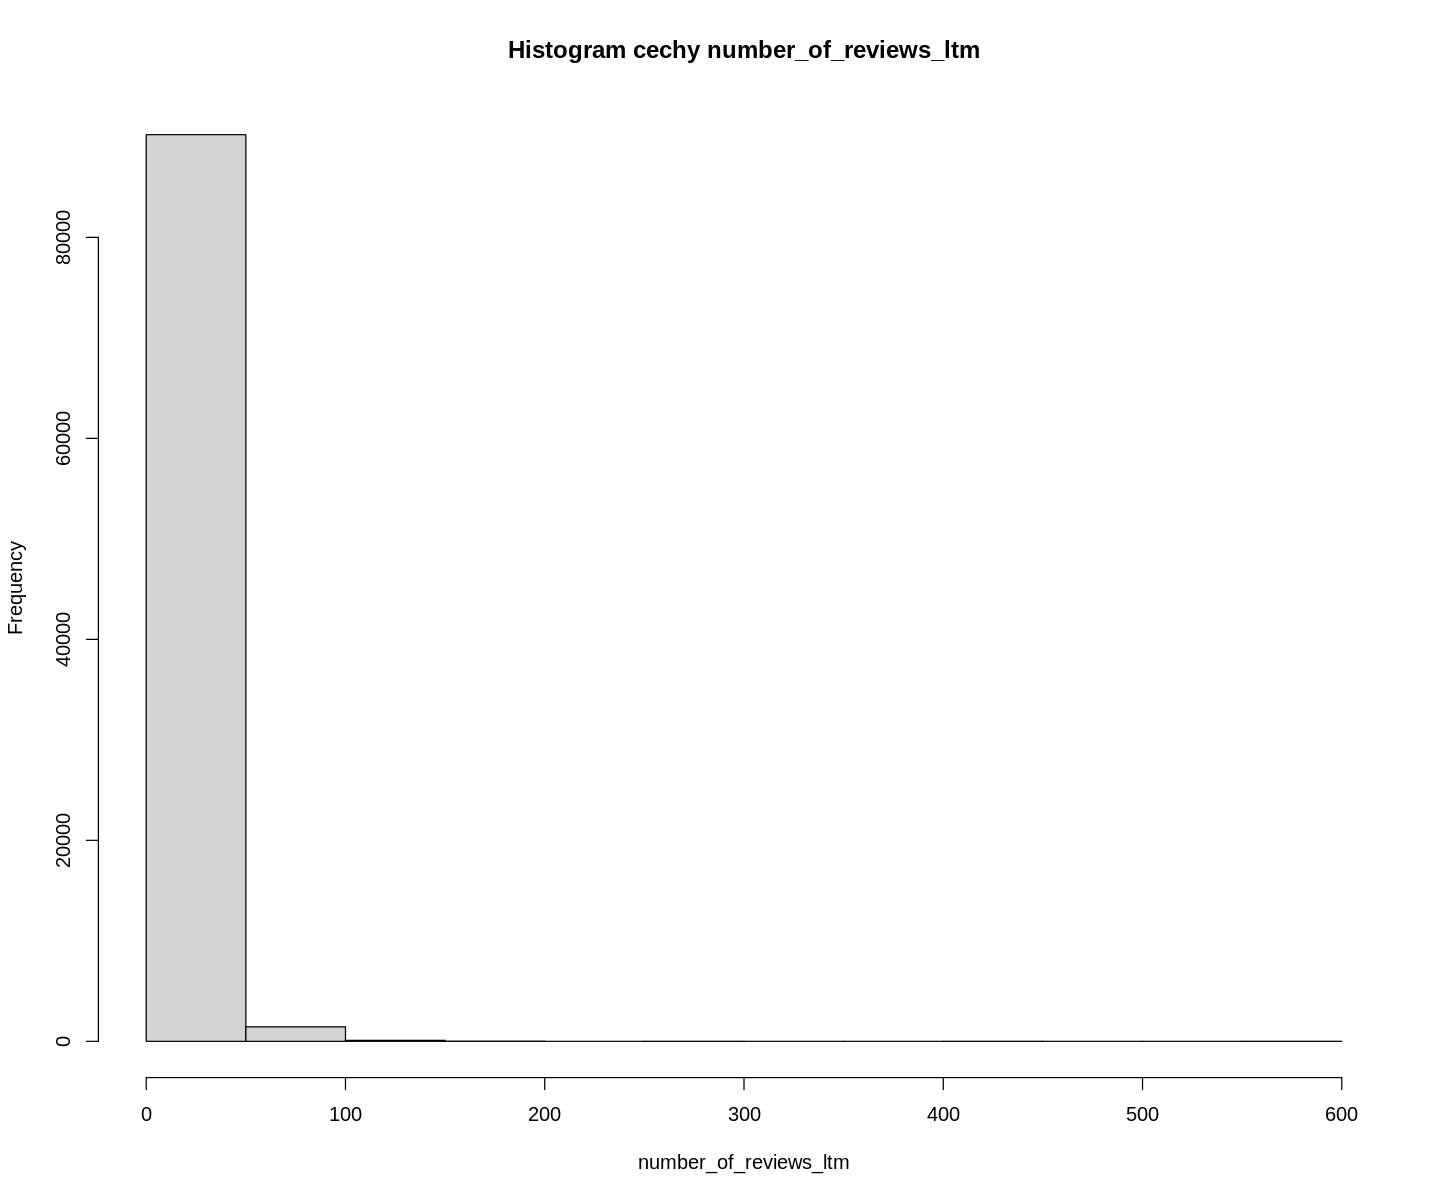

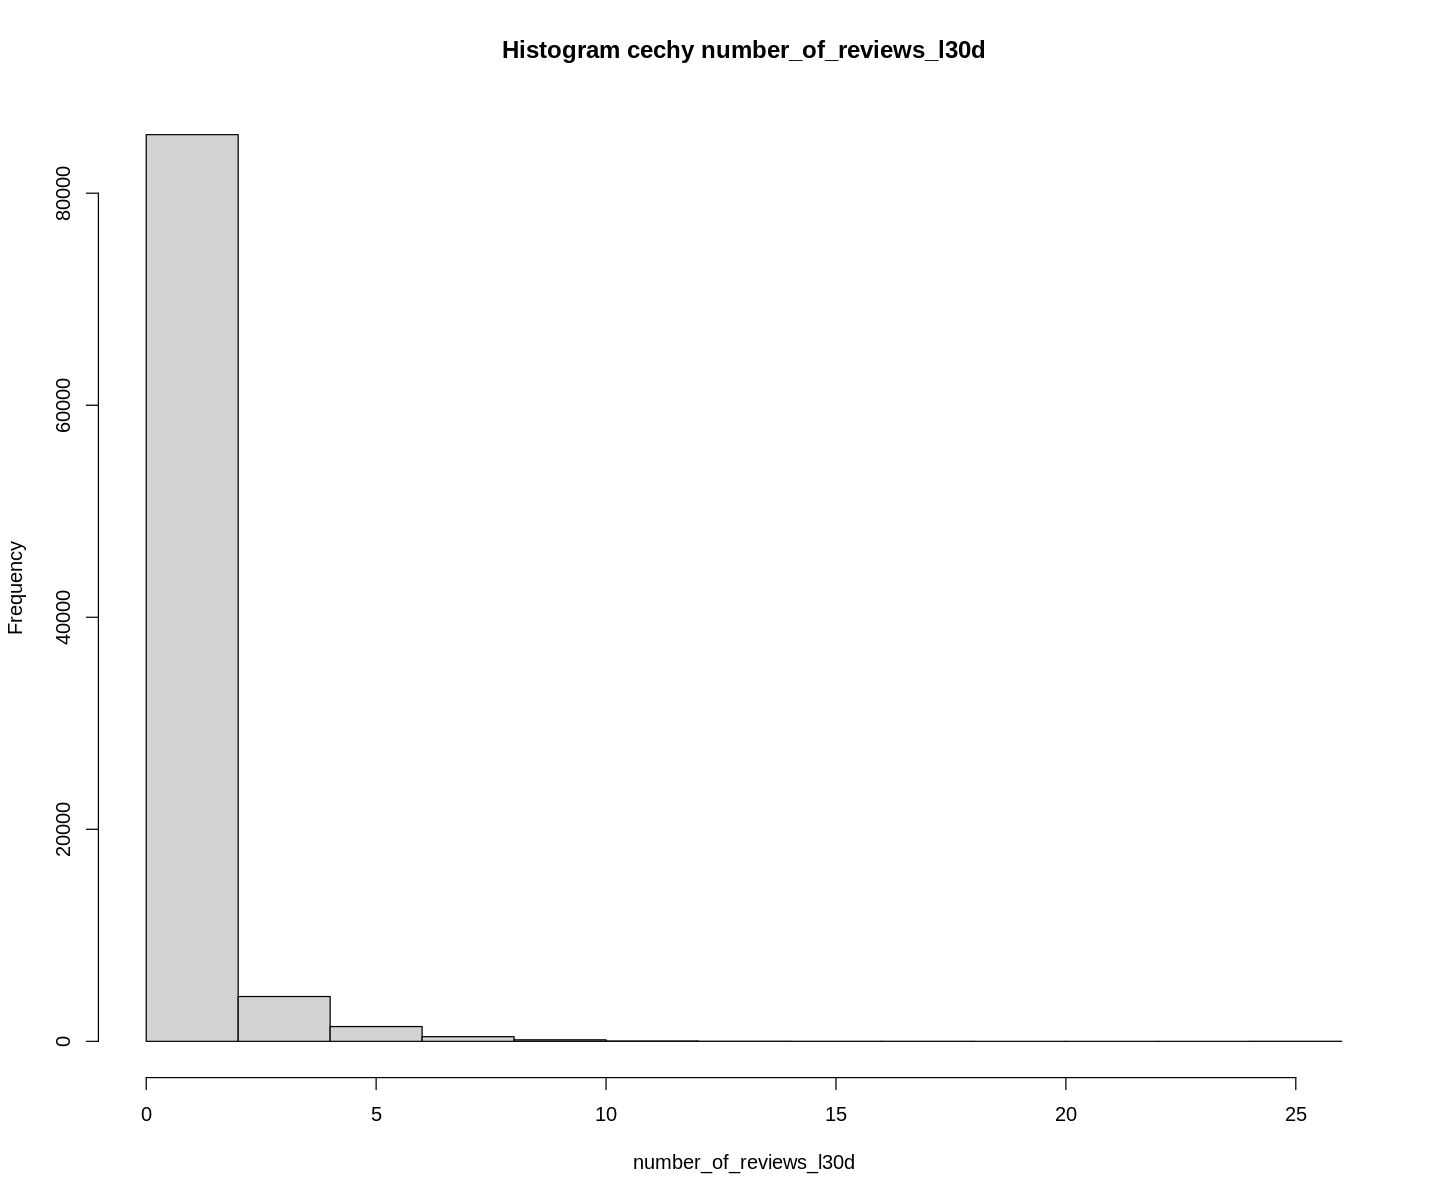

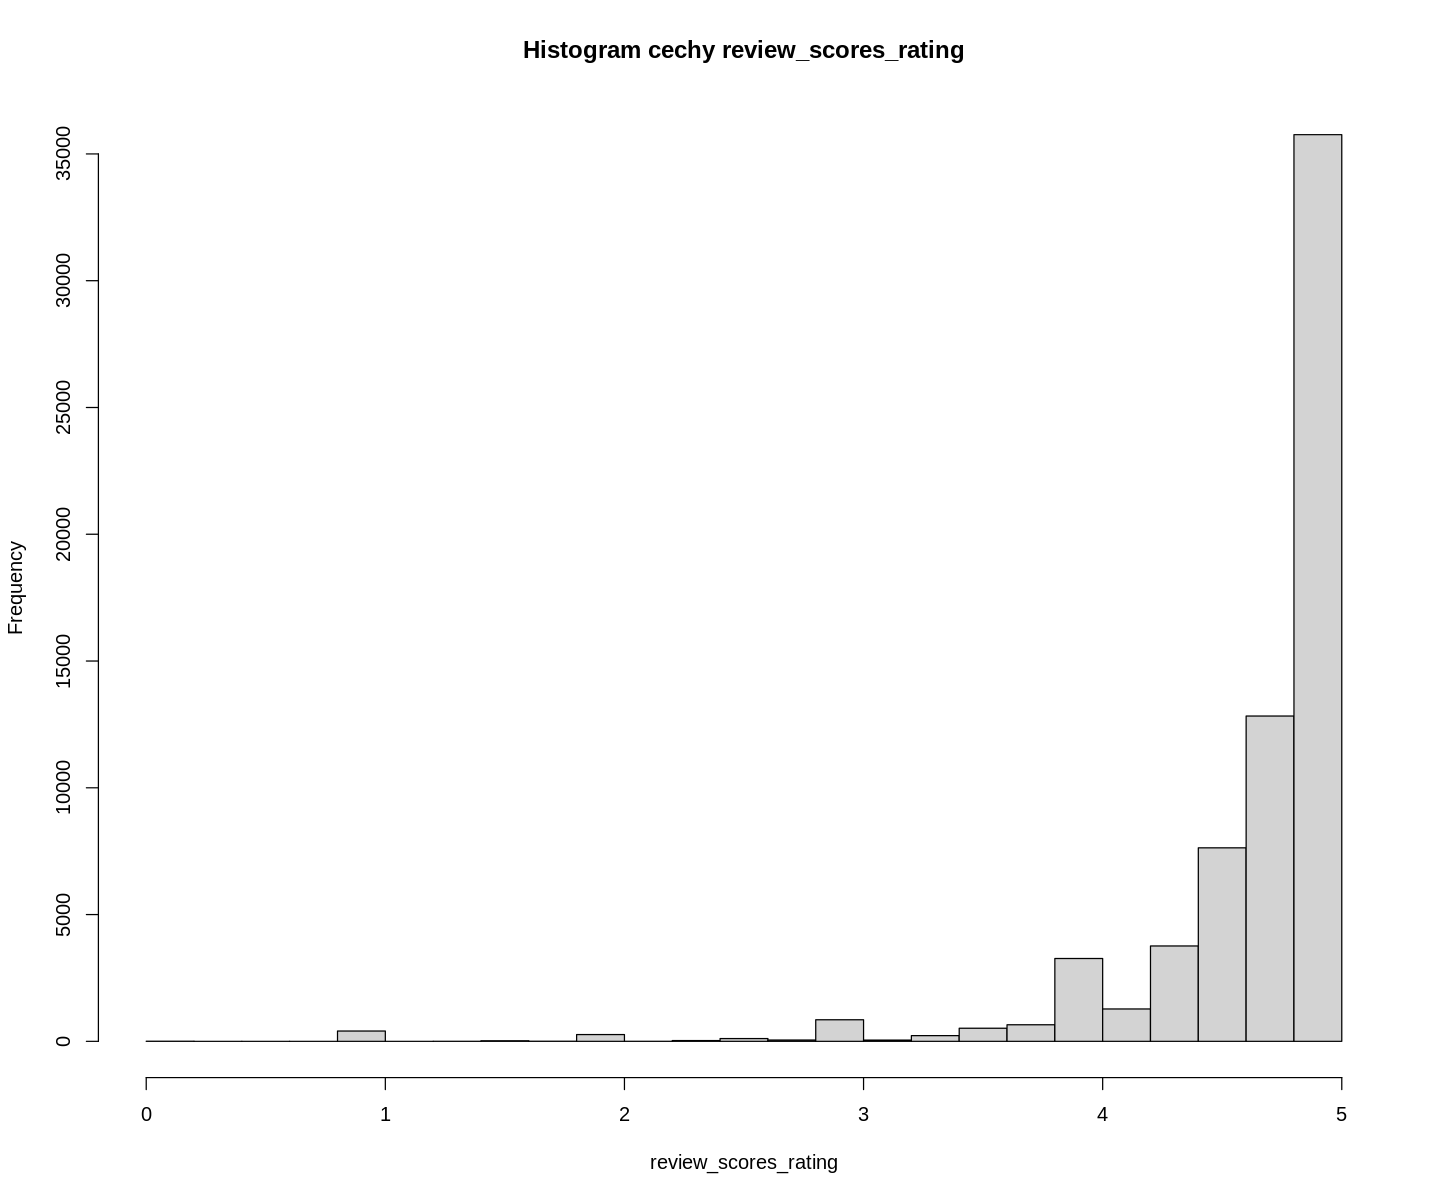

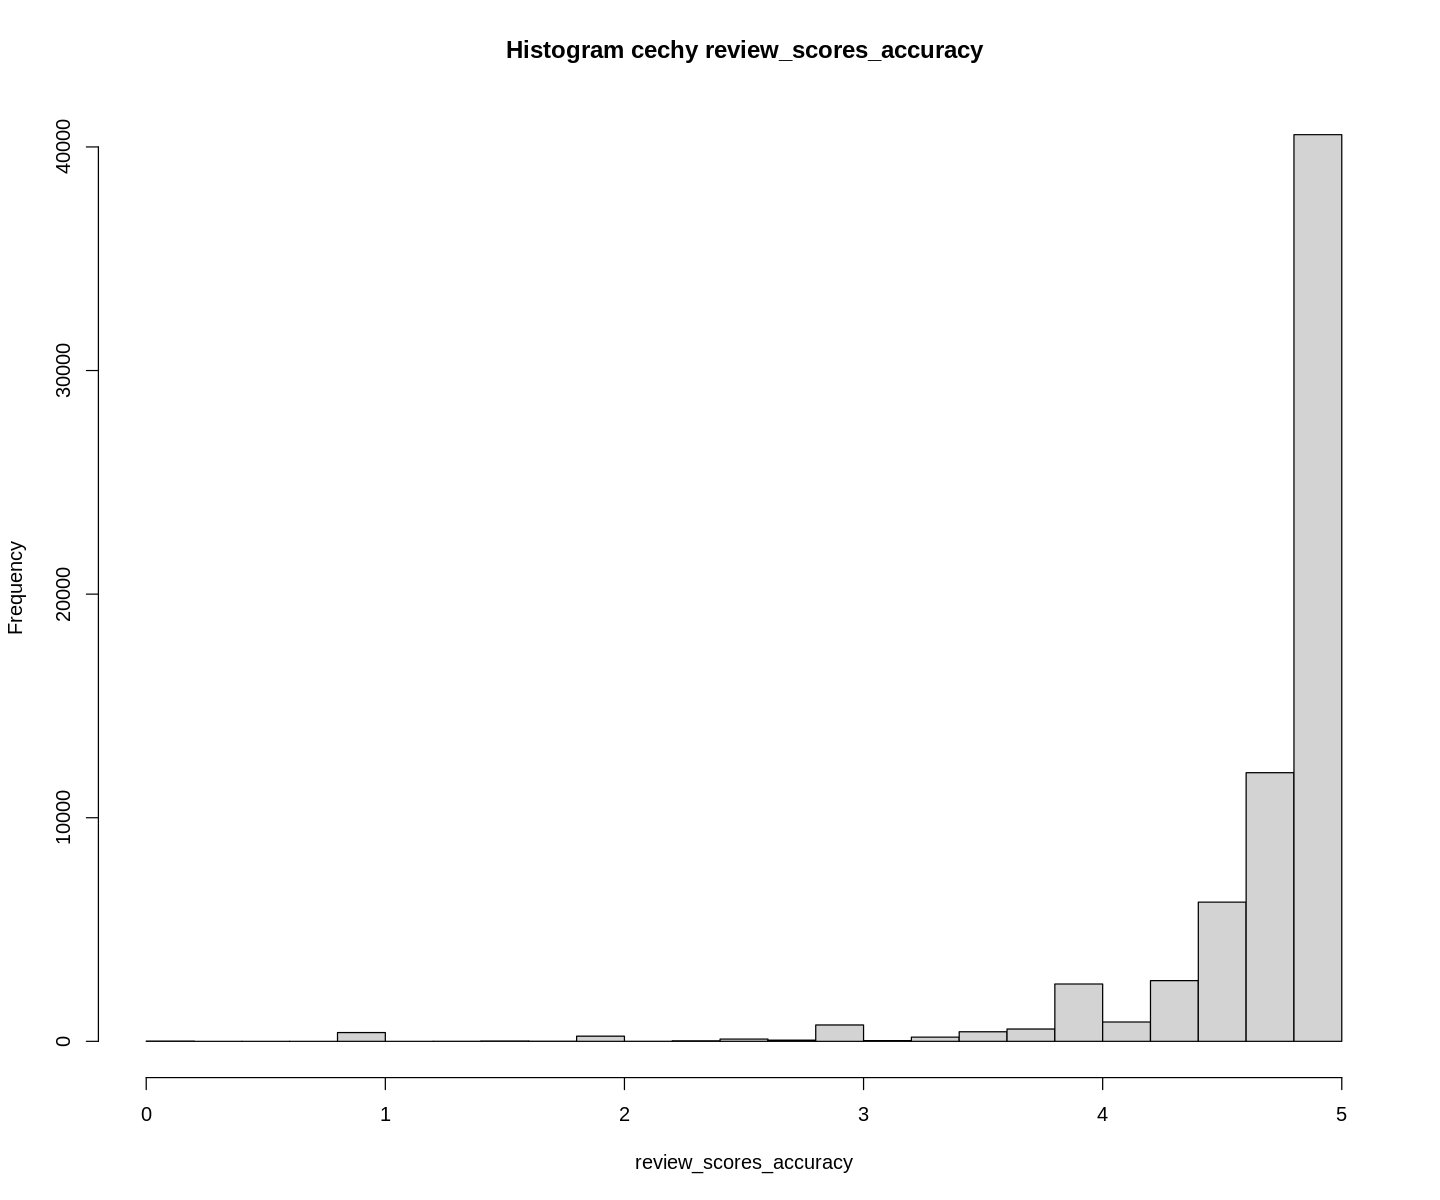

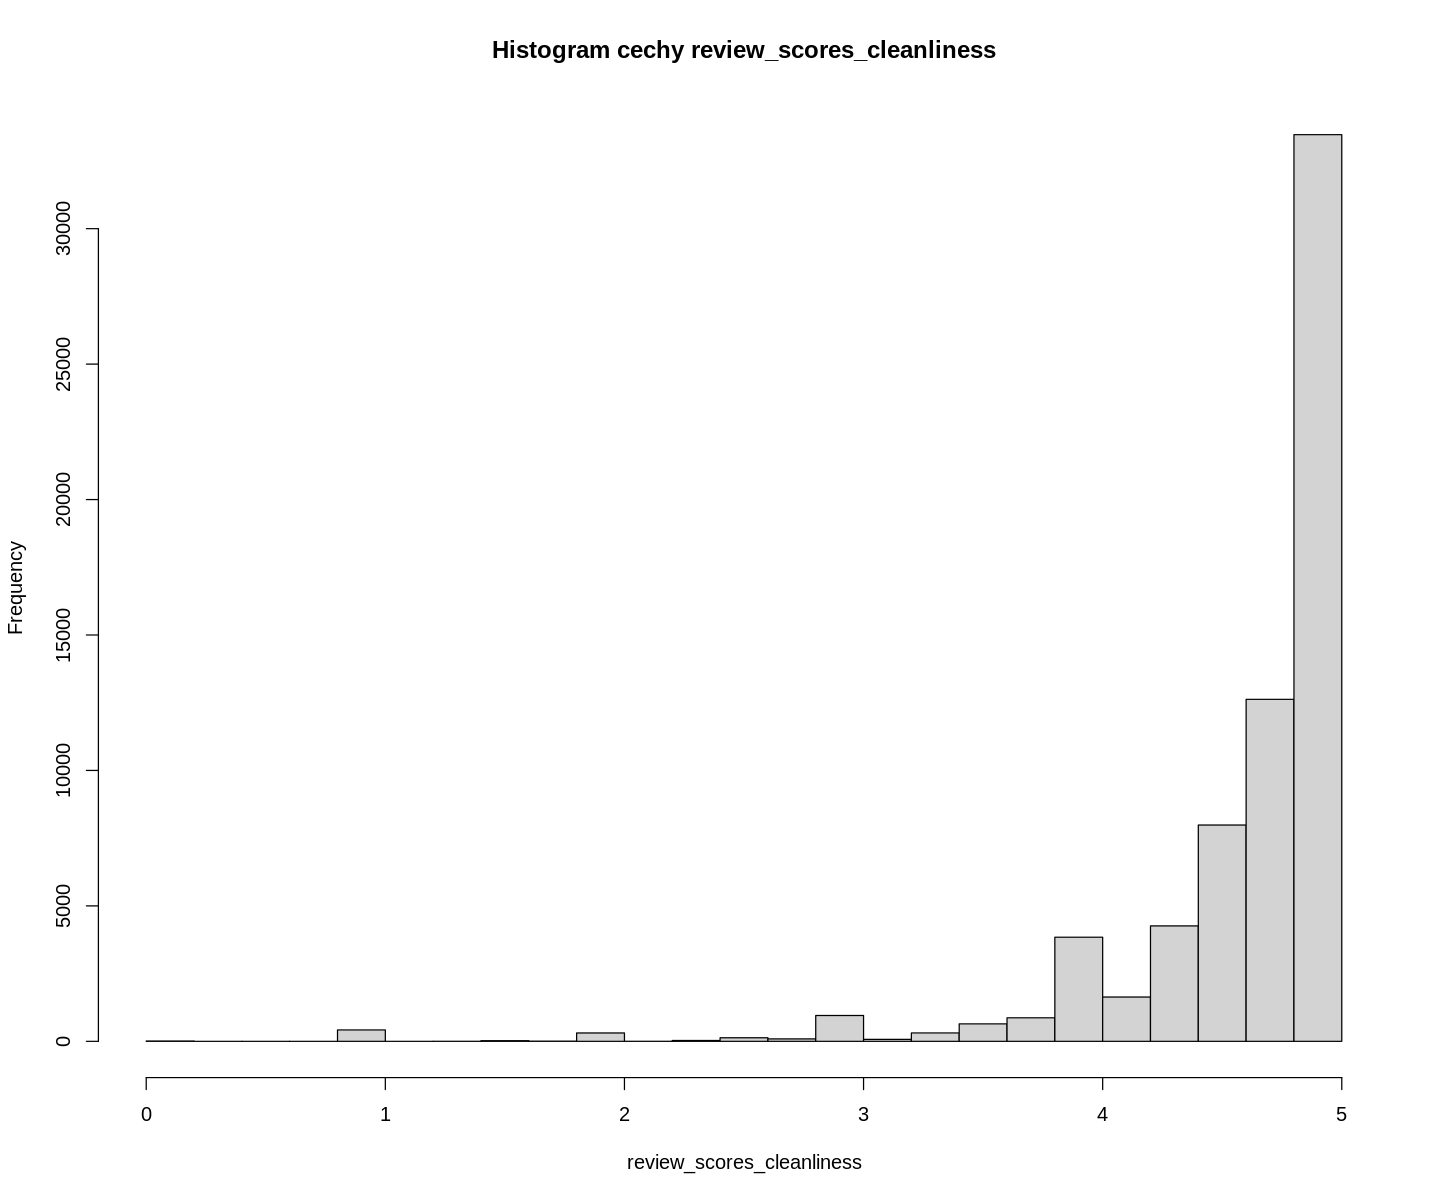

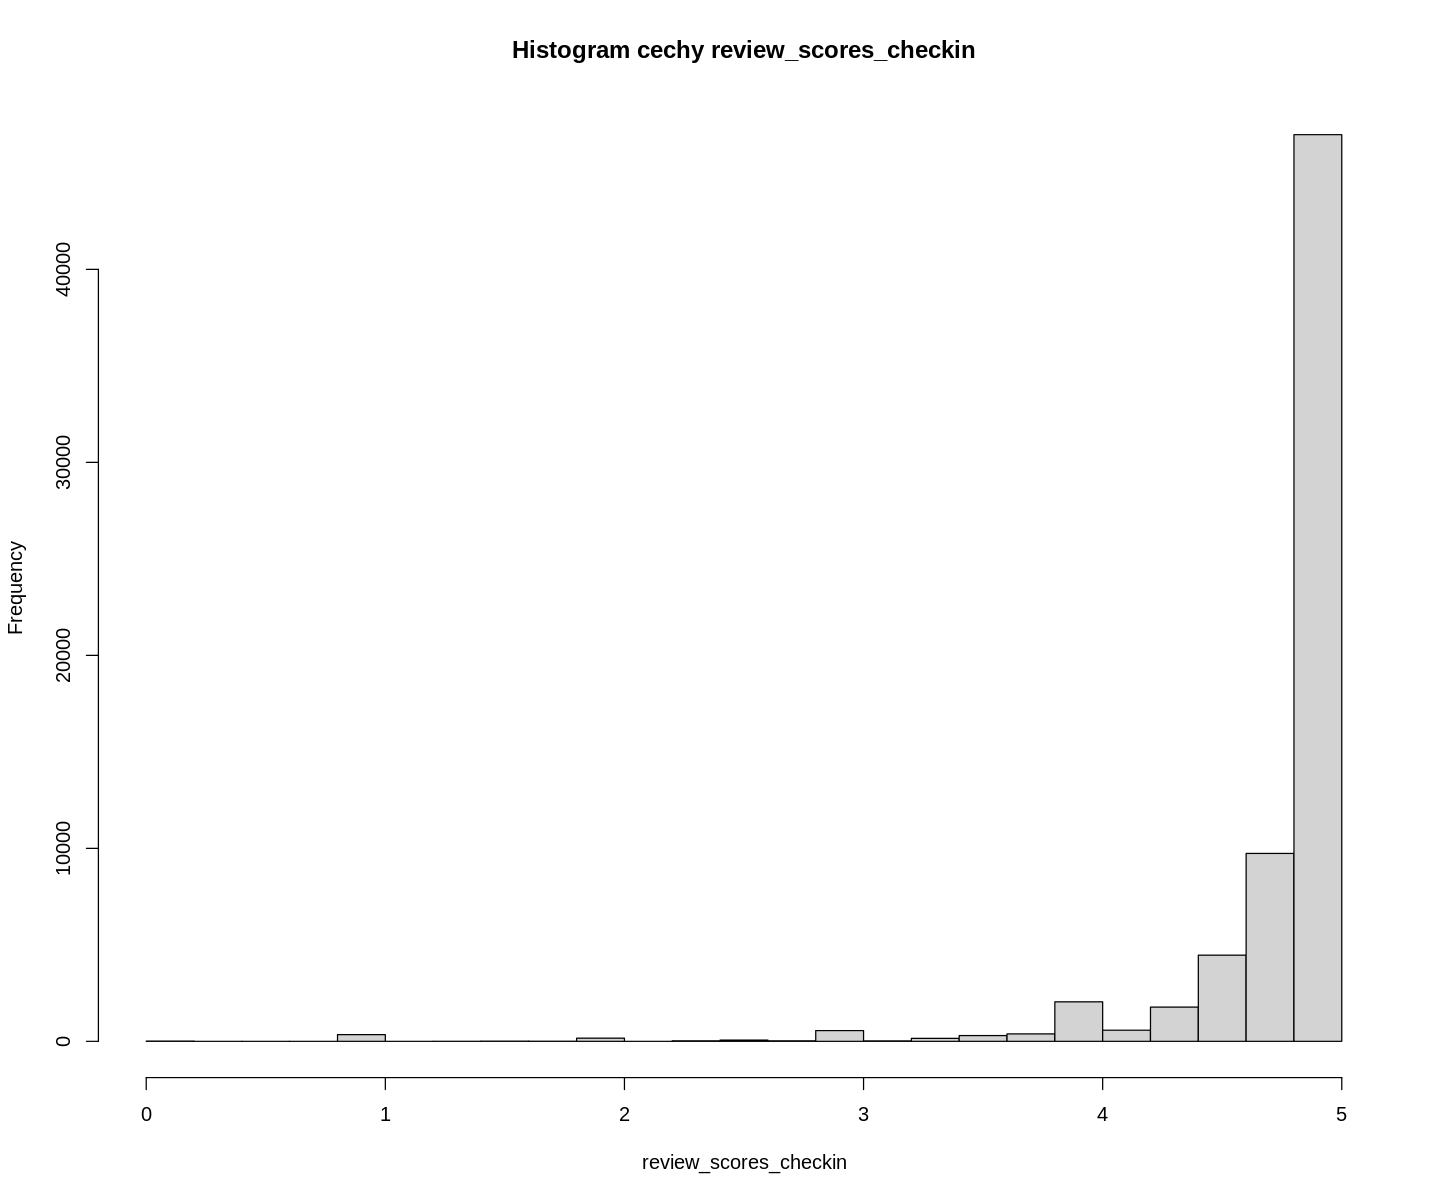

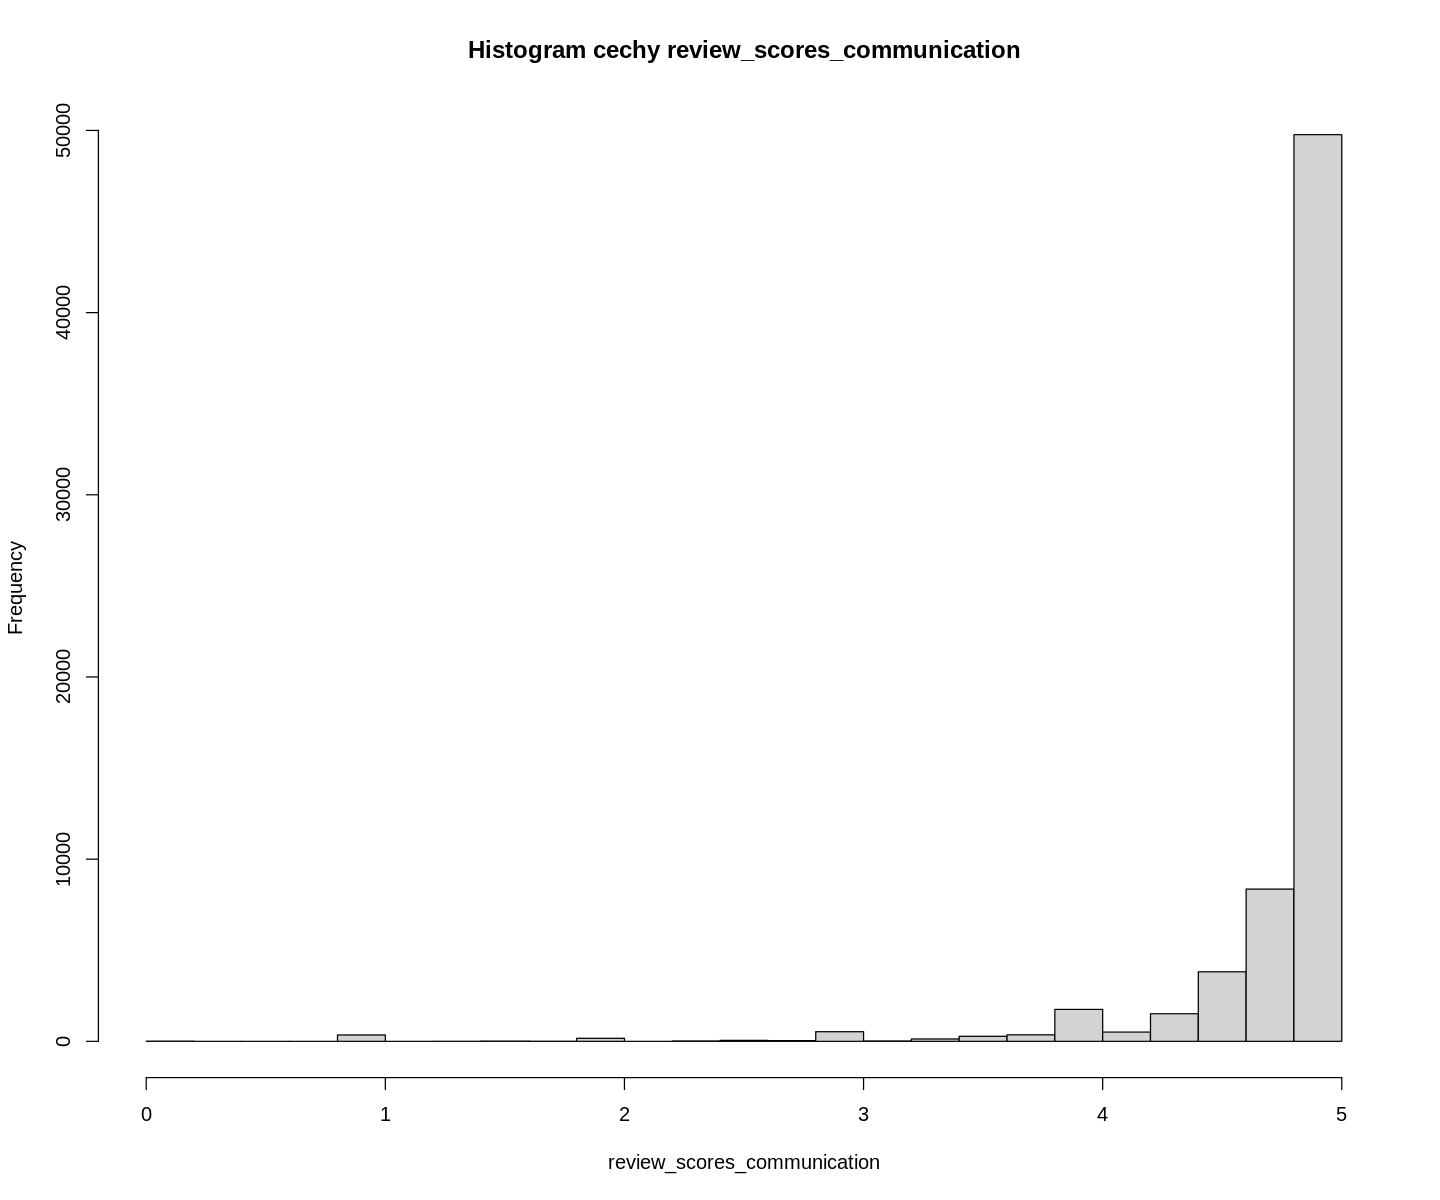

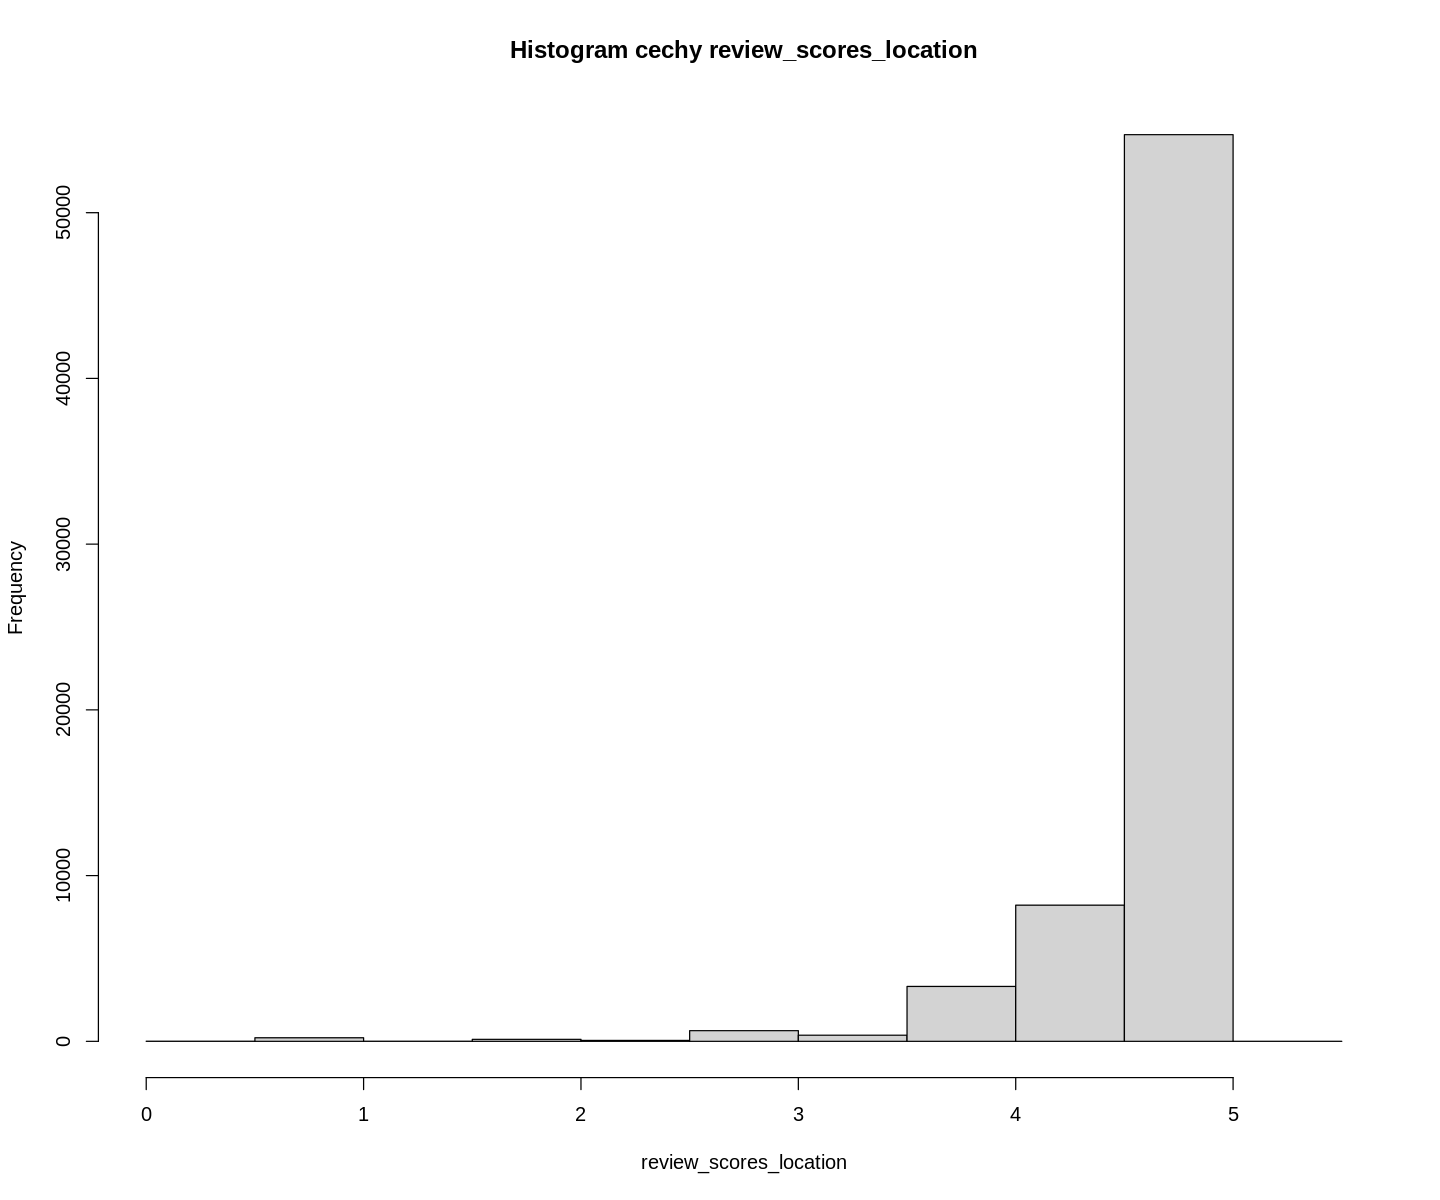

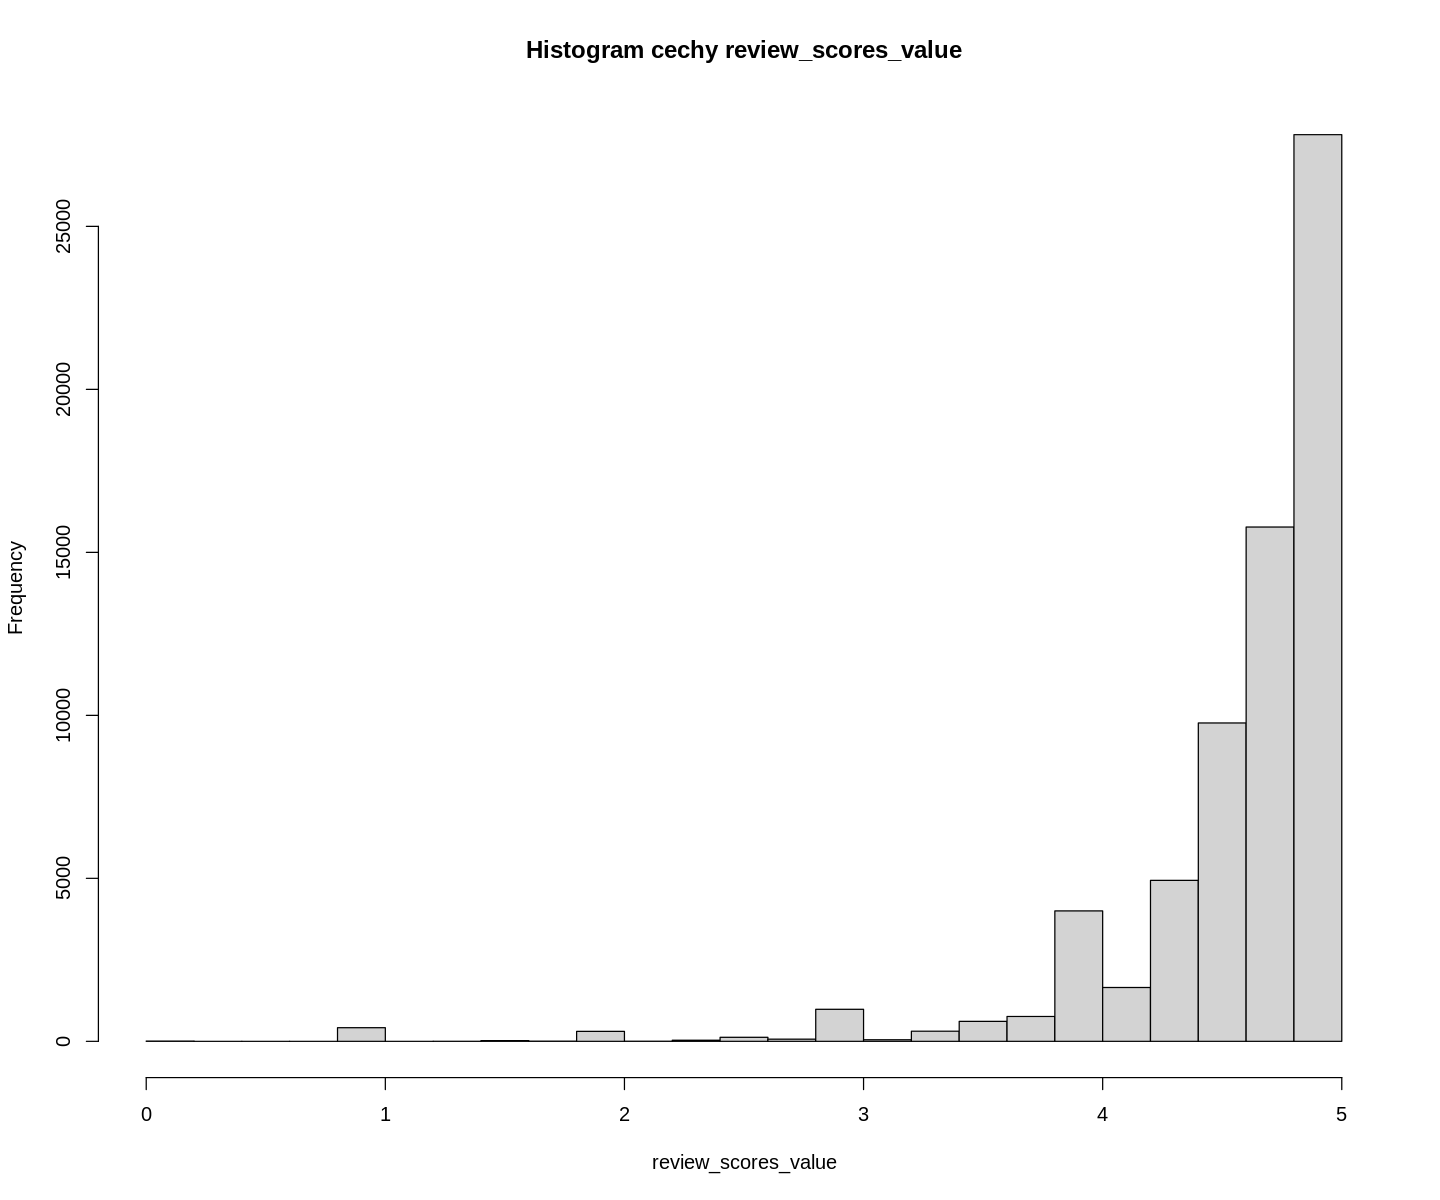

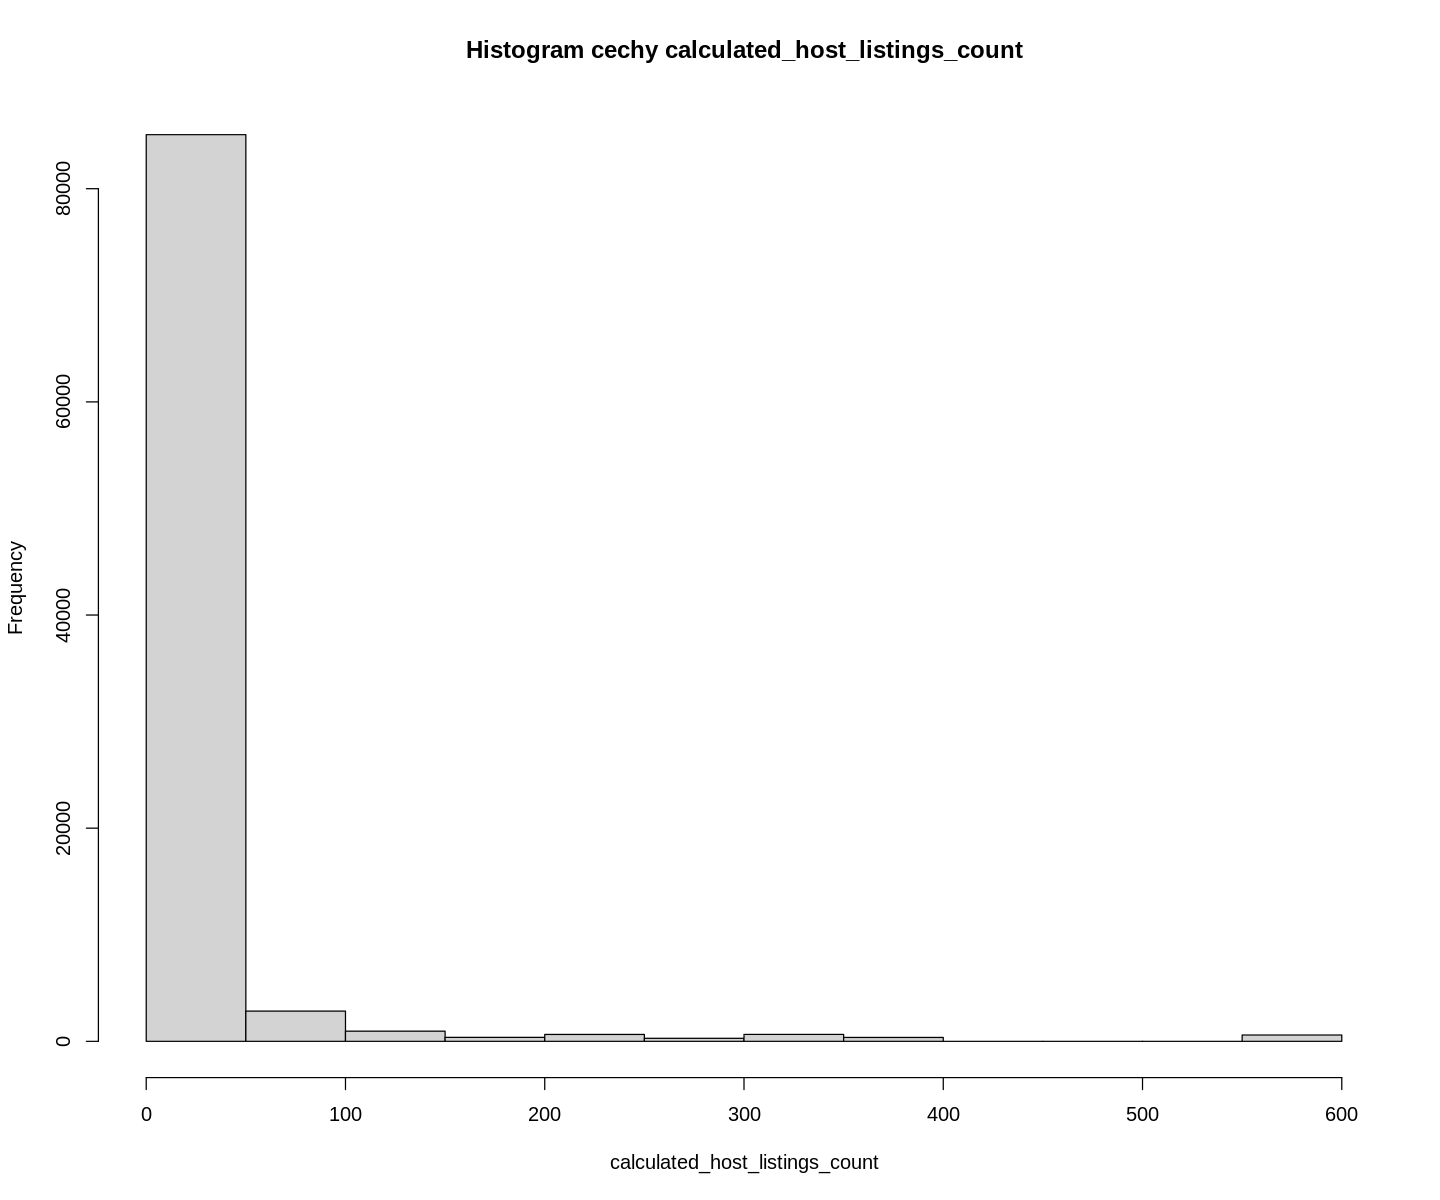

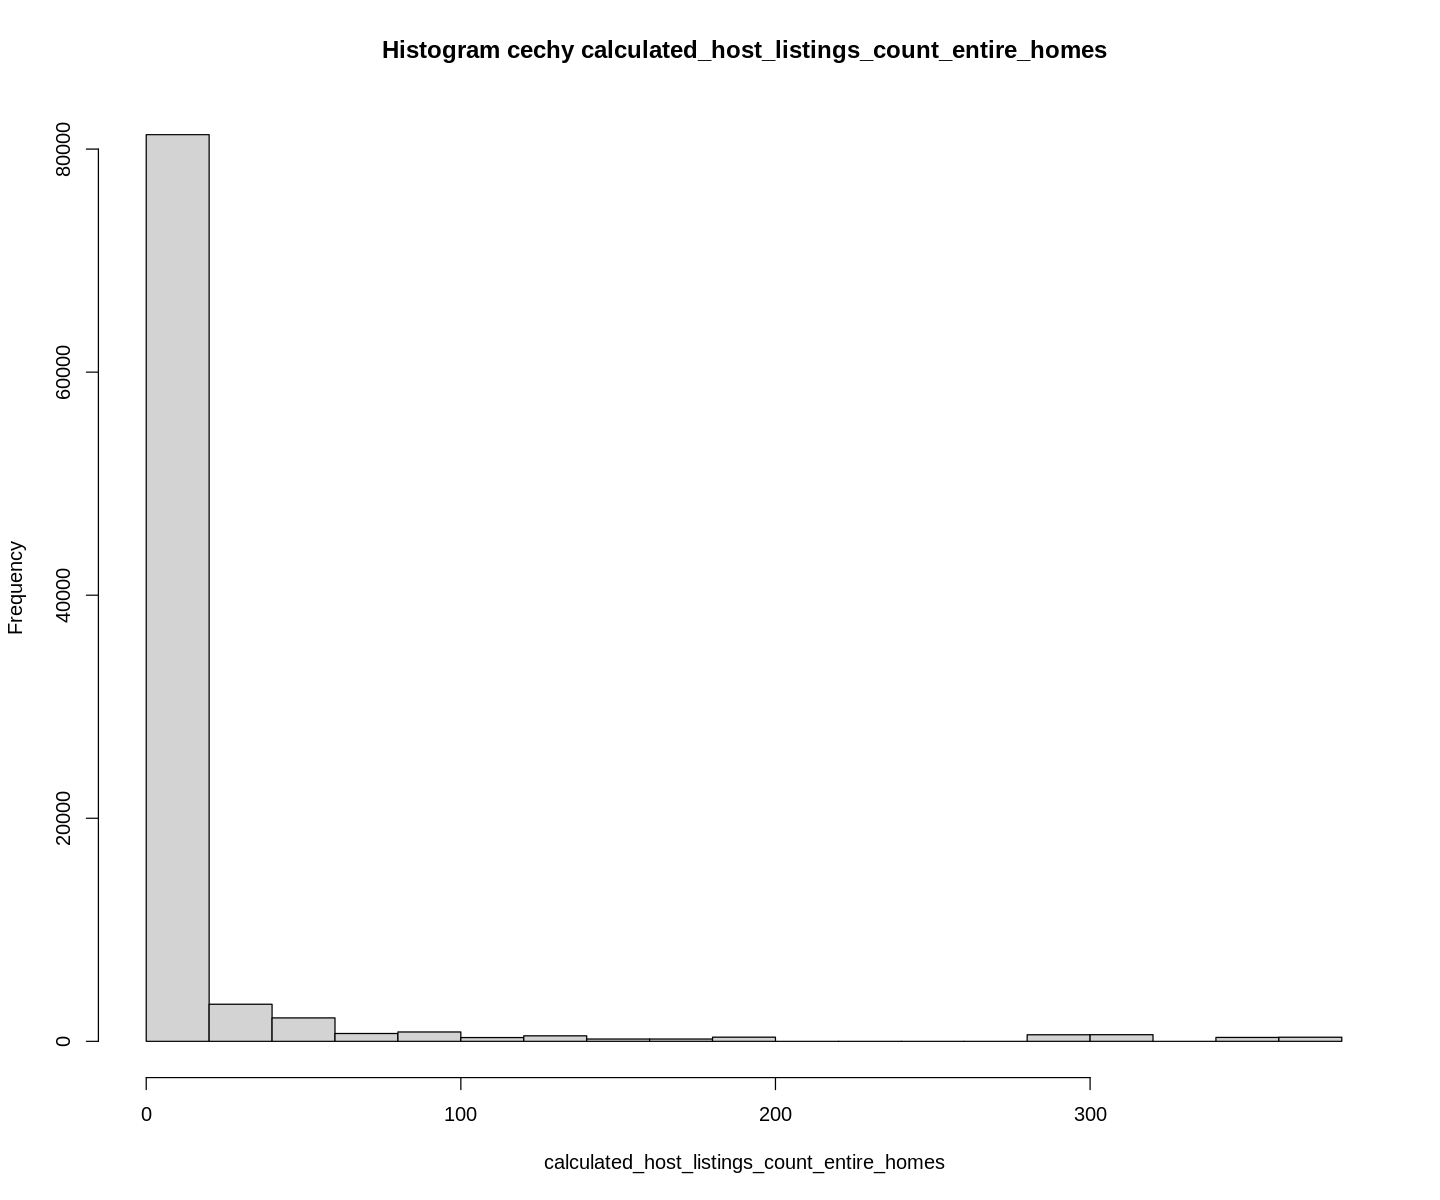

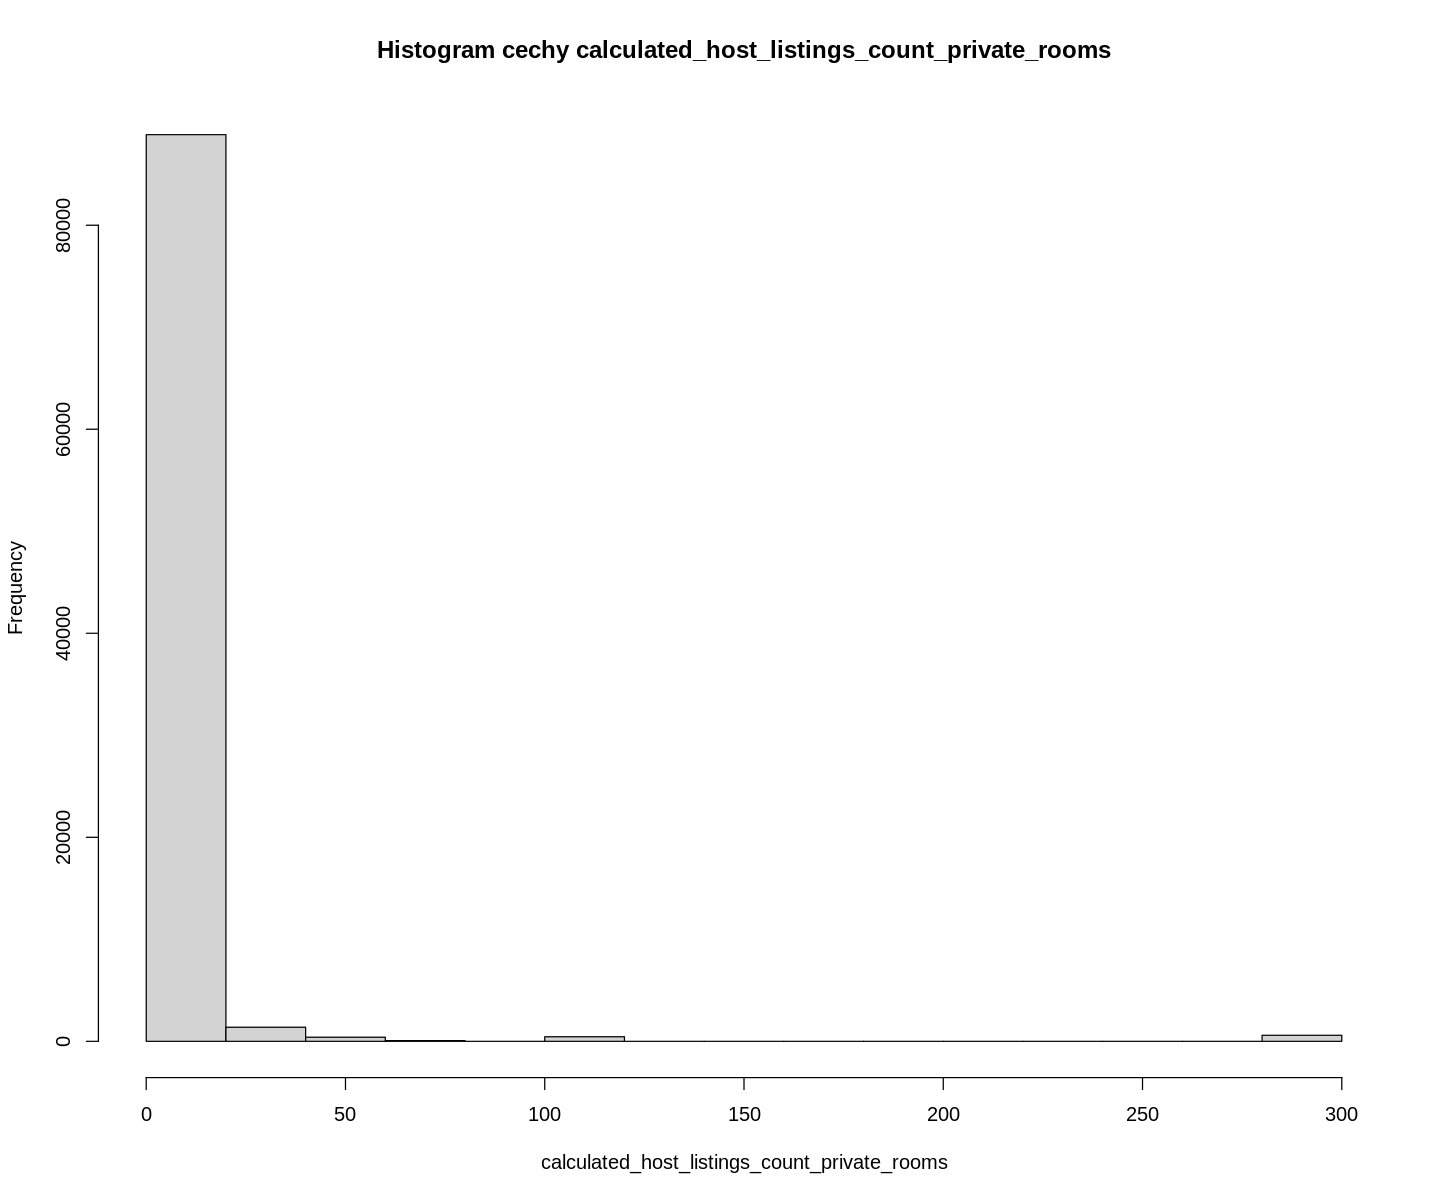

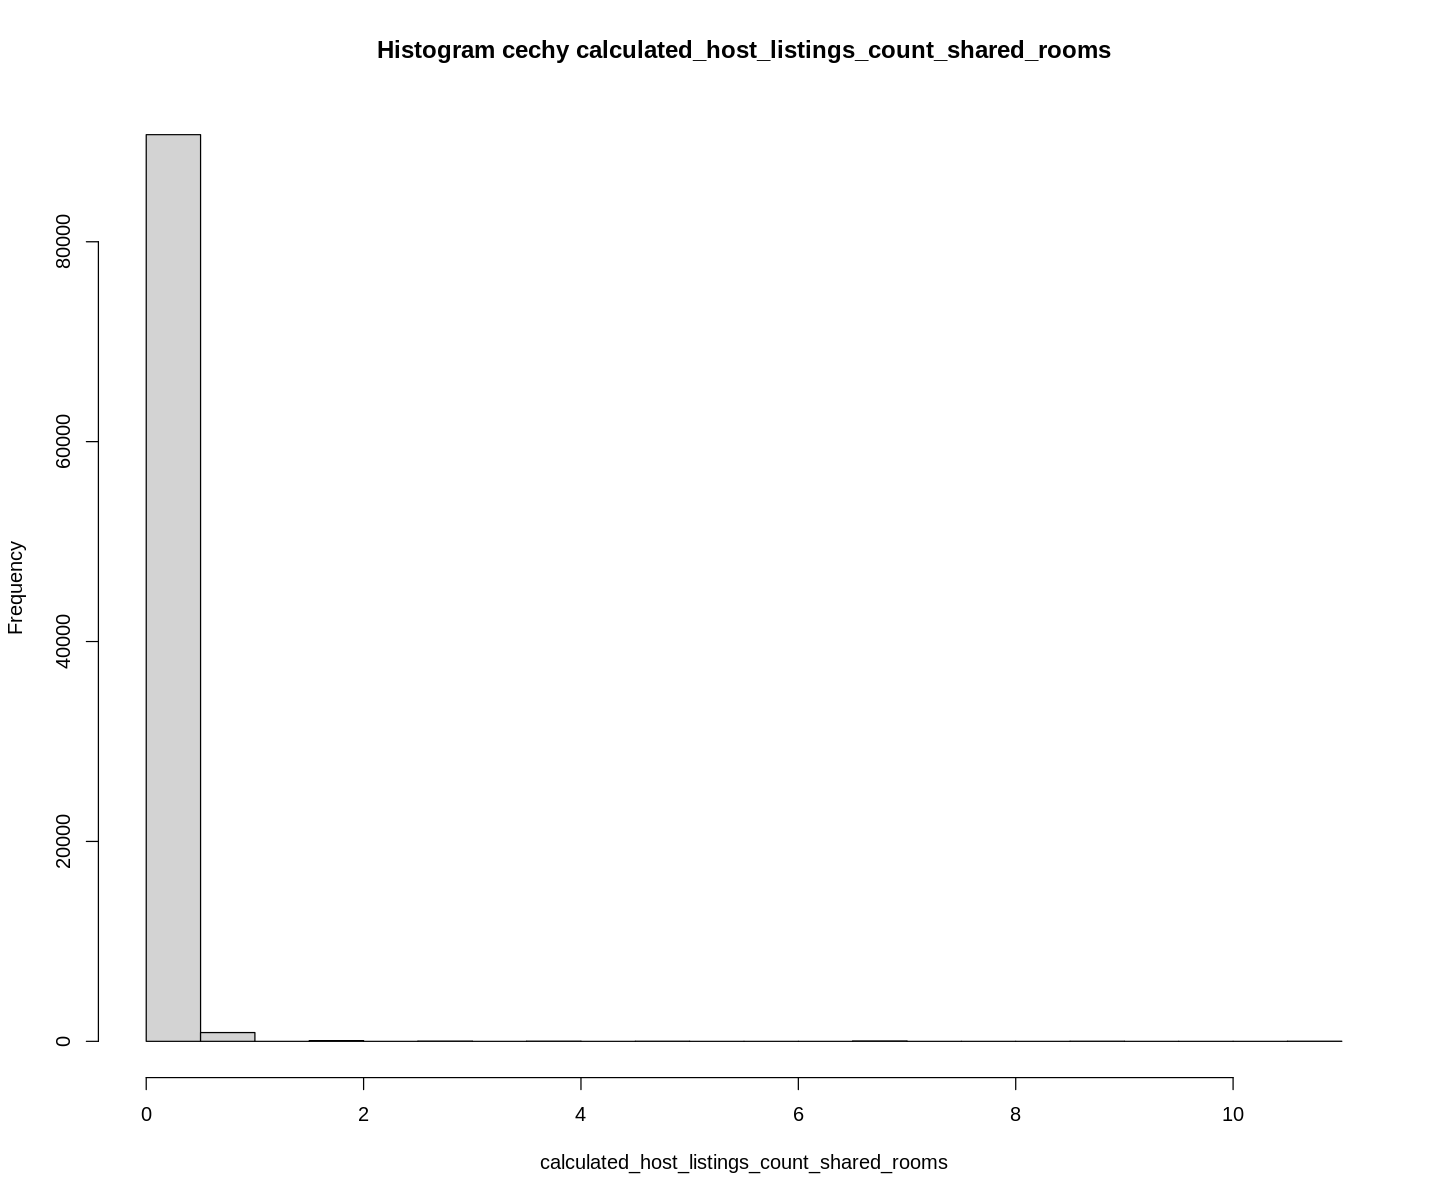

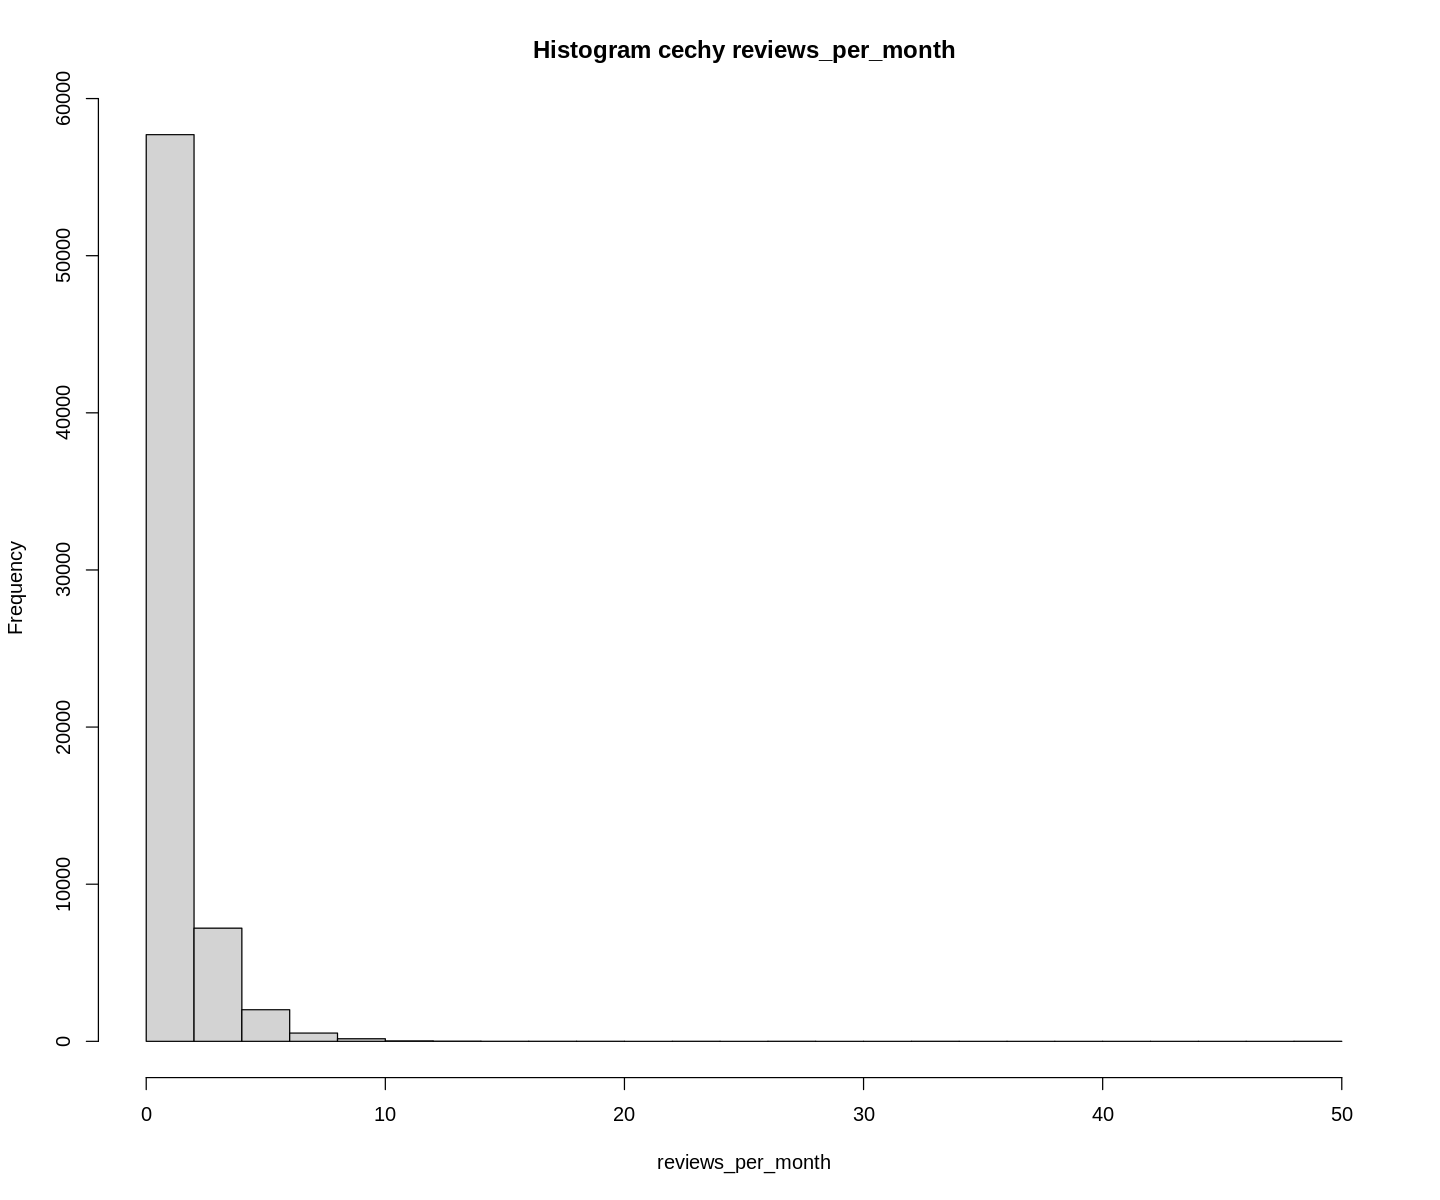

In [107]:
# Histogramy cech numerycznych
for (feature in numerical) {
  hist(df[[feature]], main = paste("Histogram cechy", feature), xlab = feature)
}

In [108]:
# Stworzenie string z cechami kategorycznymi
features_cat <- colnames(df)[sapply(df, is.character)]
features_cat_string <- paste0("'", features_cat, "', ", collapse = "")
print(features_cat_string)

[1] "'id', 'listing_url', 'source', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'instant_bookable', "


In [109]:
# zmienne kategoryczne - wybrane (niepotrzebne zostały usunięte)
categorical <- c(
  # 'listing_url', - nieważne
  'last_scraped',
  'source',
  # 'name', - nieważne
  # 'neighborhood_overview', - nieważne
  # 'picture_url', - nieważne
  # 'host_url', - nieważne
  # 'host_name', - nieważne
  'host_since',
  # 'host_location', - nieważne
  # 'host_about', - nieważne
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'host_is_superhost',
  # 'host_thumbnail_url', - nieważne
  # 'host_picture_url', - nieważne
  # 'host_neighbourhood', - nieważne
  'host_verifications',
  'host_has_profile_pic',
  'host_identity_verified',
  # 'neighbourhood', - lepiej wziąć neighbourhood_cleansed
  'neighbourhood_cleansed',
  'property_type',
  'room_type',
  'bathrooms_text',
  # 'amenities', - puste
  'price',
  'has_availability',
  'calendar_last_scraped',
  'first_review',
  'last_review',
  'instant_bookable'
)

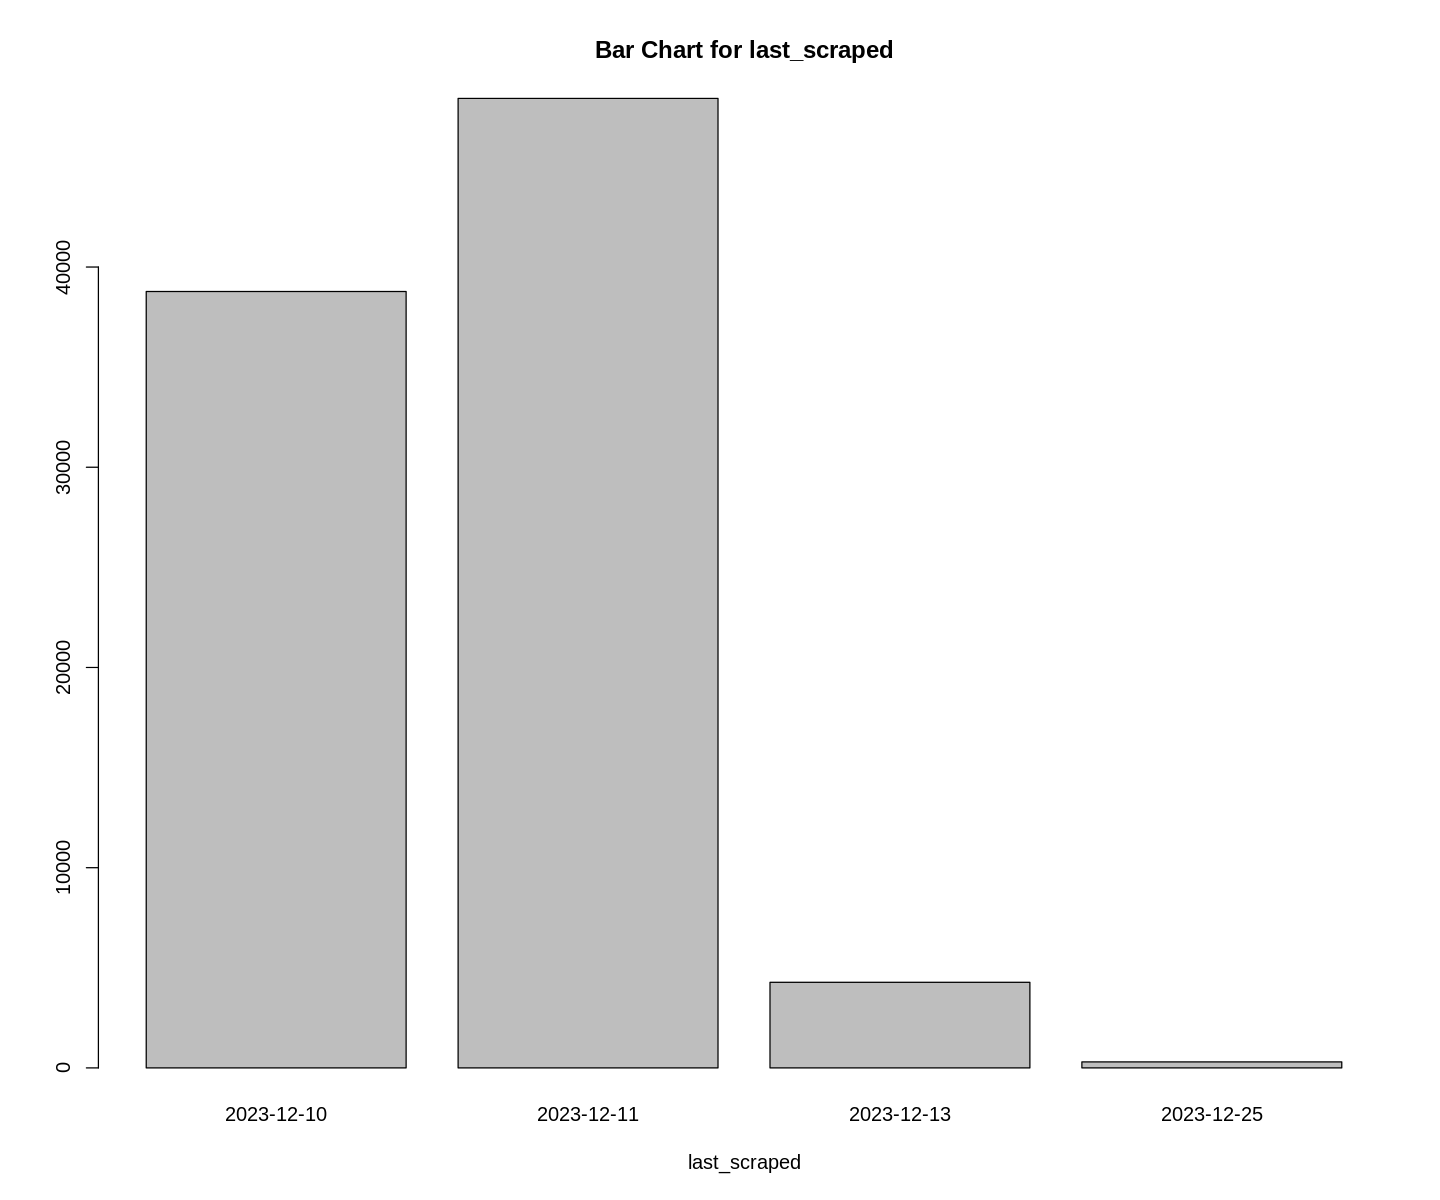

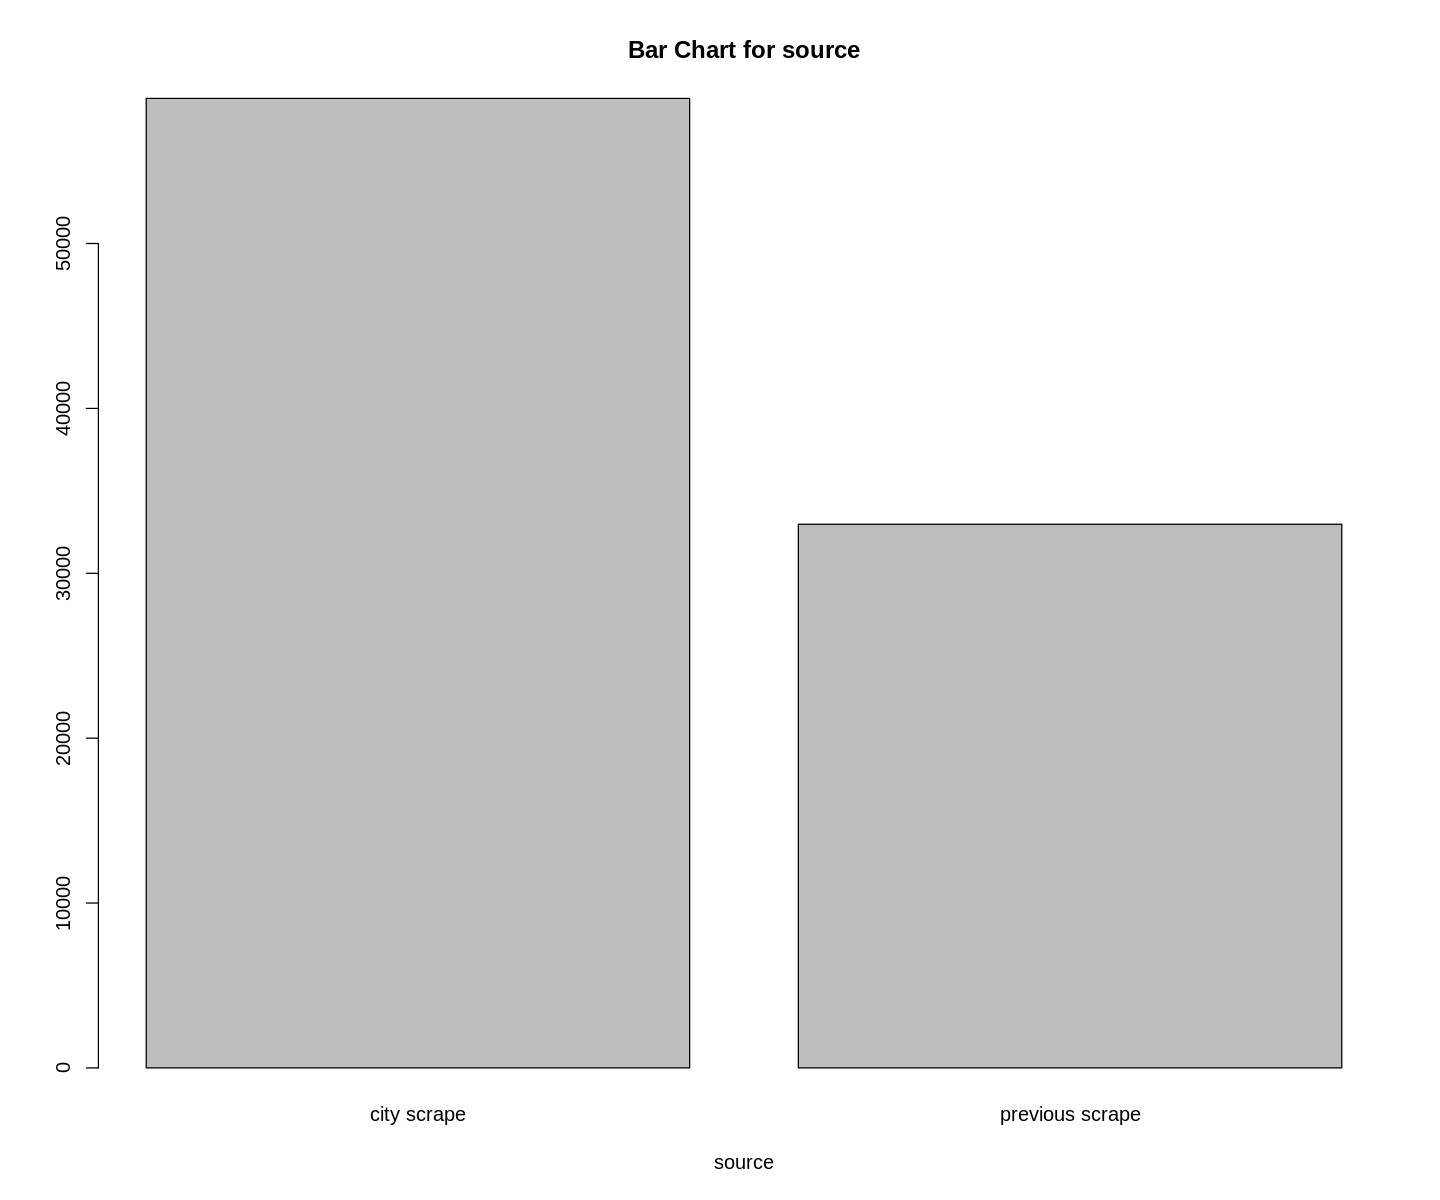

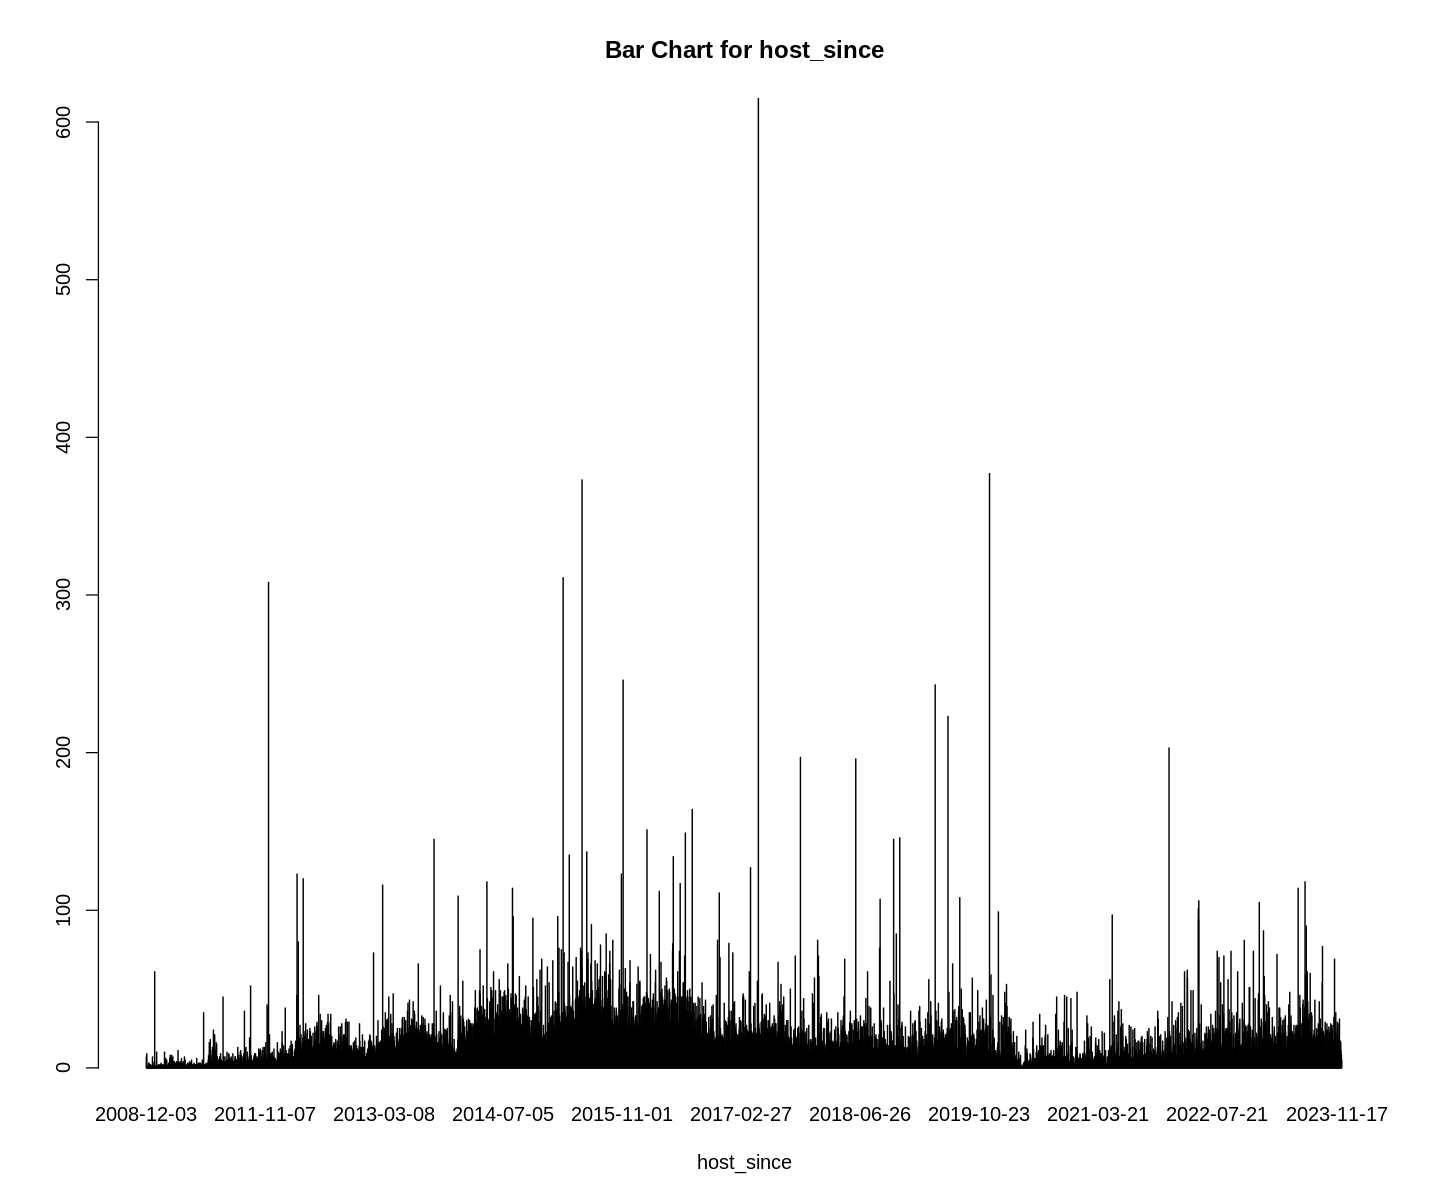

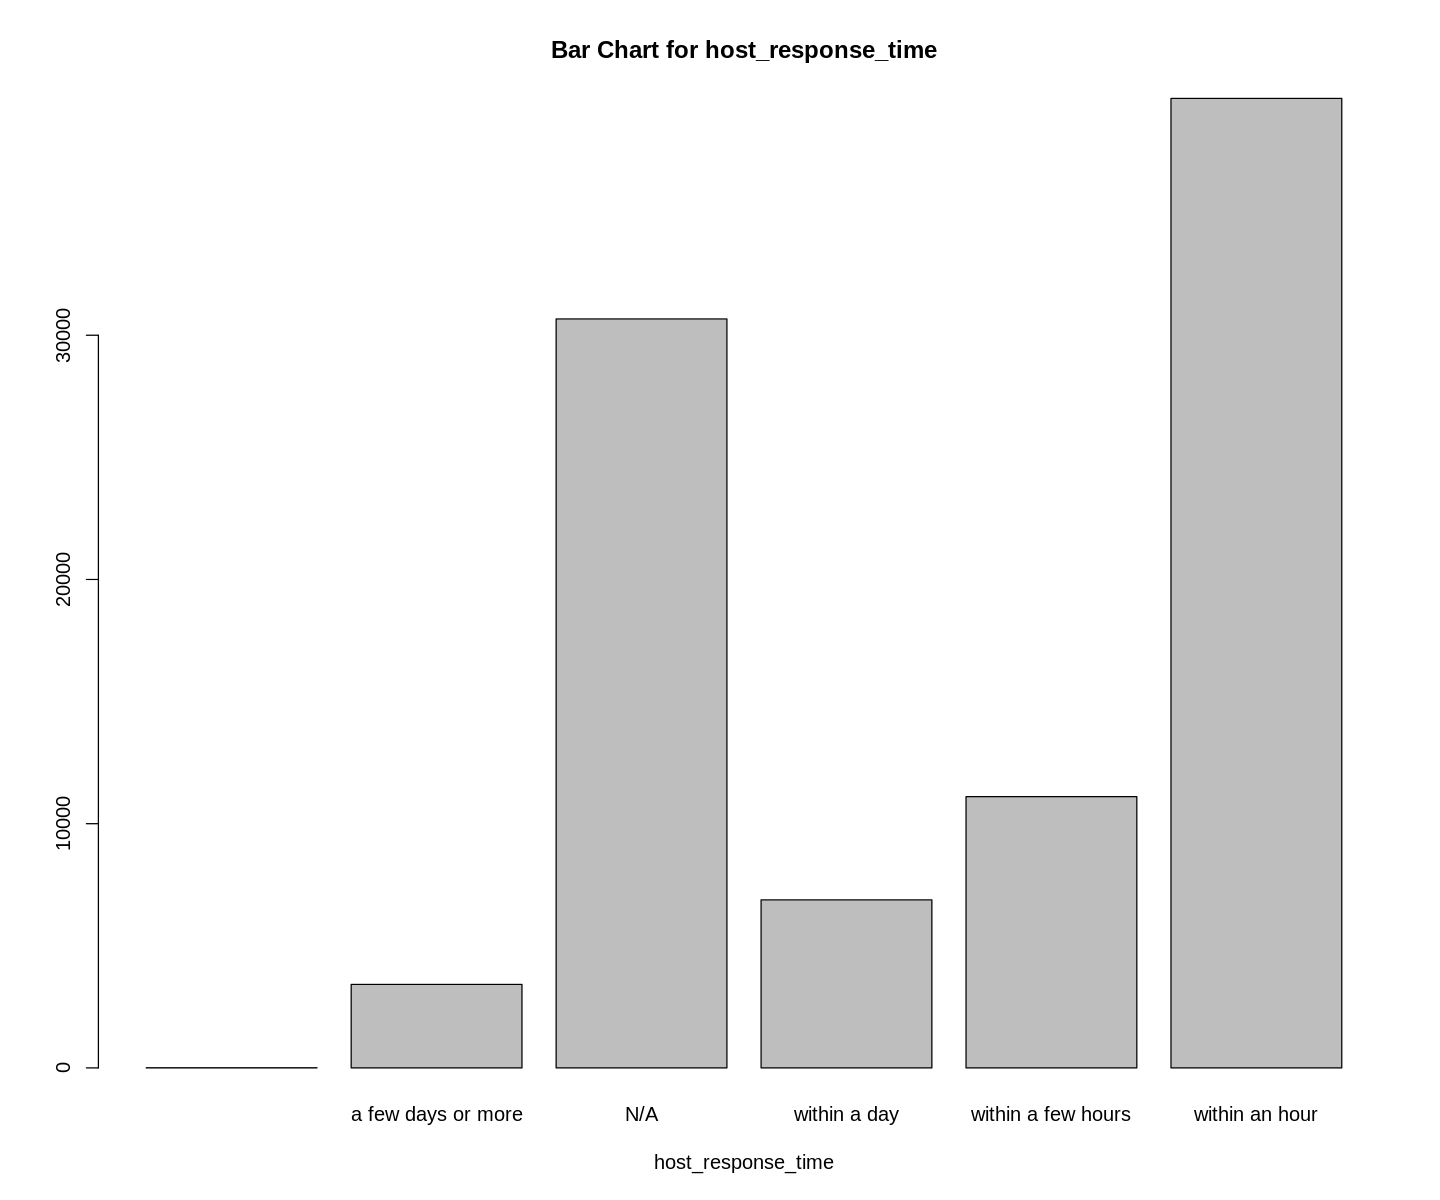

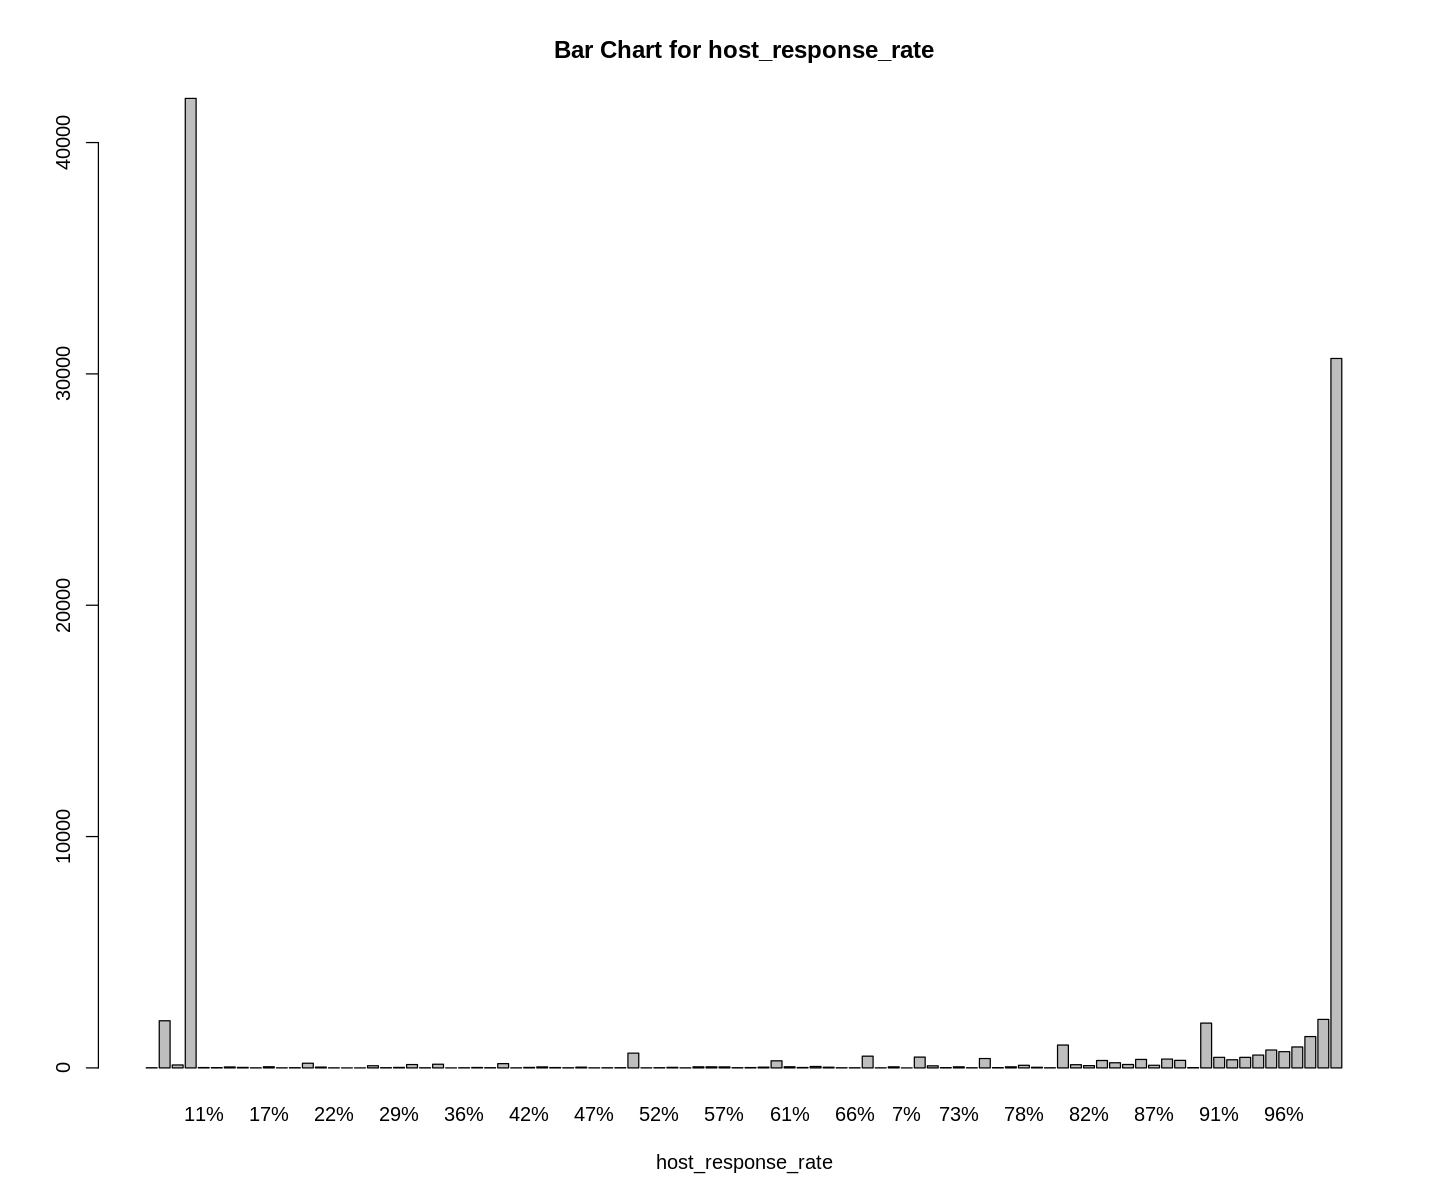

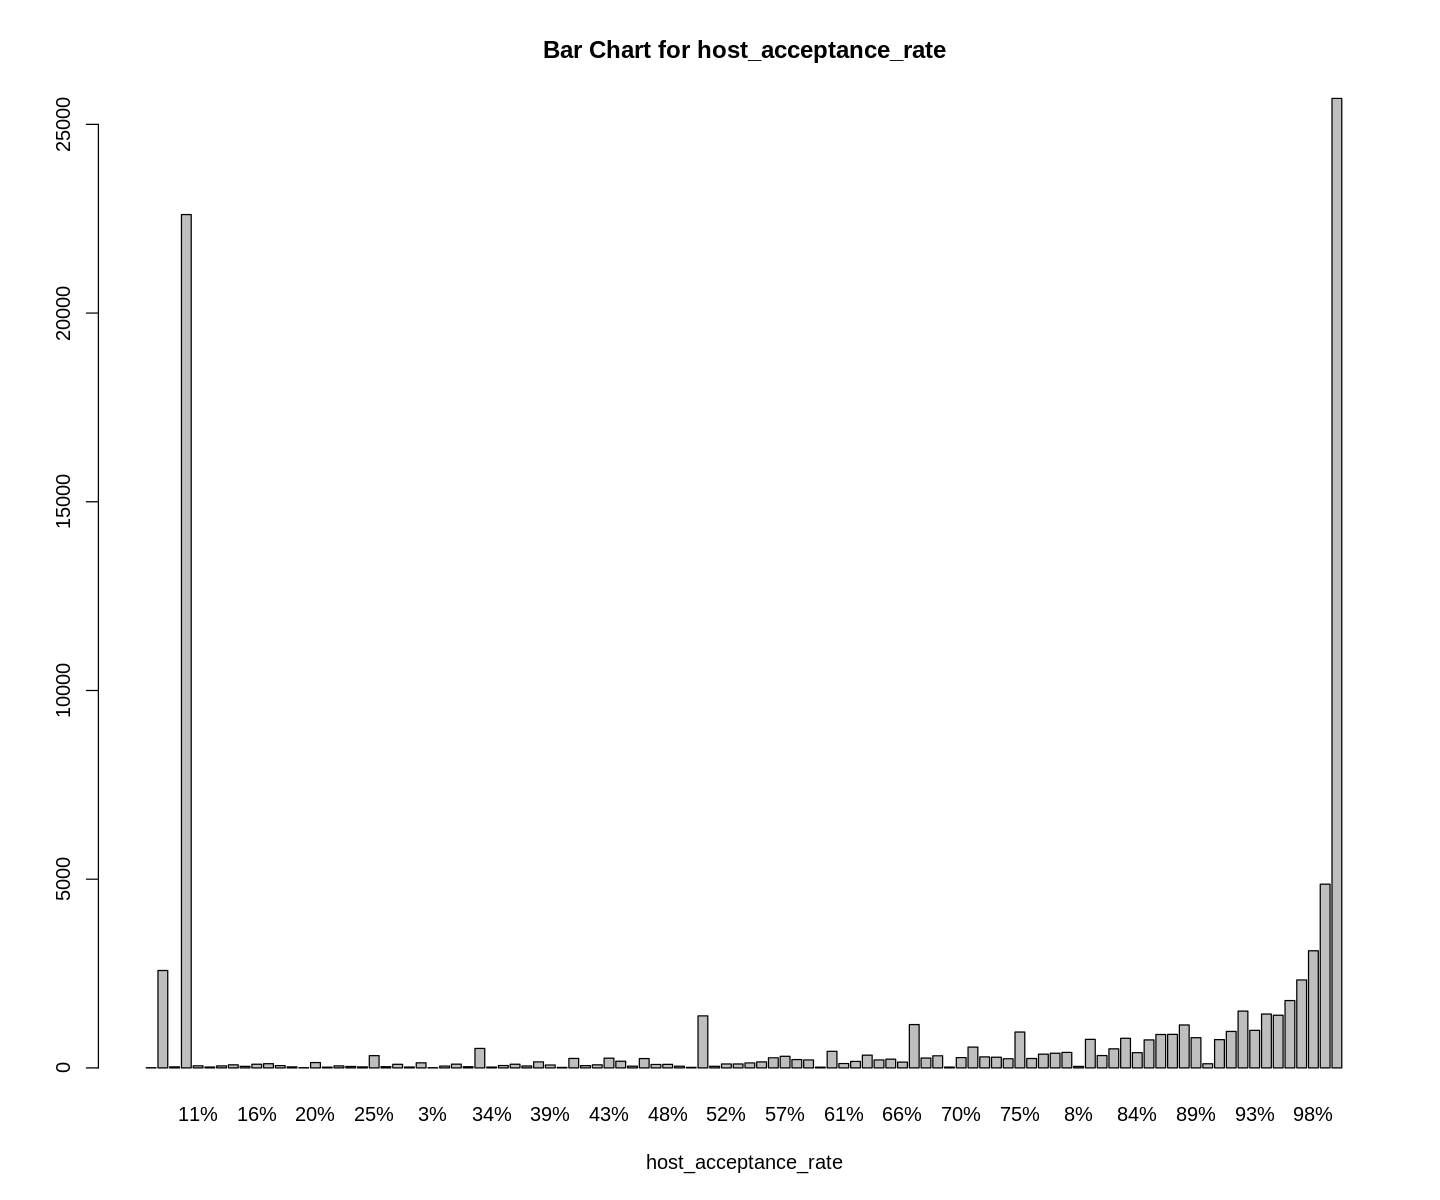

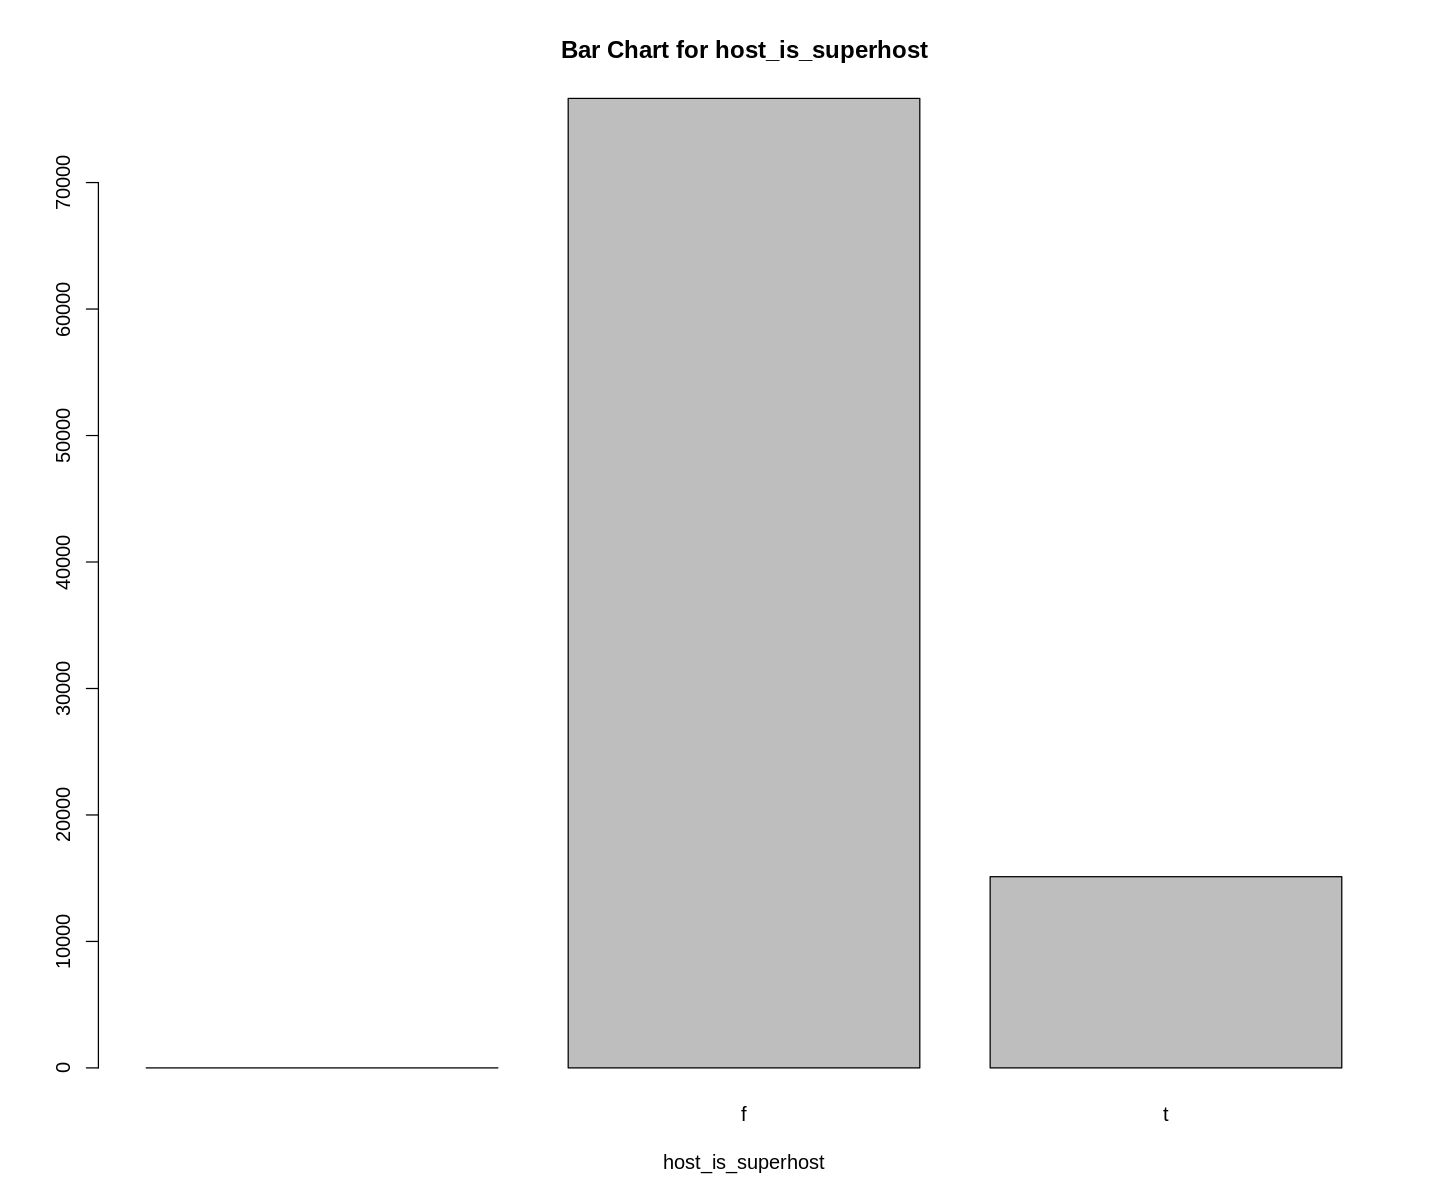

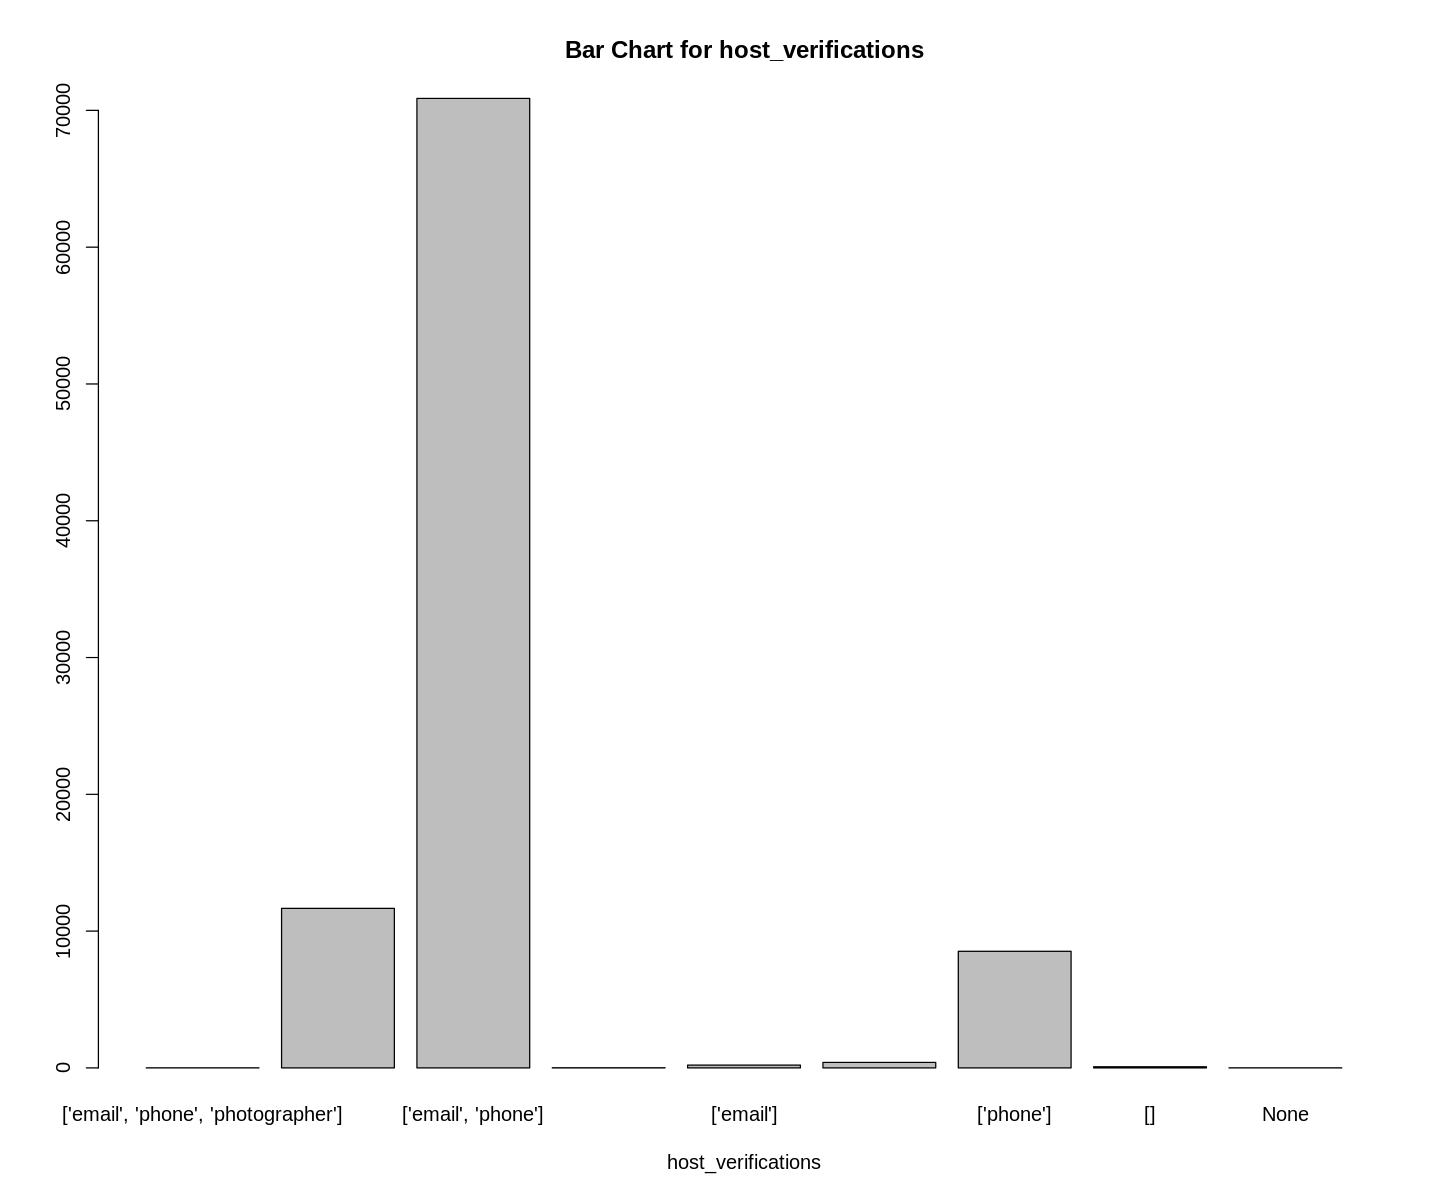

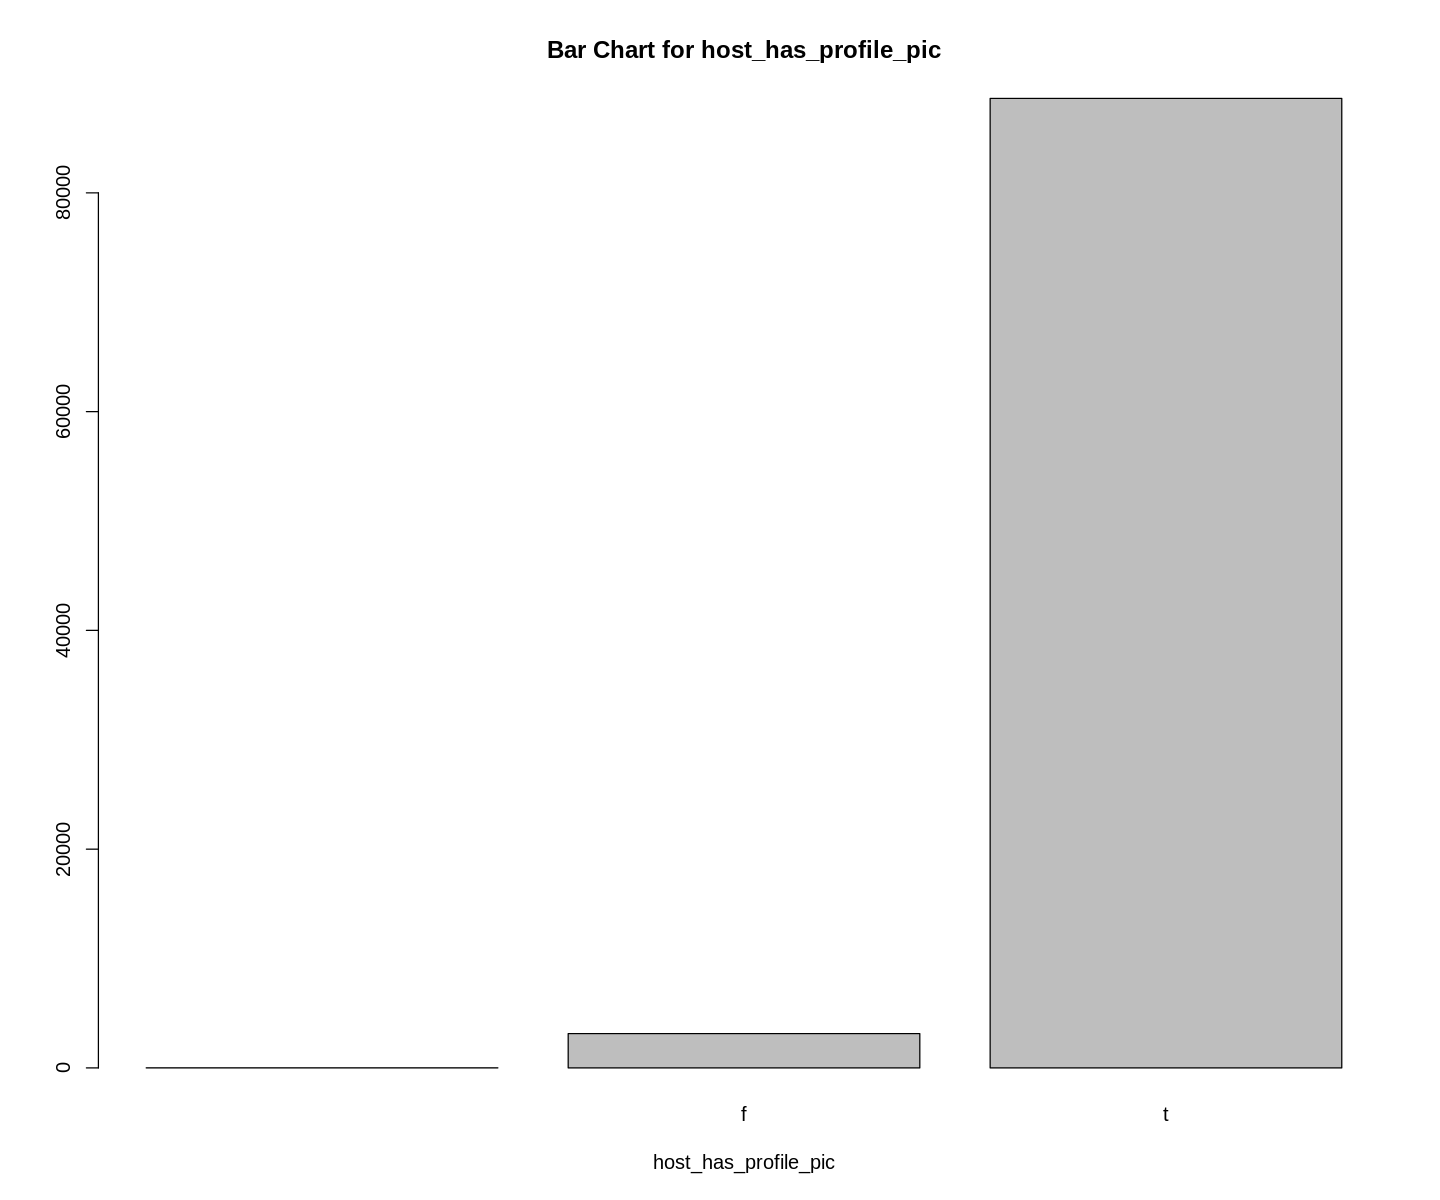

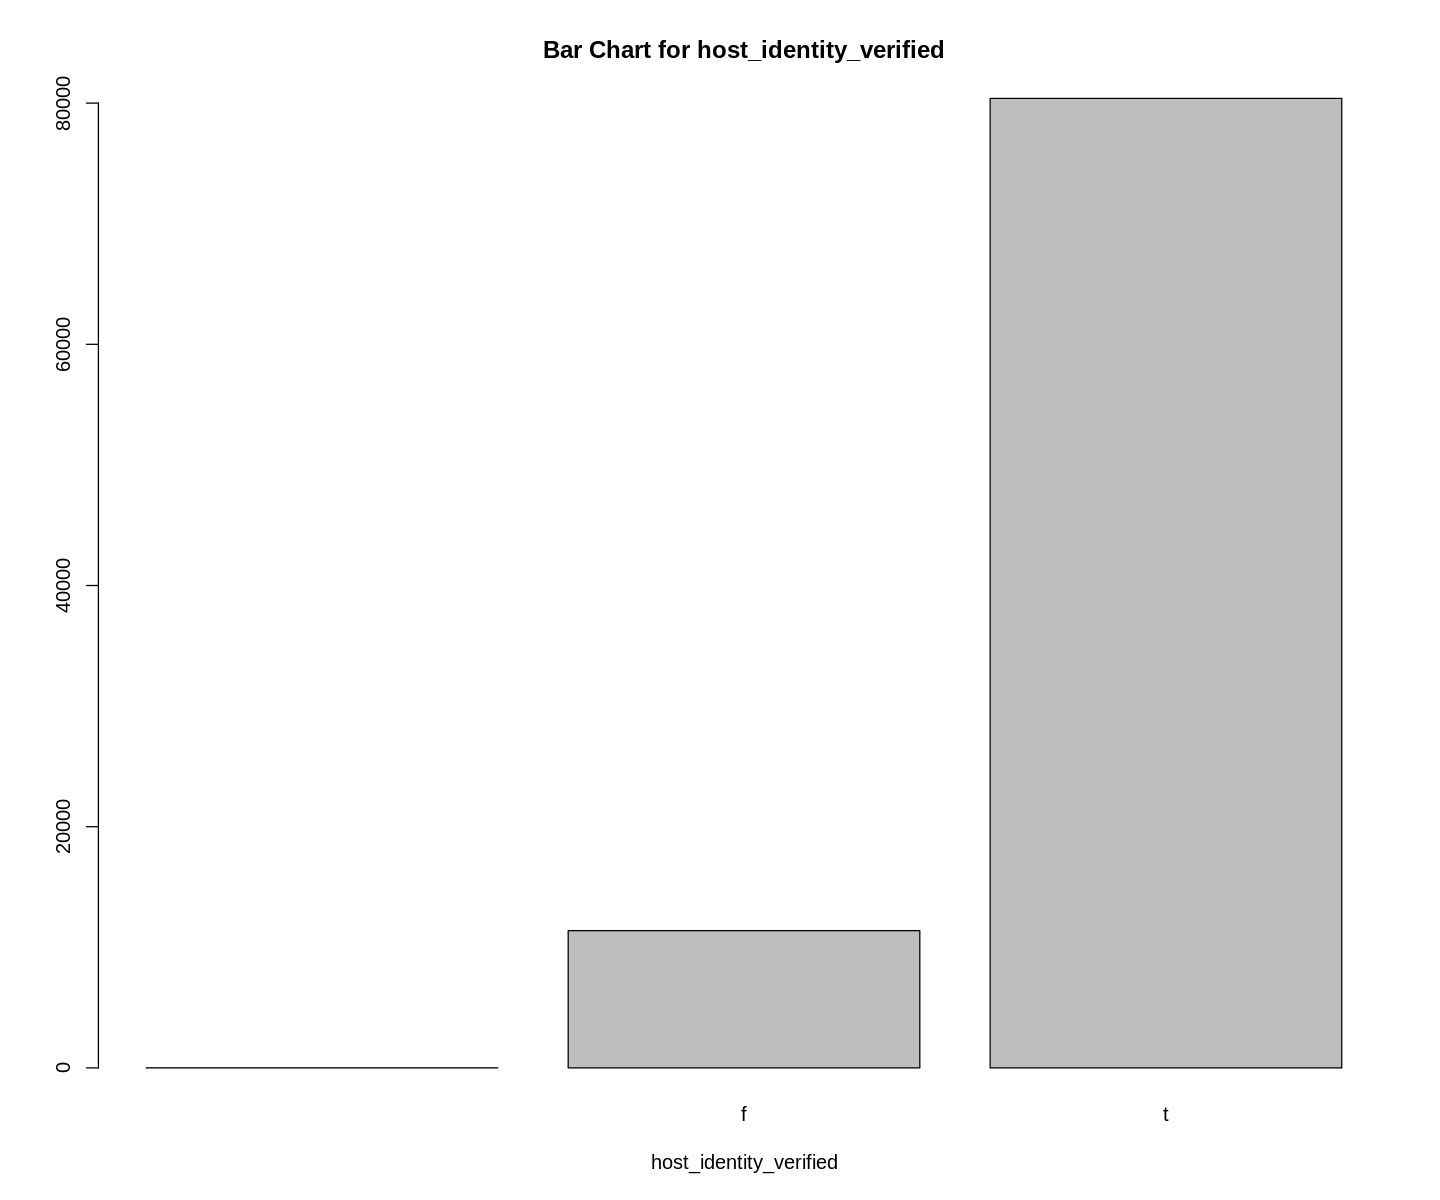

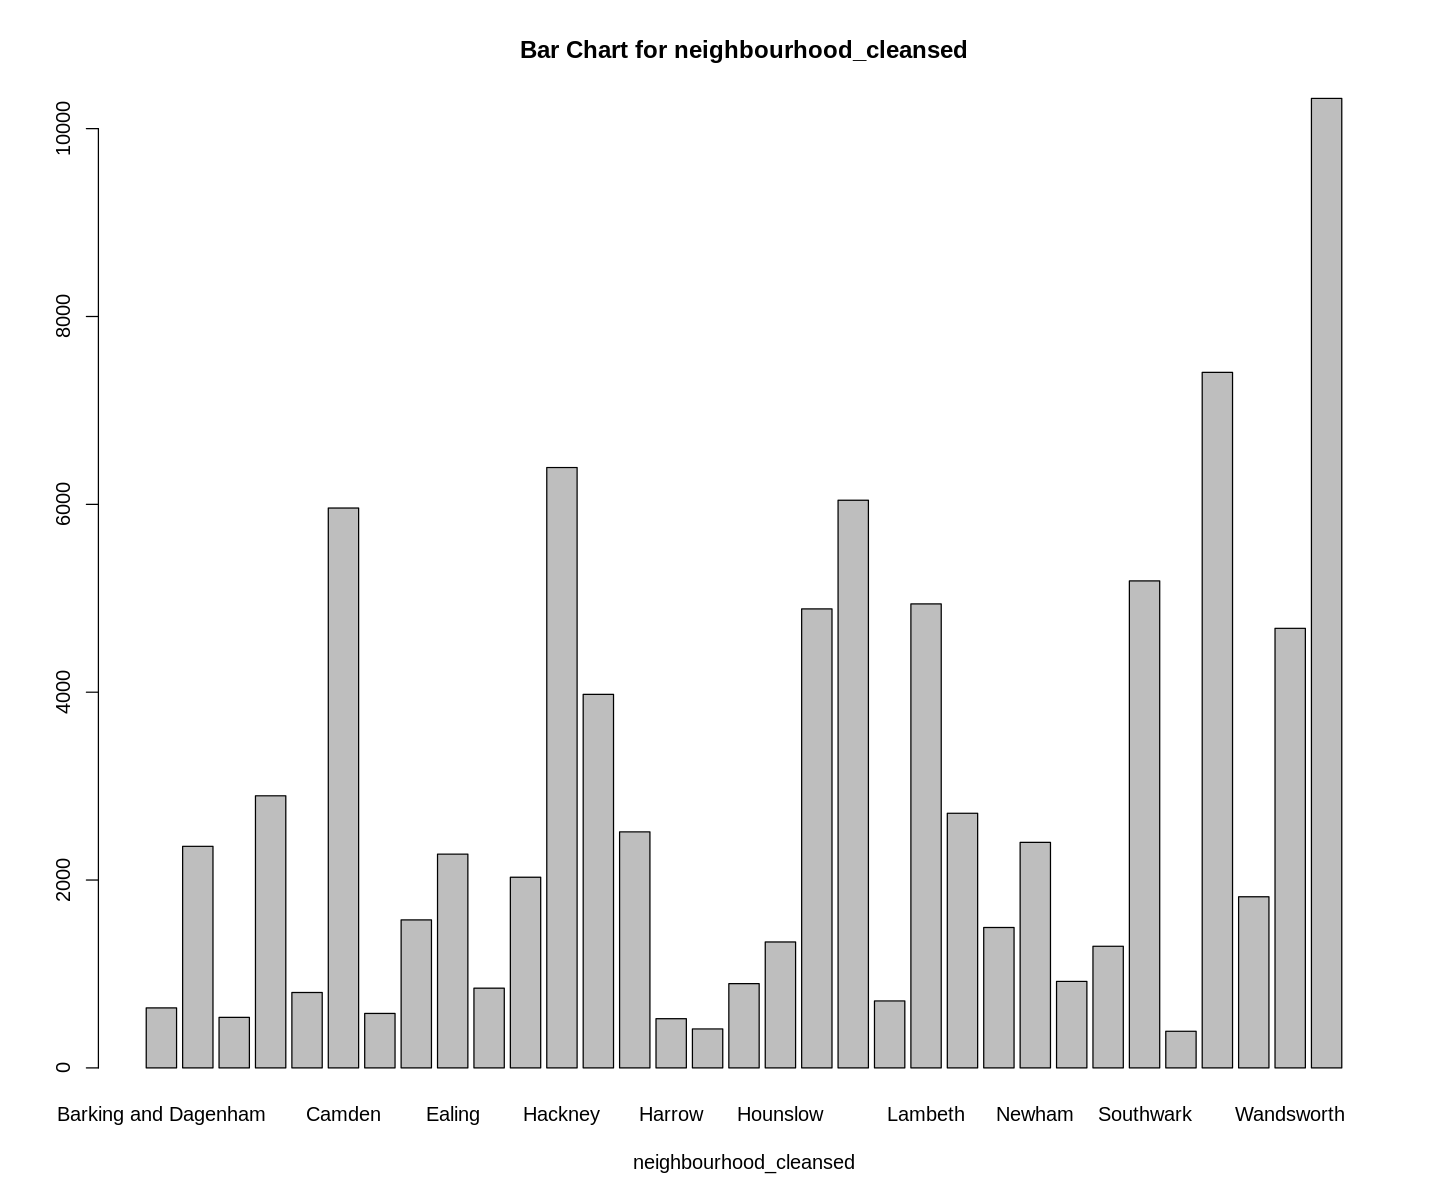

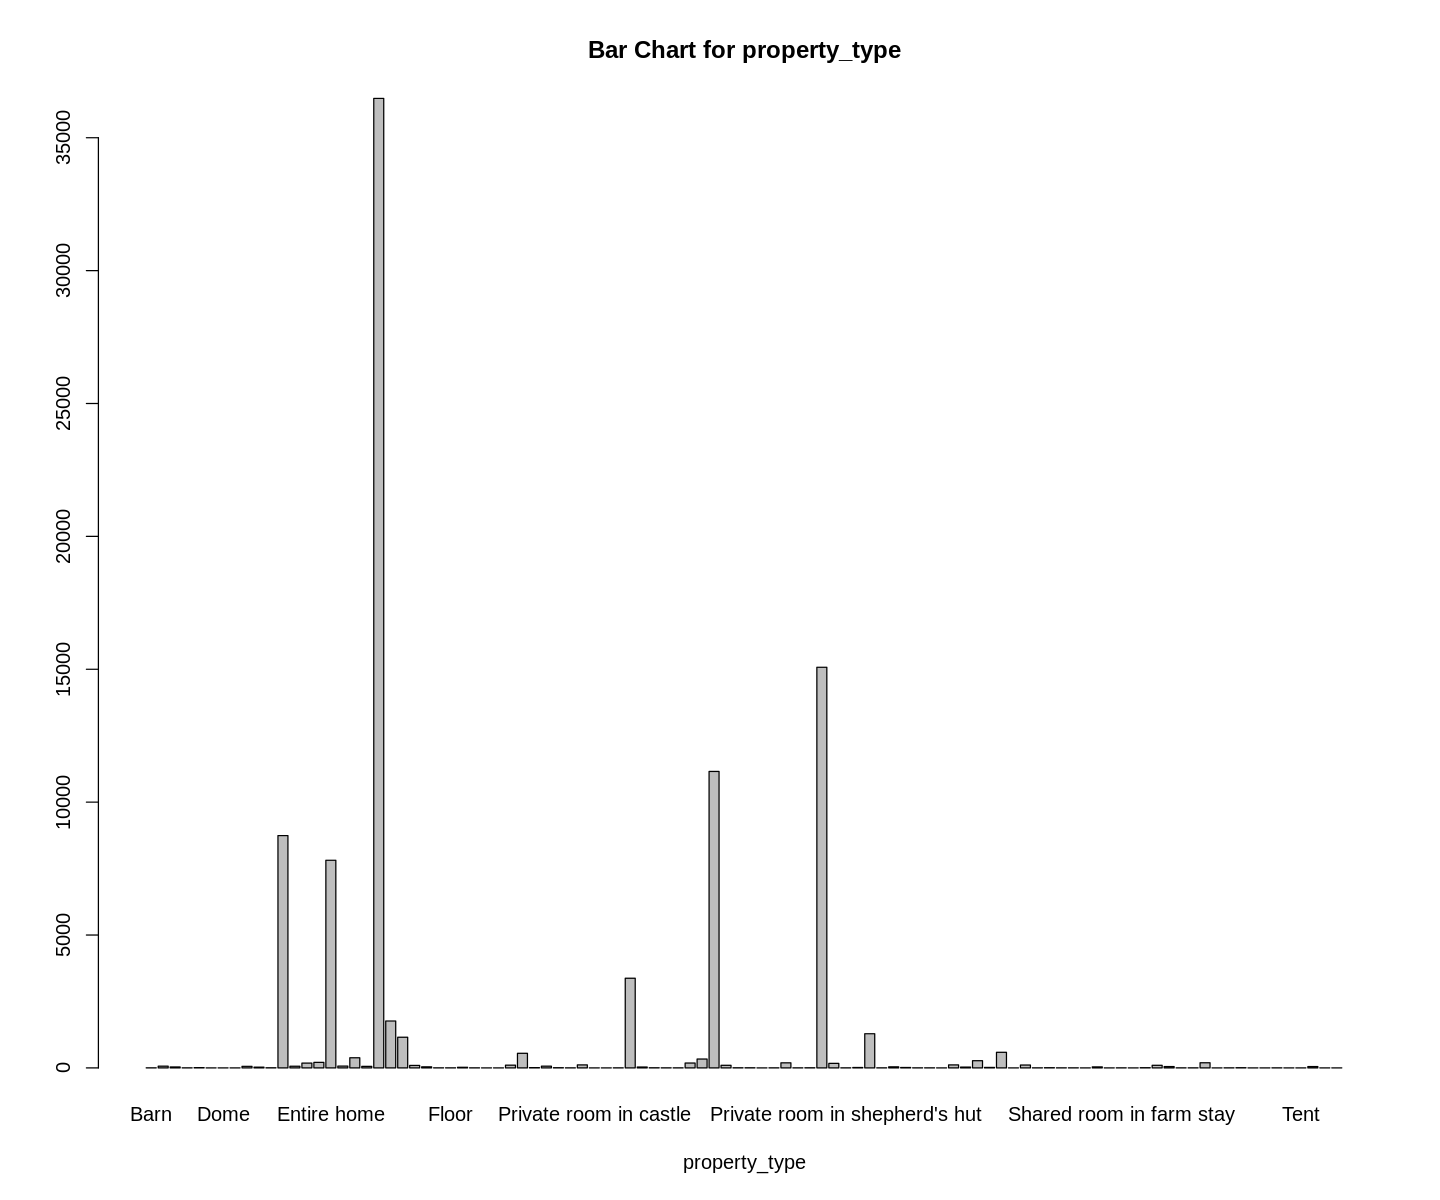

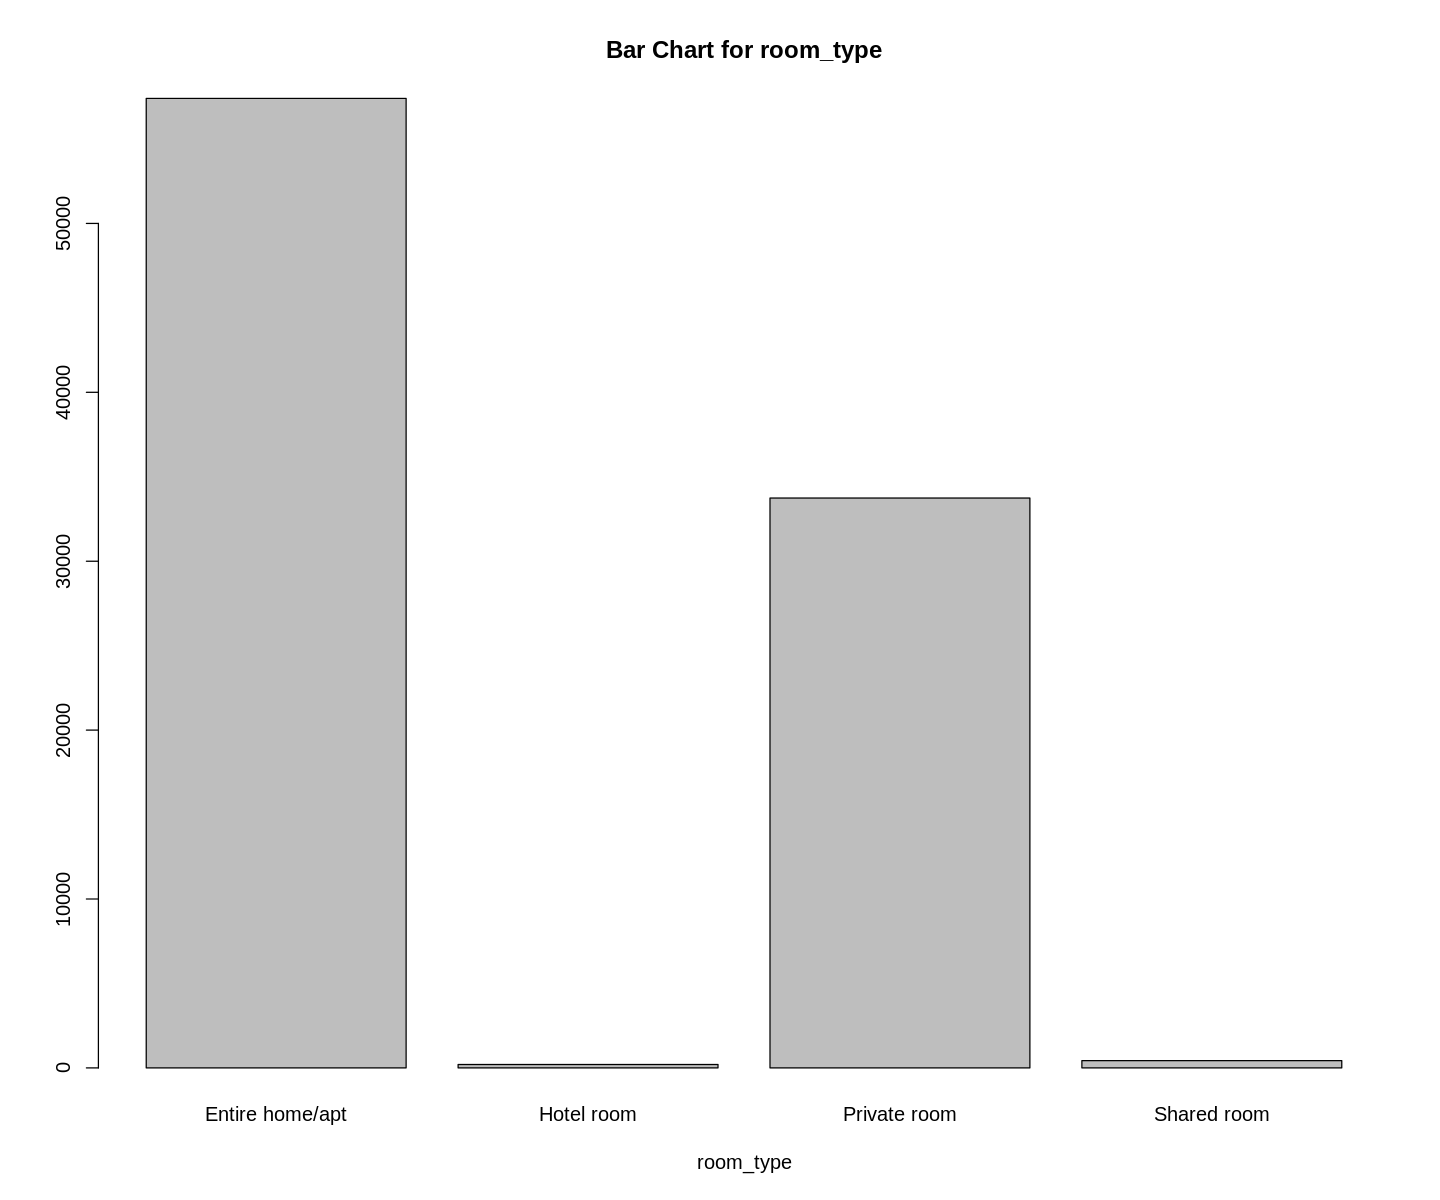

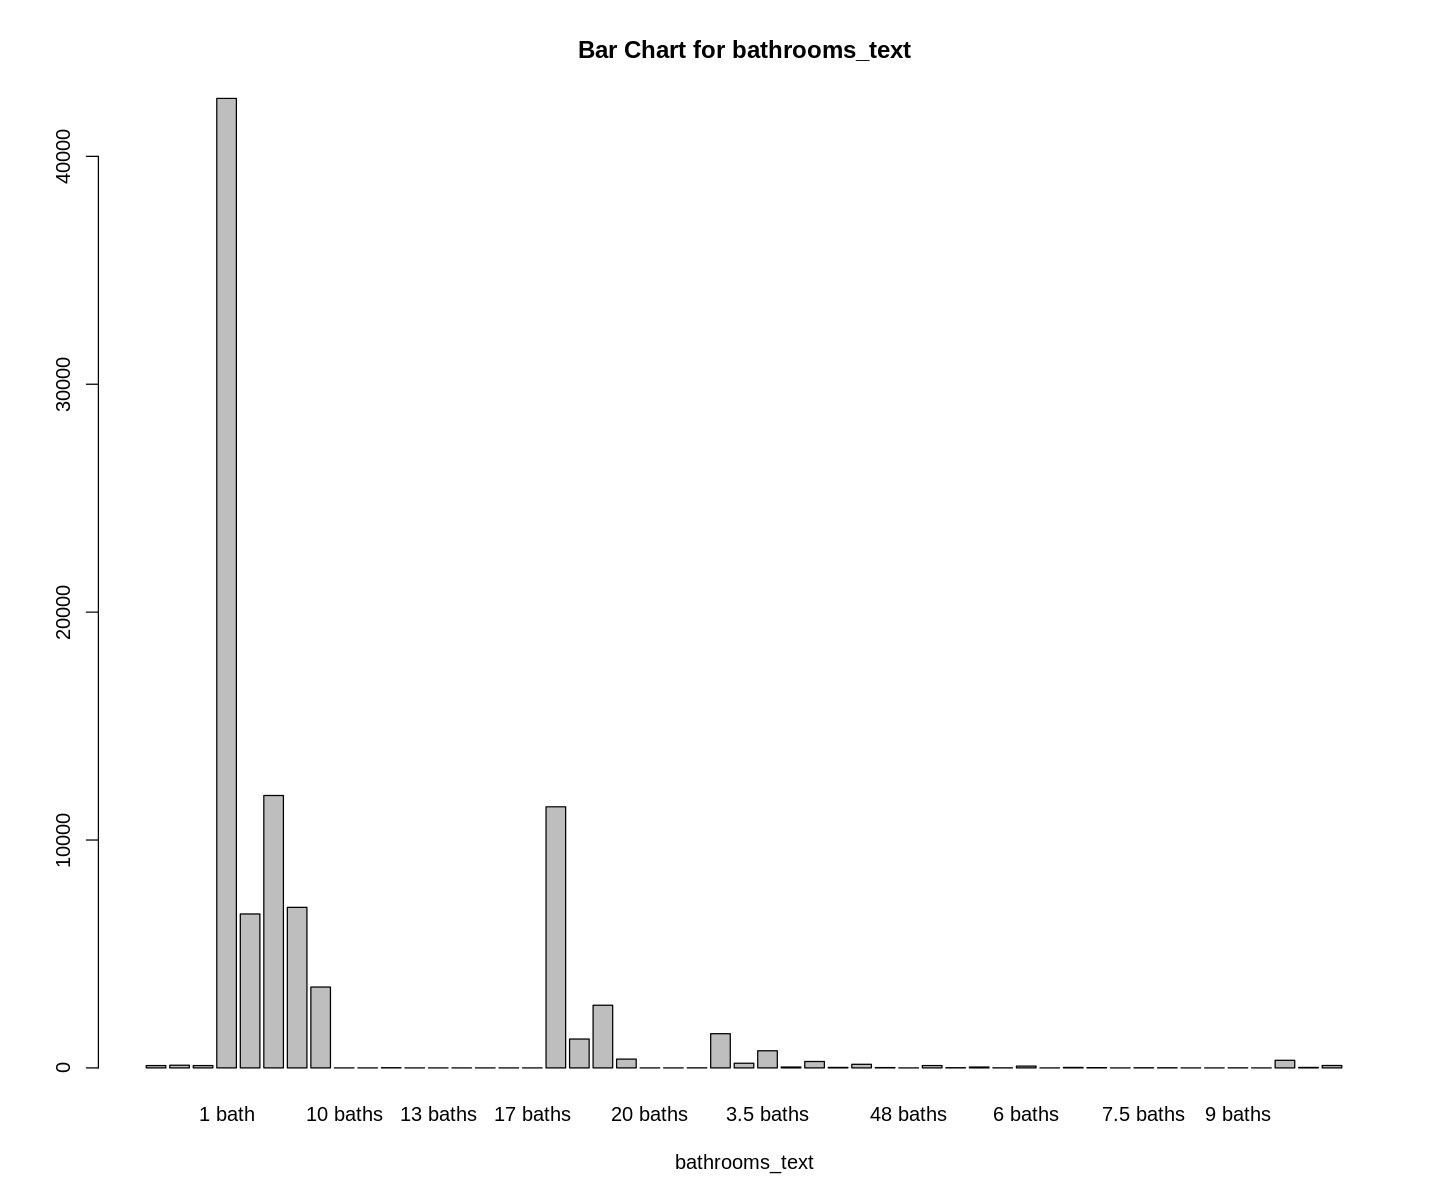

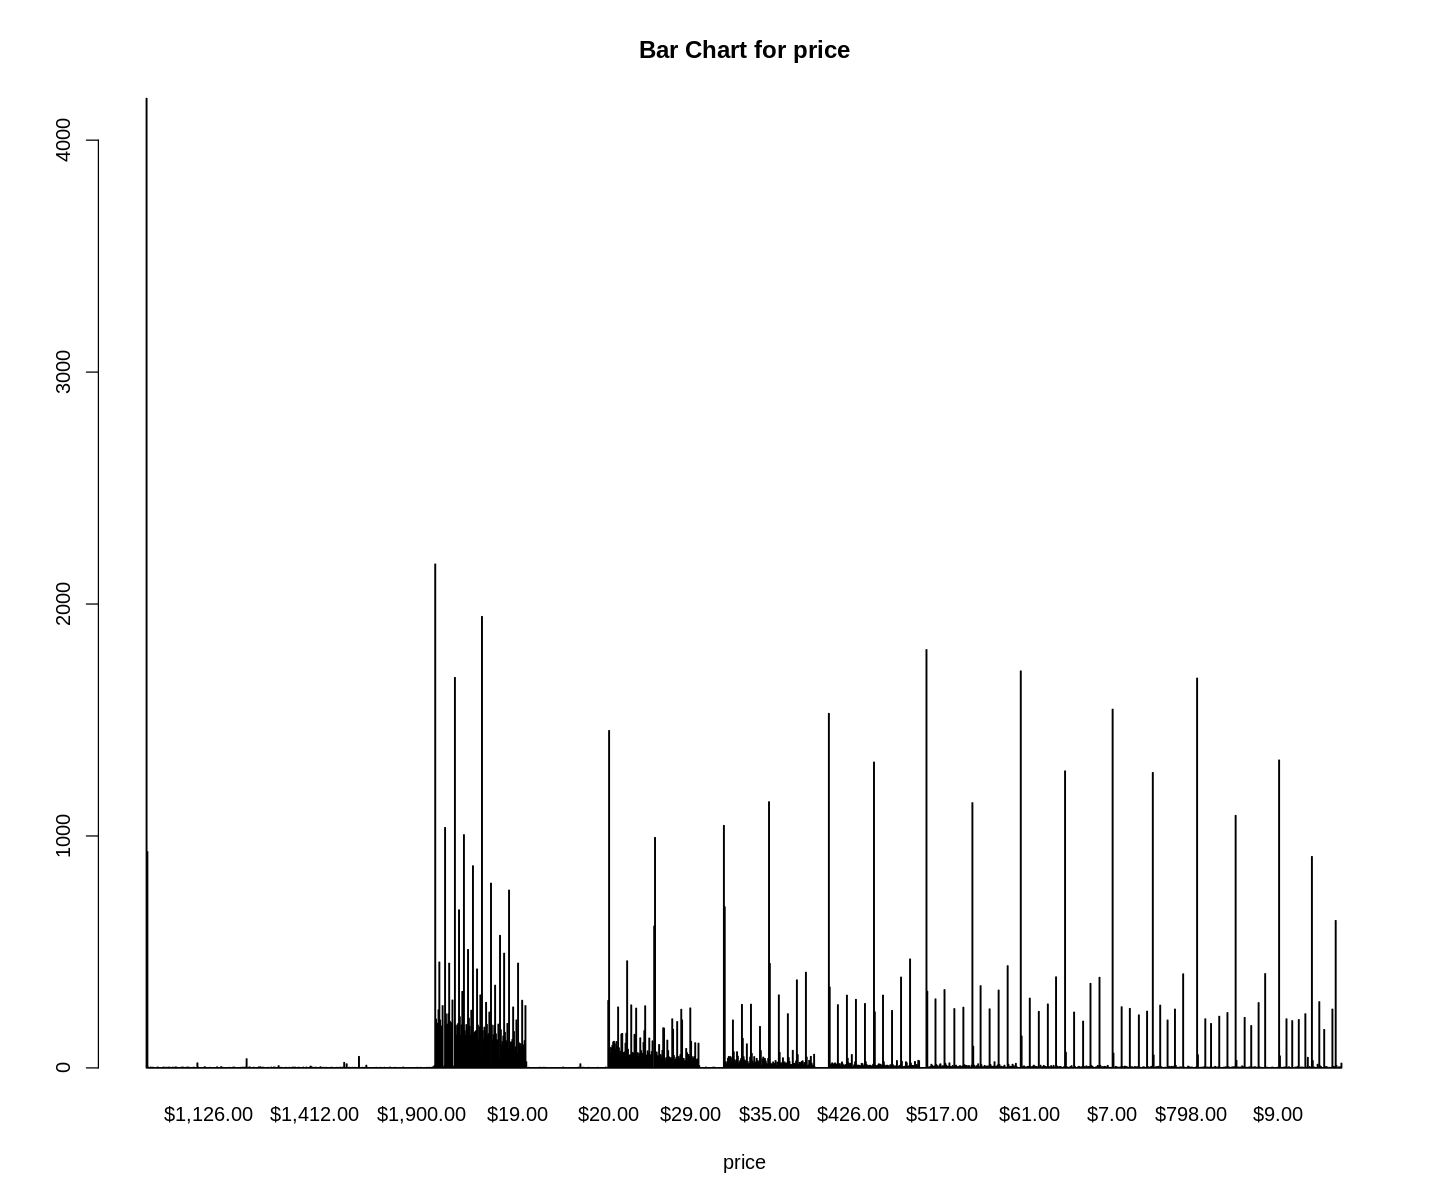

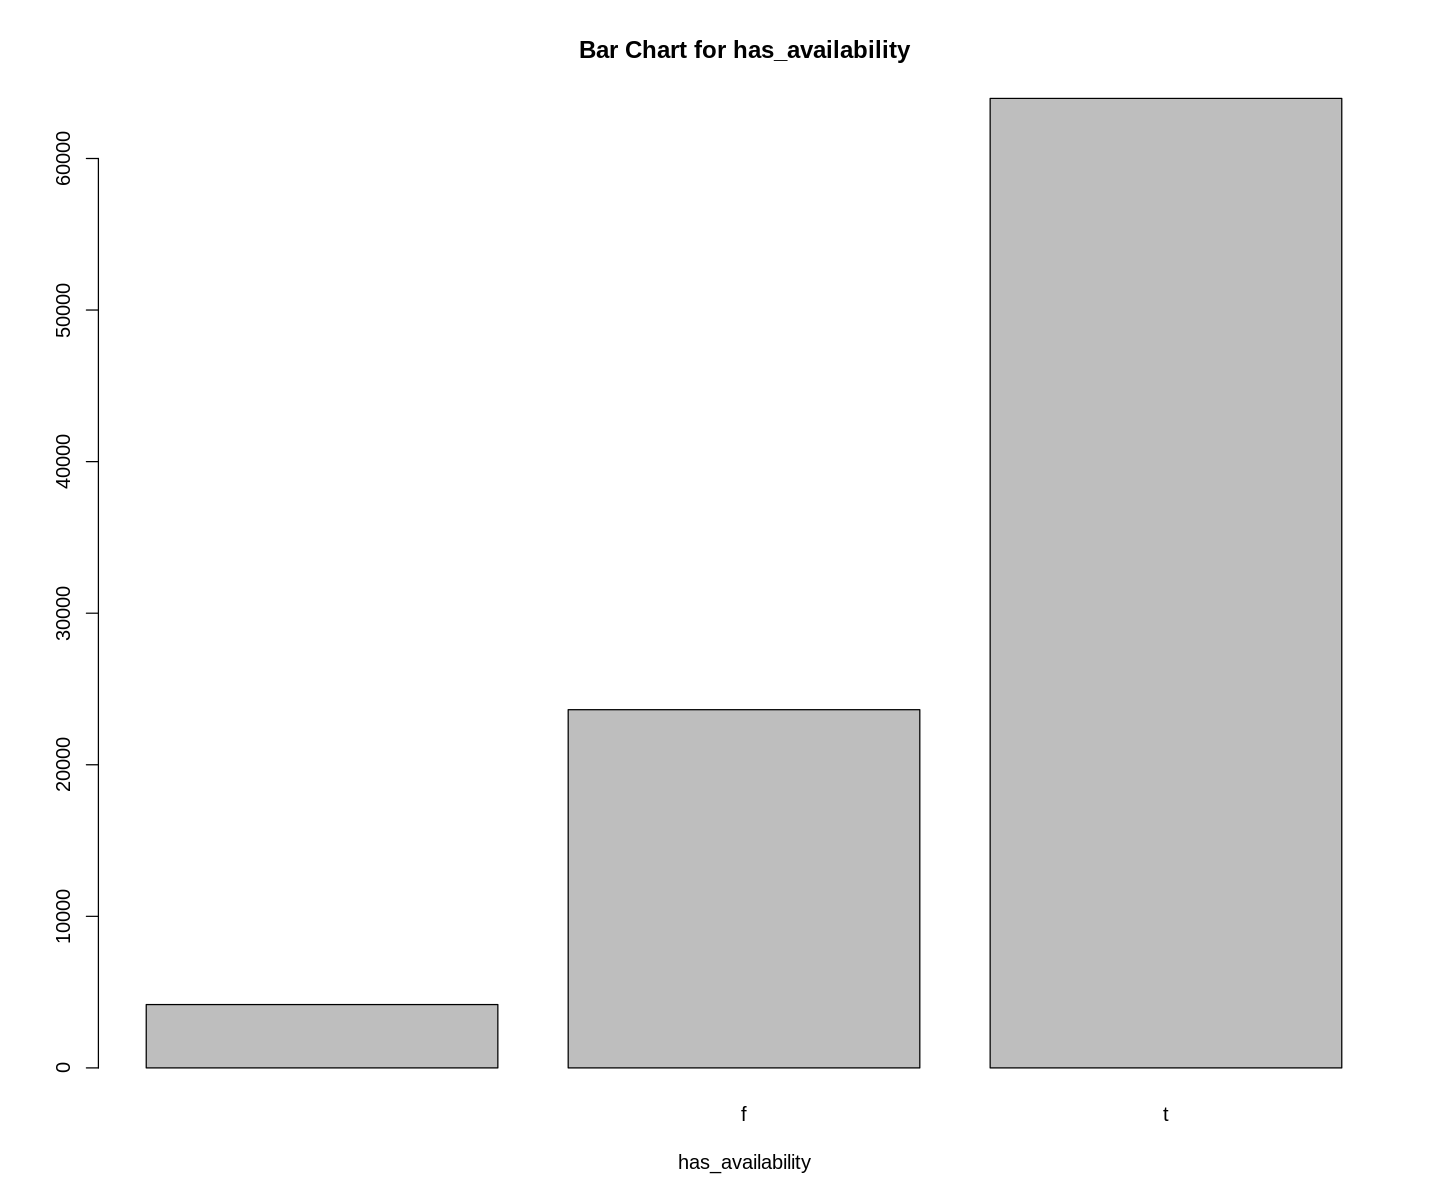

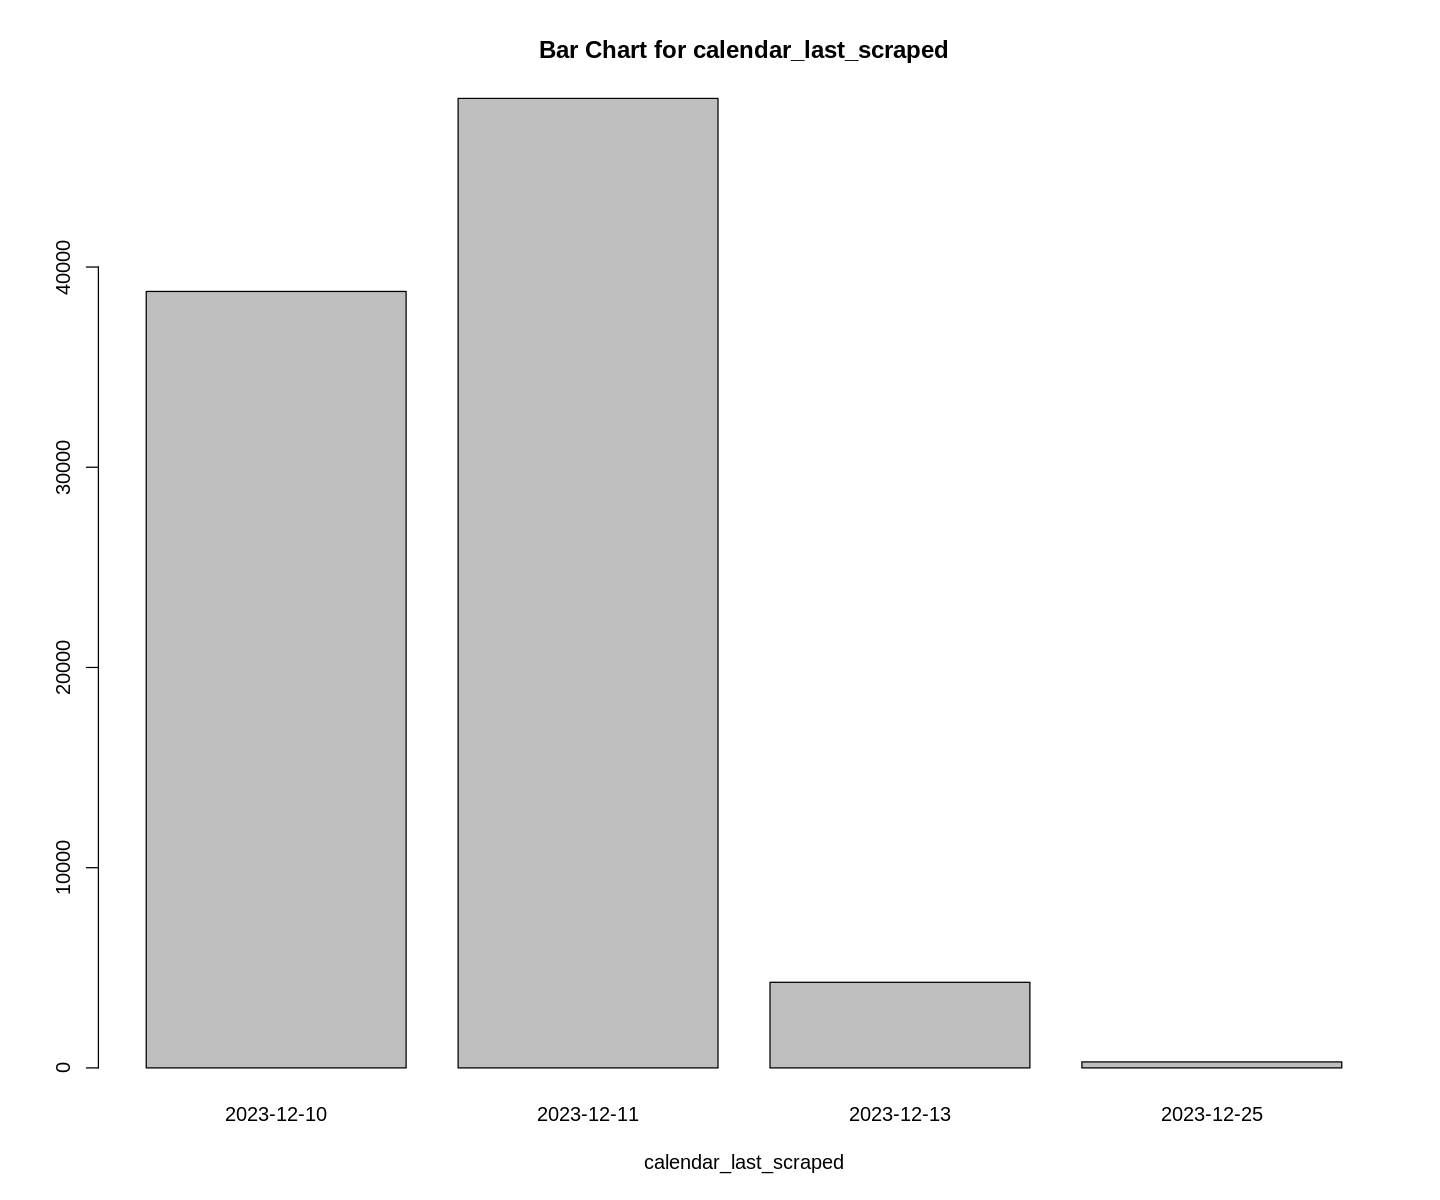

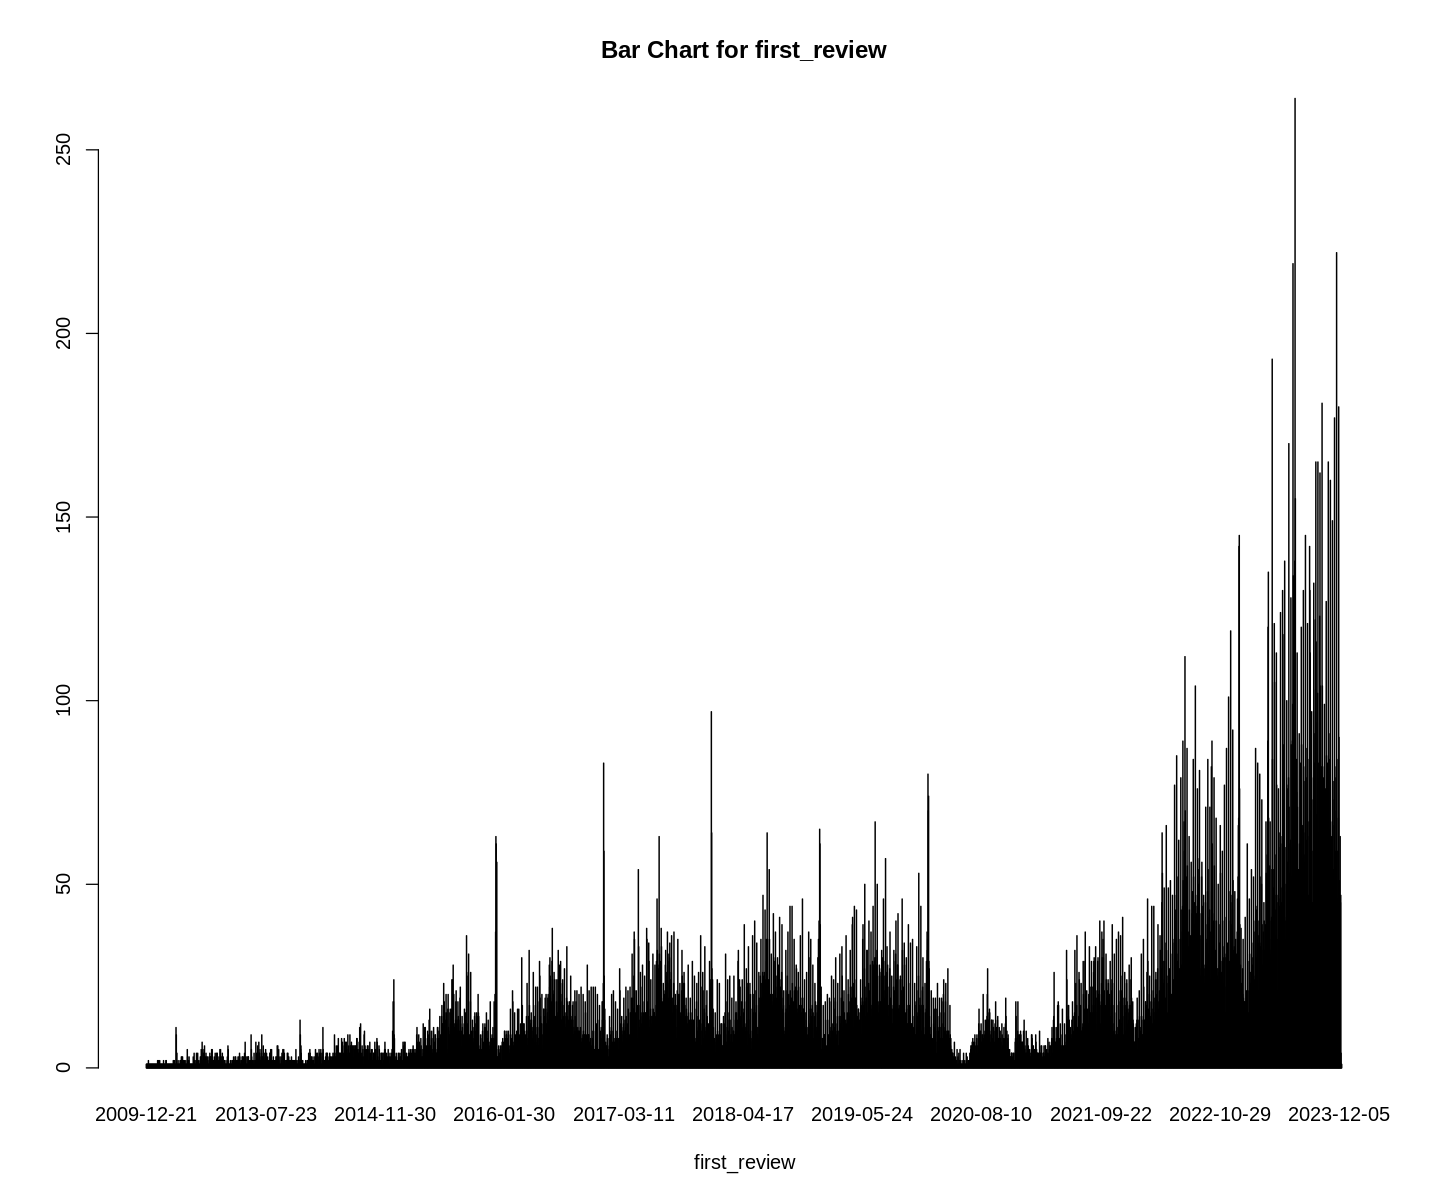

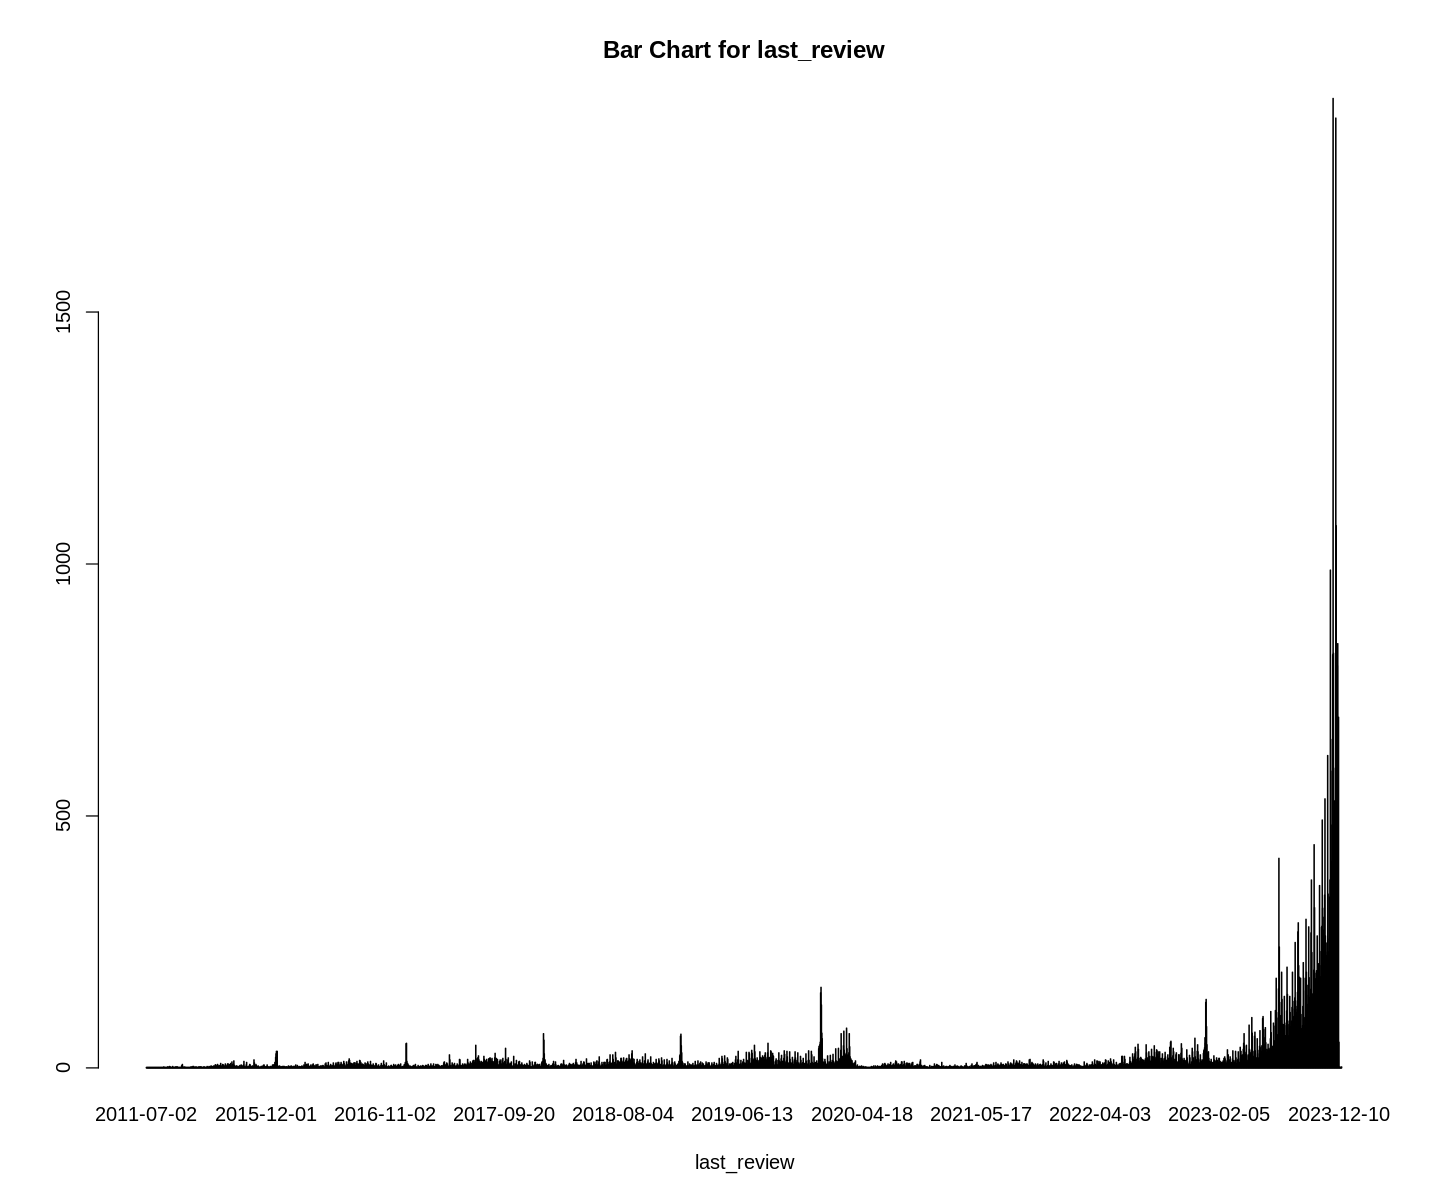

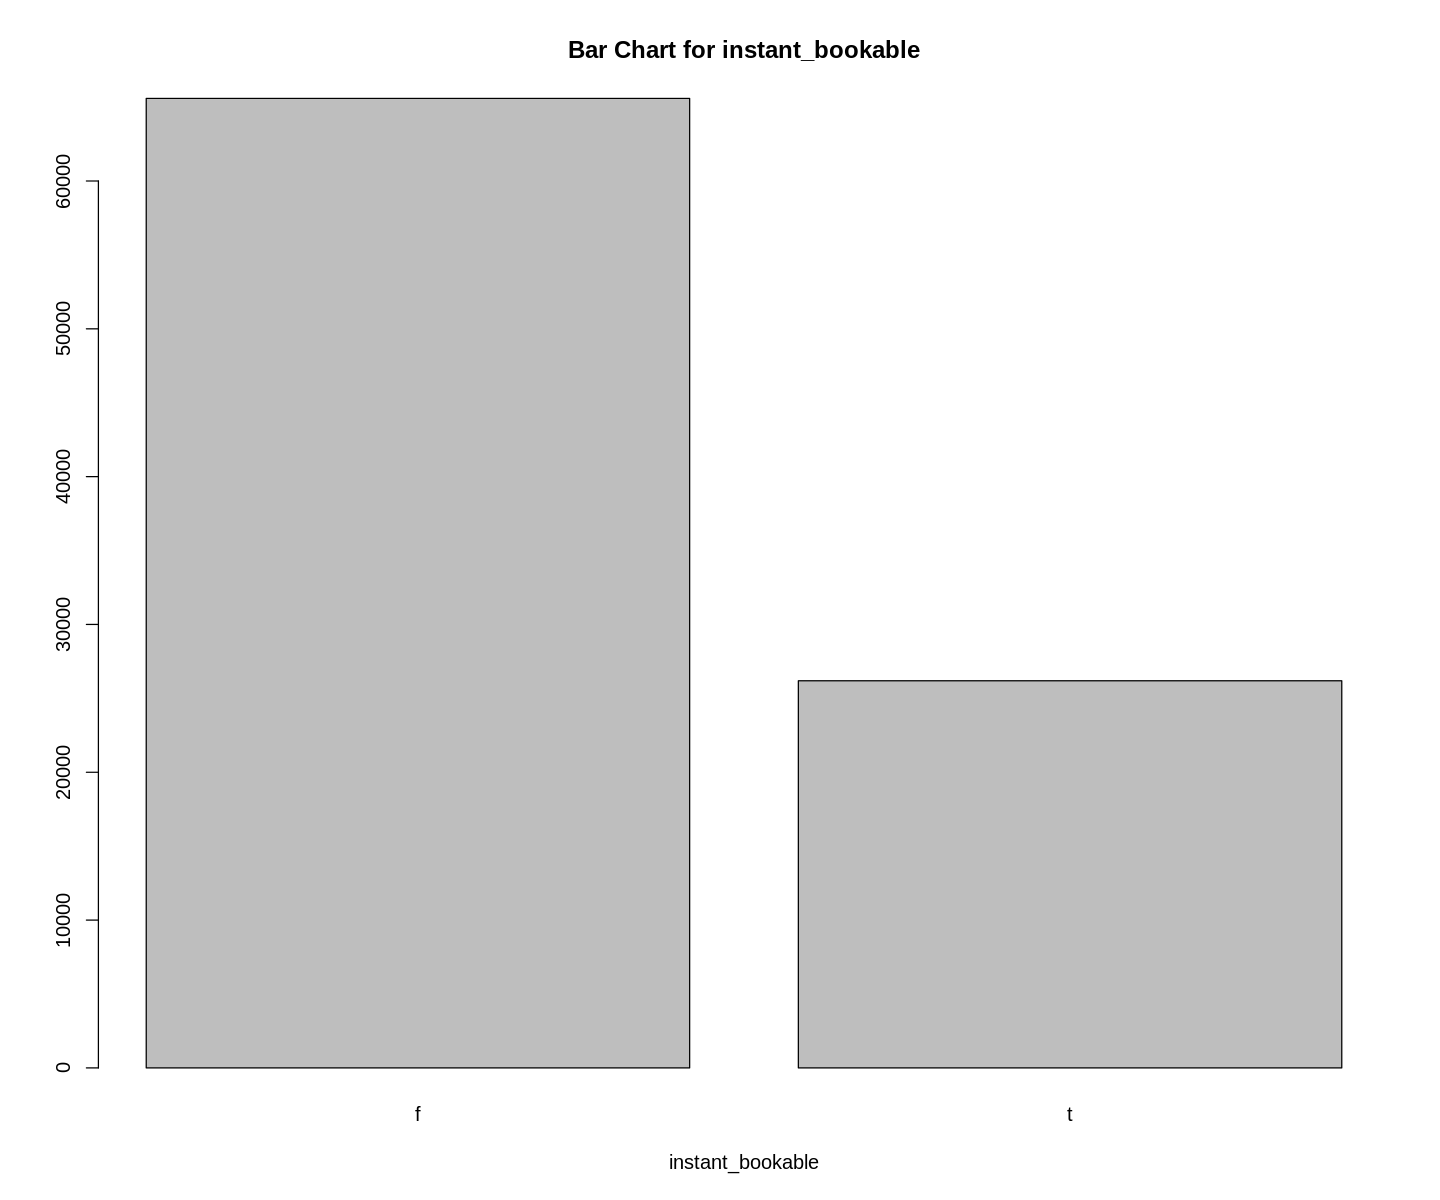

In [110]:
# Bar charty dla wybranych zmiennych kategorycznych
for (col in categorical) {
  freq <- table(df[[col]])
  barplot(freq, main = paste("Bar Chart for", col), xlab = col)
}

**Podsumowanie braków danych**:  

Zmienne numeryczne:  
* puste kolumny: description, neighbourhood_cleansed, calendar_updated, license, bedrooms - dane mogą być usunięte
* pusta kolumna: bathrooms - można uzupełnić przez bathrooms_text
* kolumny nieważne do analizy: scrape_id, host_id
* pojawiają się outliery dla niektórych zmiennych
* pojawiają się dane skośne

Zmienne kategoryczne:
* wiele kolumn nieważnych do analizy - głównie url lub opisy
* daty: last_scraped, calendar_last_scraped, host_since, first_review, last_review - trzeba przekształcić na daty
* dane procentowe: host_response_rate, host_acceptance rate - można przekształcić na ułamki
* dane t/f: host_is_superhost, host_has_profile_pic, instant_bookable, host_identity_verified, has_availability - przekształcić t/f na 1/0
* dane tabelaryczne: host_verifications - można przekształcić format zapisu
* price trzeba przekształcić na numeryczny
* dane o nie za dużej ilości kategorii trzeba zamienić z object na category

## 8.
Przeprowadzenie czyszczenia danych, obejmujące m.in.:  
a. uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych,  
b. przycięcie odstających wartości (ang. outliers) – pomocne będą m.in. takie techniki, jak wykres punktowy (gdzie nanosimy na obu osiach ten sam atrybut) lub wykres pudełkowy i ewentualna normalizacja danych numerycznych (metodą min-max lub Z-score) – niektóre algorytmy modelowania danych są wrażliwe na punkty odstające (np. metody regresji liniowej, korelacja Pearsona) czy różnice w zakresie zmienności poszczególnych atrybutów (niektóre algorytmy klasyfikacji bądź grupowania)

In [111]:
# usunięcie niepotrzebnych kolumn
data = subset(df, select = -c(description, # puste
                              neighbourhood_group_cleansed, # puste, zamiast tego można użyć neighbourhood_cleansed
                              license, # puste
                              calendar_updated, # puste
                              bedrooms, # nie ma skąd wziąć tej informacji
                              amenities # puste tabele
              ) )

In [112]:
names(data)

[1] "id"                                          
 [2] "listing_url"                                 
 [3] "scrape_id"                                   
 [4] "last_scraped"                                
 [5] "source"                                      
 [6] "name"                                        
 [7] "neighborhood_overview"                       
 [8] "picture_url"                                 
 [9] "host_id"                                     
[10] "host_url"                                    
[11] "host_name"                                   
[12] "host_since"                                  
[13] "host_location"                               
[14] "host_about"                                  
[15] "host_response_time"                          
[16] "host_response_rate"                          
[17] "host_acceptance_rate"                        
[18] "host_is_superhost"                           
[19] "host_thumbnail_url"                          
[20] "host_picture_url"                            
[21] "host_neighbourhood"                          
[22] "host_listings_count"                         
[23] "host_total_listings_count"                   
[24] "host_verifications"                          
[25] "host_has_profile_pic"                        
[26] "host_identity_verified"                      
[27] "neighbourhood"                               
[28] "neighbourhood_cleansed"                      
[29] "latitude"                                    
[30] "longitude"                                   
[31] "property_type"                               
[32] "room_type"                                   
[33] "accommodates"                                
[34] "bathrooms"                                   
[35] "bathrooms_text"                              
[36] "beds"                                        
[37] "price"                                       
[38] "minimum_nights"                              
[39] "maximum_nights"                              
[40] "minimum_minimum_nights"                      
[41] "maximum_minimum_nights"                      
[42] "minimum_maximum_nights"                      
[43] "maximum_maximum_nights"                      
[44] "minimum_nights_avg_ntm"                      
[45] "maximum_nights_avg_ntm"                      
[46] "has_availability"                            
[47] "availability_30"                             
[48] "availability_60"                             
[49] "availability_90"                             
[50] "availability_365"                            
[51] "calendar_last_scraped"                       
[52] "number_of_reviews"                           
[53] "number_of_reviews_ltm"                       
[54] "number_of_reviews_l30d"                      
[55] "first_review"                                
[56] "last_review"                                 
[57] "review_scores_rating"                        
[58] "review_scores_accuracy"                      
[59] "review_scores_cleanliness"                   
[60] "review_scores_checkin"                       
[61] "review_scores_communication"                 
[62] "review_scores_location"                      
[63] "review_scores_value"                         
[64] "instant_bookable"                            
[65] "calculated_host_listings_count"              
[66] "calculated_host_listings_count_entire_homes" 
[67] "calculated_host_listings_count_private_rooms"
[68] "calculated_host_listings_count_shared_rooms" 
[69] "reviews_per_month"

In [113]:
# przypisanie z powrotem do df
df <- data

In [114]:
# wartości unikalne w bathrooms_text
unique(df$bathrooms_text)

[1] "1 shared bath"     "1 private bath"    "1.5 baths"        
 [4] "1 bath"            ""                  "3 baths"          
 [7] "1.5 shared baths"  "2 baths"           "3.5 baths"        
[10] "2.5 baths"         "Half-bath"         "4 baths"          
[13] "2.5 shared baths"  "2 shared baths"    "6.5 baths"        
[16] "4.5 baths"         "0 baths"           "3 shared baths"   
[19] "Shared half-bath"  "5.5 baths"         "5 baths"          
[22] "0 shared baths"    "Private half-bath" "7 baths"          
[25] "3.5 shared baths"  "6 baths"           "5.5 shared baths" 
[28] "4.5 shared baths"  "5 shared baths"    "12 baths"         
[31] "4 shared baths"    "48 baths"          "8 baths"          
[34] "12.5 baths"        "13 baths"          "10.5 baths"       
[37] "16.5 baths"        "10 baths"          "7.5 baths"        
[40] "7 shared baths"    "9 baths"           "8 shared baths"   
[43] "17 baths"          "9.5 baths"         "8.5 baths"        
[46] "23 baths"          "16 baths"          "13 shared baths"  
[49] "6 shared baths"    "22 baths"          "20 baths"

In [115]:
# Transformacja bathrooms_text na bathrooms
df$bathrooms <- as.numeric(gsub("[^0-9.]", "", df$bathrooms_text))
df$bathrooms <- ifelse(grepl("half-bath", df$bathrooms_text, ignore.case = TRUE), 0.5, df$bathrooms)

In [116]:
# Sprawdzenie czy jest wartość 0.5 oraz wartości NaN
unique(df$bathrooms)

[1]  1.0  1.5   NA  3.0  2.0  3.5  2.5  0.5  4.0  6.5  4.5  0.0  5.5  5.0  7.0
[16]  6.0 12.0 48.0  8.0 12.5 13.0 10.5 16.5 10.0  7.5  9.0 17.0  9.5  8.5 23.0
[31] 16.0 22.0 20.0

In [117]:
# sprawdzenie ile jest wartości NaN
sum(is.na(df$bathrooms))

[1] 102

In [118]:
# zamiana liczby łazienek na medianę
median_bathrooms <- median(df$bathrooms, na.rm = TRUE)
df$bathrooms[is.na(df$bathrooms)] <- median_bathrooms

In [119]:
# sprawdzenie ile jest wartości NaN
sum(is.na(df$bathrooms))

[1] 0

In [120]:
# dane 't'/'f'
head(df[ ,c('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable')], 3)

host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
<chr>,<chr>,<chr>,<chr>,<chr>
f,t,t,t,f
f,t,f,t,f
t,t,t,t,t


In [121]:
# zamiana t/f na 1/0, zakładając, że jeśli NaN to fdf <- df %>%
df <- df %>%
  mutate(across(c('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable'), ~ map_dbl(.x, ~ if_else(.x == "t", 1, 0))))

In [122]:
# dane 't'/'f'
head(df[ ,c('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable')], 3)

host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,0
0,1,0,1,0
1,1,1,1,1


In [123]:
# sprawdzenie wartości nan
sapply(df[, c('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable')],
       \(x) any(is.na(x)))

host_is_superhost   host_has_profile_pic host_identity_verified 
                 FALSE                  FALSE                  FALSE 
      has_availability       instant_bookable 
                 FALSE                  FALSE

In [124]:
# wartości procentowe
head(df[, c('host_response_rate', 'host_acceptance_rate')], 3)

host_response_rate,host_acceptance_rate
<chr>,<chr>
100%,75%
N/A,N/A
100%,100%


In [125]:
# przekształcenie wartości w procentach na zakres 0-1
df <- df %>%
  mutate(across(c('host_response_rate', 'host_acceptance_rate'), ~ as.numeric(gsub('%', '', .))/100))

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [126]:
sapply(df[, c('host_response_rate', 'host_acceptance_rate')], function(x) sum(is.na(x)))

host_response_rate host_acceptance_rate 
               30673                25693

In [127]:
summary(df[, c('host_response_rate', 'host_acceptance_rate')])

 host_response_rate host_acceptance_rate
 Min.   :0.000      Min.   :0.000       
 1st Qu.:0.970      1st Qu.:0.780       
 Median :1.000      Median :0.960       
 Mean   :0.916      Mean   :0.835       
 3rd Qu.:1.000      3rd Qu.:1.000       
 Max.   :1.000      Max.   :1.000       
 NA's   :30673      NA's   :25693       

In [128]:
# zamiana danych wartościami średnimi
df <- df %>%
  mutate(across(c('host_response_rate', 'host_acceptance_rate'), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

In [129]:
sapply(df[, c('host_response_rate', 'host_acceptance_rate')], function(x) sum(is.na(x)))

host_response_rate host_acceptance_rate 
                   0                    0

In [130]:
# Sprawdzenie kolumn z datą - jak widać typ jest IDate, dlatego nie wymaga konwersji
head(df[, c('last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review')],5)

last_scraped,host_since,calendar_last_scraped,first_review,last_review
<IDate>,<IDate>,<IDate>,<IDate>,<IDate>
2023-12-10,2011-08-14,2023-12-10,2011-08-22,2023-03-16
2023-12-10,2010-06-14,2023-12-10,2010-10-16,2022-08-01
2023-12-10,2010-07-04,2023-12-10,2010-09-22,2023-12-03
2023-12-11,2011-12-07,2023-12-11,2012-07-16,2022-07-04
2023-12-10,2009-11-16,2023-12-10,2011-08-14,2023-12-03


In [131]:
sapply(df[, c('last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review')], function(x) sum(is.na(x)))

last_scraped            host_since calendar_last_scraped 
                    0                     5                     0 
         first_review           last_review 
                24123                 24123

In [132]:
# przypisanie średniej do brakujących danych
df <- df %>%
  mutate(across(c('host_since', 'first_review', 'last_review'), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

In [133]:
sapply(df[, c('host_since', 'first_review', 'last_review')], function(x) sum(is.na(x)))

host_since first_review  last_review 
           0            0            0

In [134]:
# sprawdzenie typu zmiennej price
class(df$price)

[1] "character"

In [135]:
tail(df$price,10)

[1] "$167.00" "$188.00" "$61.00"  "$111.00" "$500.00" "$500.00" "$289.00"
 [8] "$400.00" "$60.00"  "$92.00"

In [136]:
# zamiana na float
df$price <- as.numeric(sub("\\$", "", df$price))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [137]:
tail(df$price,10)

[1] 167 188  61 111 500 500 289 400  60  92

In [138]:
# Wartość makasymalna jest dużo wyższa od mediany i minimum
summary(df$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    65.0   111.0   150.5   188.0   999.0    6060 

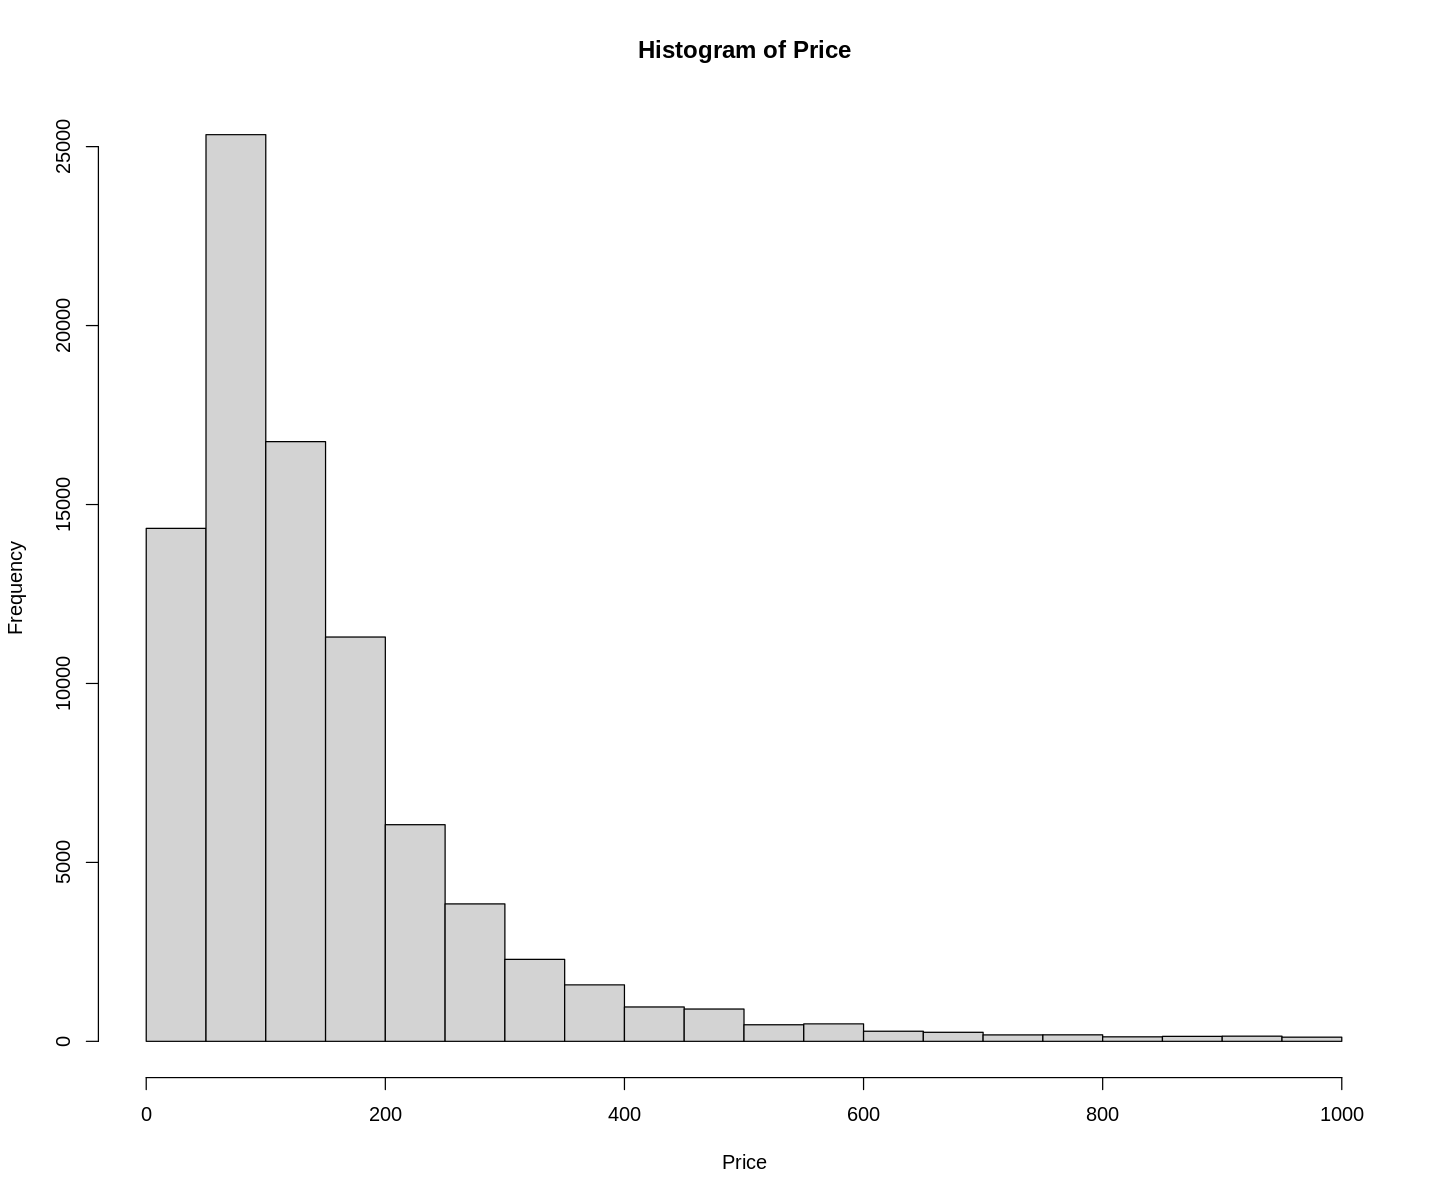

In [139]:
# Histogram dla price
hist(df$price,
    xlab = 'Price',
    main = 'Histogram of Price')

In [140]:
print('Przedział większości danych (w procentach) znajduje się do wartości:')
print(quantile(df$price, 0.95, na.rm = TRUE))

[1] "Przedział większości danych (w procentach) znajduje się do wartości:"
95% 
400 


In [141]:
# Usunięcie wartości powyżej 95-tego kwantyla
q <- quantile(df$price, 0.95, na.rm = TRUE)
df <- df[df$price <= q, ]

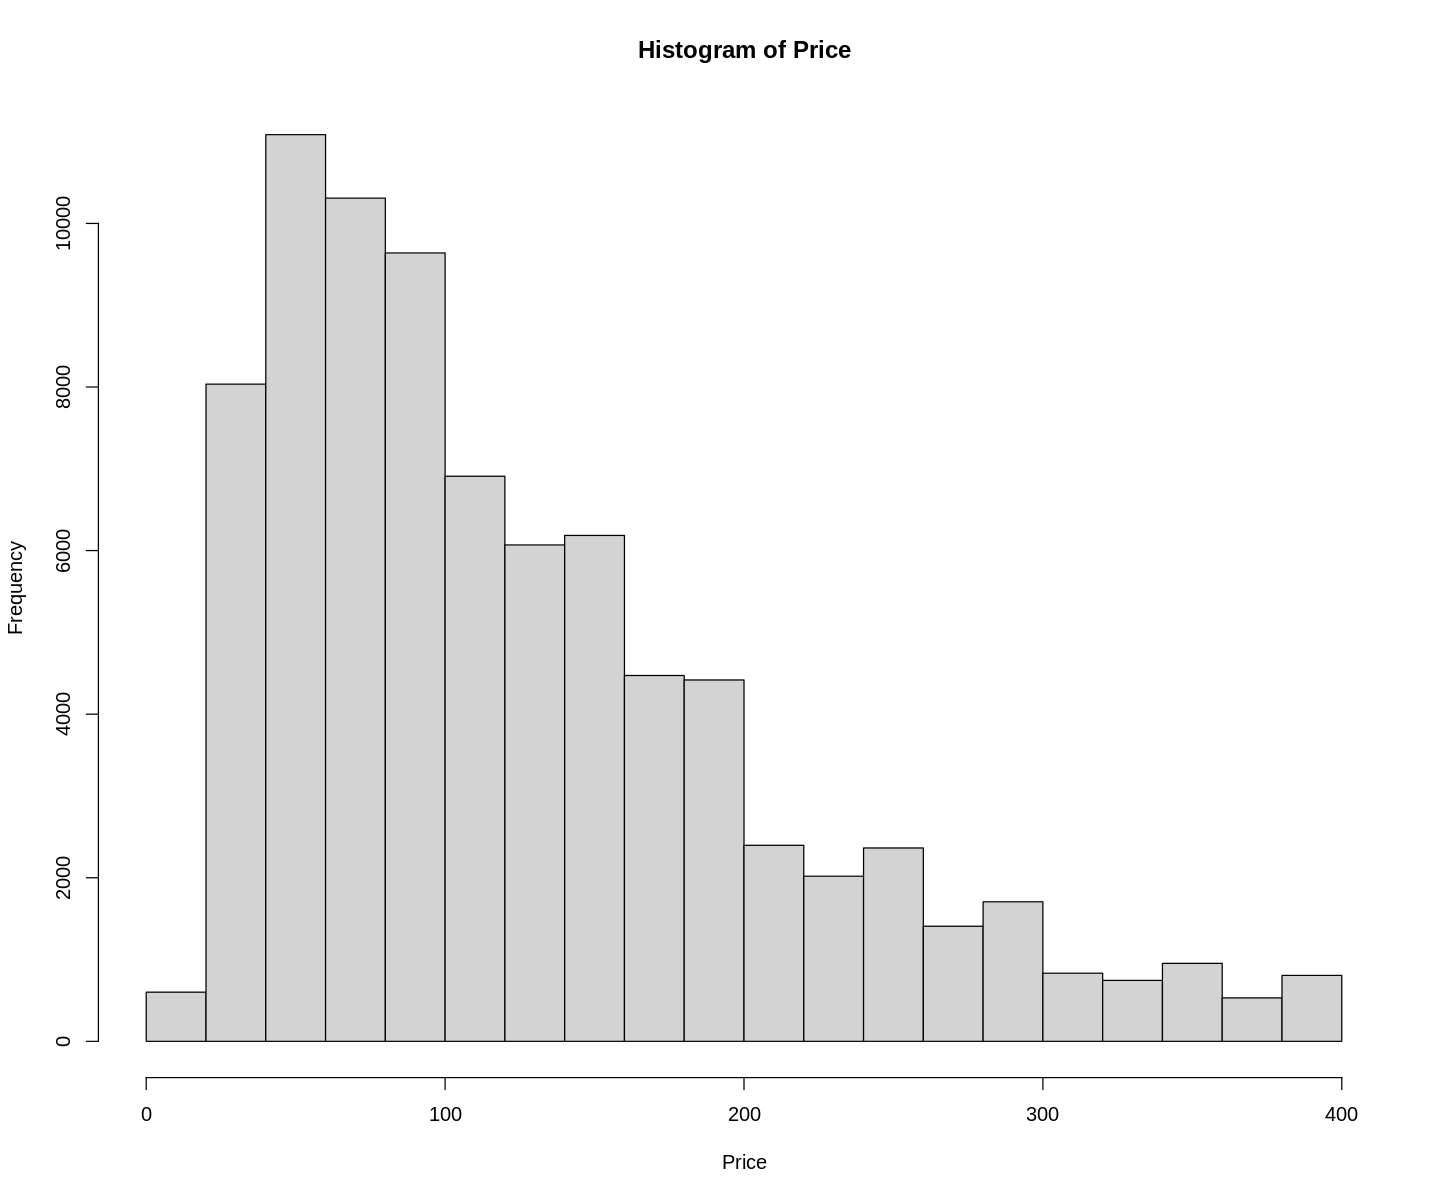

In [142]:
# Histogram dla price po usunięciu outlierów
hist(df$price,
    xlab = 'Price',
    main = 'Histogram of Price')

In [143]:
# wartości nan dla price
sum(is.na(df$price))

[1] 0

In [144]:
summary(df)

      id            listing_url          scrape_id             
 Length:81484       Length:81484       Min.   :20231210055232  
 Class :character   Class :character   1st Qu.:20231210055232  
 Mode  :character   Mode  :character   Median :20231210055232  
                                       Mean   :20231210055232  
                                       3rd Qu.:20231210055232  
                                       Max.   :20231210055232  
                                                               
  last_scraped           source              name          
 Min.   :2023-12-10   Length:81484       Length:81484      
 1st Qu.:2023-12-10   Class :character   Class :character  
 Median :2023-12-11   Mode  :character   Mode  :character  
 Mean   :2023-12-10                                        
 3rd Qu.:2023-12-11                                        
 Max.   :2023-12-25                                        
                                                           
 neighbo

In [145]:
dim(df)

[1] 81484    69

In [146]:
# sprawdzenie czy są nan w host_response_rate
sum(is.na(df$host_response_rate))

[1] 0

In [147]:
# Sprawdzenie, które kolumny mają braki danych w brakujących wierszach
missing_data_rows <- df[!complete.cases(df), ]
missing_columns <- colnames(df)[colSums(is.na(missing_data_rows)) > 0]
print(missing_columns)

 [1] "host_about"                  "host_listings_count"        
 [3] "host_total_listings_count"   "beds"                       
 [5] "review_scores_rating"        "review_scores_accuracy"     
 [7] "review_scores_cleanliness"   "review_scores_checkin"      
 [9] "review_scores_communication" "review_scores_location"     
[11] "review_scores_value"         "reviews_per_month"          


In [148]:
tail(df,2)

id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
<chr>,<chr>,<int64>,<IDate>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<IDate>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
951192793768996976,https://www.airbnb.com/rooms/951192793768996976,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · 1 bedroom · 1 bed · Half-bath,,https://a0.muscache.com/pictures/miso/Hosting-951192793768996976/original/decbec06-4533-4cca-9f11-a595888c8c0f.jpeg,56125082,https://www.airbnb.com/users/show/56125082,Ellis,16825,,,a few days or more,0,0.00,0,https://a0.muscache.com/im/pictures/user/479db7d8-d0cf-452c-99cf-5493882011f6.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/479db7d8-d0cf-452c-99cf-5493882011f6.jpg?aki_policy=profile_x_medium,,1,1,"['email', 'phone']",1,1,,Barnet,51.58538,-0.163443,Private room in rental unit,Private room,1,0.5,Half-bath,1,60,1,365,1,1,365,365,1,365,1,29,59,89,269,2023-12-10,0,0,0,18535,19166,NA,NA,NA,NA,NA,NA,NA,0,1,0,1,0,NA
952607914901368427,https://www.airbnb.com/rooms/952607914901368427,20231210055232,2023-12-10,city scrape,Condo in Greater London · ★3.89 · 1 bedroom · 2 beds · 1 bath,,https://a0.muscache.com/pictures/8db8130e-9f93-4b62-9747-d6f156637982.jpg,513281832,https://www.airbnb.com/users/show/513281832,Lukman,19482,,,within an hour,1,0.99,0,https://a0.muscache.com/im/pictures/user/User-513281832/original/6babbb91-2f60-4f0e-8f14-90f7501340cd.jpeg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/User-513281832/original/6babbb91-2f60-4f0e-8f14-90f7501340cd.jpeg?aki_policy=profile_x_medium,,6,6,"['email', 'phone']",1,1,,City of London,51.52108,-0.096550,Entire condo,Entire home/apt,3,1.0,1 bath,2,92,3,365,1,3,1125,1125,3,1125,1,7,7,7,95,2023-12-10,9,9,3,19603,19688,3.89,4.56,3.78,4.44,4.33,4.56,3.89,1,6,6,0,0,2.73


In [149]:
# Usunięcie kolumn ze zbyt małą ilością danych
data = subset(df, select = -c(host_neighbourhood,
                              host_about,
                              neighborhood_overview,
                              neighbourhood
              ) )
df <- data

In [150]:
# Ile danych z reviews per month według 95-tego kwantyla
print('Przedział większości danych (w procentach) znajduje się do wartości:')
print(quantile(df$reviews_per_month, 0.95, na.rm = TRUE))

[1] "Przedział większości danych (w procentach) znajduje się do wartości:"
 95% 
3.82 


In [151]:
# usuwanie outlierów z wartości reviews_per_month - może usunie też inne outliery?
q <- quantile(df$reviews_per_month, 0.95, na.rm = TRUE)
df <- df[df$reviews_per_month <= q, ]

In [152]:
# najczęstsza wartość w host_responose_time
mode <- function(x) names(sort(table(x), decreasing = TRUE))[1]
mode(df$host_response_time)

[1] "within an hour"

In [153]:
# wypełnienie wartości nan modą
df$host_response_time[is.na(df$host_response_time)] <- 'within an hour'

In [154]:
# Procentowa wartość brakujących danych
missing_percentages <- df %>%
  summarise_all(~ mean(is.na(.)) * 100) %>%
  gather(key = "variable", value = "missing_percentage") %>%
  filter(missing_percentage > 0) %>%
  mutate(missing_percentage = sprintf("%.2f%%", missing_percentage)) %>%
  arrange(desc(as.numeric(gsub("%", "", missing_percentage))))

print(missing_percentages)

                     variable missing_percentage
1                        beds              1.09%
2         review_scores_value              0.09%
3       review_scores_checkin              0.08%
4      review_scores_location              0.08%
5      review_scores_accuracy              0.04%
6 review_scores_communication              0.04%
7   review_scores_cleanliness              0.03%


In [155]:
# sprawdzenie typu danej host_verifications
summary(df$host_verifications)

   Length     Class      Mode 
    59616 character character 

In [156]:
# sprawdzenie przykładu tekstu w tej kolumnie
head(df$host_verifications,10)

[1] "['email', 'phone']" "['email', 'phone']" "['email', 'phone']"
 [4] "['email', 'phone']" "['email', 'phone']" "['email', 'phone']"
 [7] "['email', 'phone']" "['email', 'phone']" "['email', 'phone']"
[10] "['email', 'phone']"

In [157]:
# zamiana tekstu tak, by usunąć nawiasy i slashe
df$host_verifications <- gsub("[^a-zA-Z0-9, ]", "", df$host_verifications)

In [158]:
head(df$host_verifications,10)

[1] "email, phone" "email, phone" "email, phone" "email, phone" "email, phone"
 [6] "email, phone" "email, phone" "email, phone" "email, phone" "email, phone"

In [159]:
# jeśli host_location jest puste, to będzie wypełnione Londynem
df$host_location[is.na(df$host_location)] <- 'London, United Kingdom'

In [160]:
# wartości nan w host_location
sum(is.na(df$host_location))

[1] 0

In [161]:
# wartość najczęściej występująca w beds
mode(df$beds)

[1] "1"

In [162]:
# wypełnienie wartości nan modą
df$beds[is.na(df$beds)] <- 1

In [163]:
sum(is.na(df$beds))

[1] 0

In [164]:
# Procentowa wartość brakujących danych
missing_percentages <- df %>%
  summarise_all(~ mean(is.na(.)) * 100) %>%
  gather(key = "variable", value = "missing_percentage") %>%
  filter(missing_percentage > 0) %>%
  mutate(missing_percentage = sprintf("%.2f%%", missing_percentage)) %>%
  arrange(desc(as.numeric(gsub("%", "", missing_percentage))))

print(missing_percentages)

                     variable missing_percentage
1         review_scores_value              0.09%
2       review_scores_checkin              0.08%
3      review_scores_location              0.08%
4      review_scores_accuracy              0.04%
5 review_scores_communication              0.04%
6   review_scores_cleanliness              0.03%


In [165]:
# wypełnienie pozostałych wartości nan odpowiadającą im średnią arytmetyczną
 kolumny_srednie <- c('review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy',
                      'review_scores_communication', 'review_scores_cleanliness')

for (col in kolumny_srednie) {
  mean_value <- mean(df[[col]], na.rm = TRUE)
  df[[col]][is.na(df[[col]])] <- mean_value
}

In [166]:
# liczba wartości niepustych
non_empty <- sapply(df, function(x) sum(!is.na(x)))
print(non_empty)

                                          id 
                                       59616 
                                 listing_url 
                                       59616 
                                   scrape_id 
                                       59616 
                                last_scraped 
                                       59616 
                                      source 
                                       59616 
                                        name 
                                       59616 
                                 picture_url 
                                       59616 
                                     host_id 
                                       59616 
                                    host_url 
                                       59616 
                                   host_name 
                                       59616 
                                  host_since 
                                  

In [167]:
# ile jest pustych wartosci w df?
sum(is.na(df))

[1] 0

## 9.
Zbadanie zależności pomiędzy zmiennymi – krok ten pozwoli odkryć związki pomiędzy poszczególnymi zmiennymi; informacje te mogą także zostać użyte, np. na etapie transformacji zmiennych lub do podjęcia decyzji, które zmienne wybrać do budowy modelu:  
a. obliczenie macierzy korelacji (można użyć współczynnika korelacji rang Spearmana lub współczynnika Pearsona) pomiędzy zmiennymi numerycznymi i zwizualizowanie ich za pomocą wykresów punktowych (ang. scatter plots) lub tzw. wykresów par zmiennych (ang. pairplots),  
b. ewentualne zbadanie zależności pomiędzy zmiennymi kategorycznymi (współczynnik V Cramméra) i zależności pomiędzy zmiennymi kategorycznymi i numerycznymi (współczynnik R modelu liniowego z jedną zmienną kategoryczną, która objaśnia zmienną numeryczną) oraz (podobnie jak powyżej) zwizualizowanie tych zależności w formie wykresów

In [168]:
# wybór kolumn numerycznych
df_num <- df %>% dplyr::select(where(is.numeric))

In [169]:
# usunięcie scrape_id
df_num <- df_num %>%
  select(-scrape_id)

In [170]:
tail(df_num,3)

host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
211074697,17765,1,1.00,0,7,13,1,1,51.48016,-0.1143752,6,1.0,3,289,3,20,3,7,20,20,3.1,20,1,25,25,25,25,2,2,0,19596,19610,3.00,3.00,3.00,4.00,4.00,4.00,3.00,1,7,7,0,0,0.57
526113148,19554,1,0.95,0,2,2,1,1,51.47832,-0.1806400,7,1.5,4,400,1,365,1,1,365,365,1.0,365,1,11,41,68,227,2,2,0,19617,19638,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,2,2,0,0,0.70
513281832,19482,1,0.99,0,6,6,1,1,51.52108,-0.0965500,3,1.0,2,92,3,365,1,3,1125,1125,3.0,1125,1,7,7,7,95,9,9,3,19603,19688,3.89,4.56,3.78,4.44,4.33,4.56,3.89,1,6,6,0,0,2.73


In [171]:
# wyliczenie macierzy korelacji
cor_matrix <- cor(df_num, use = "pairwise.complete.obs")

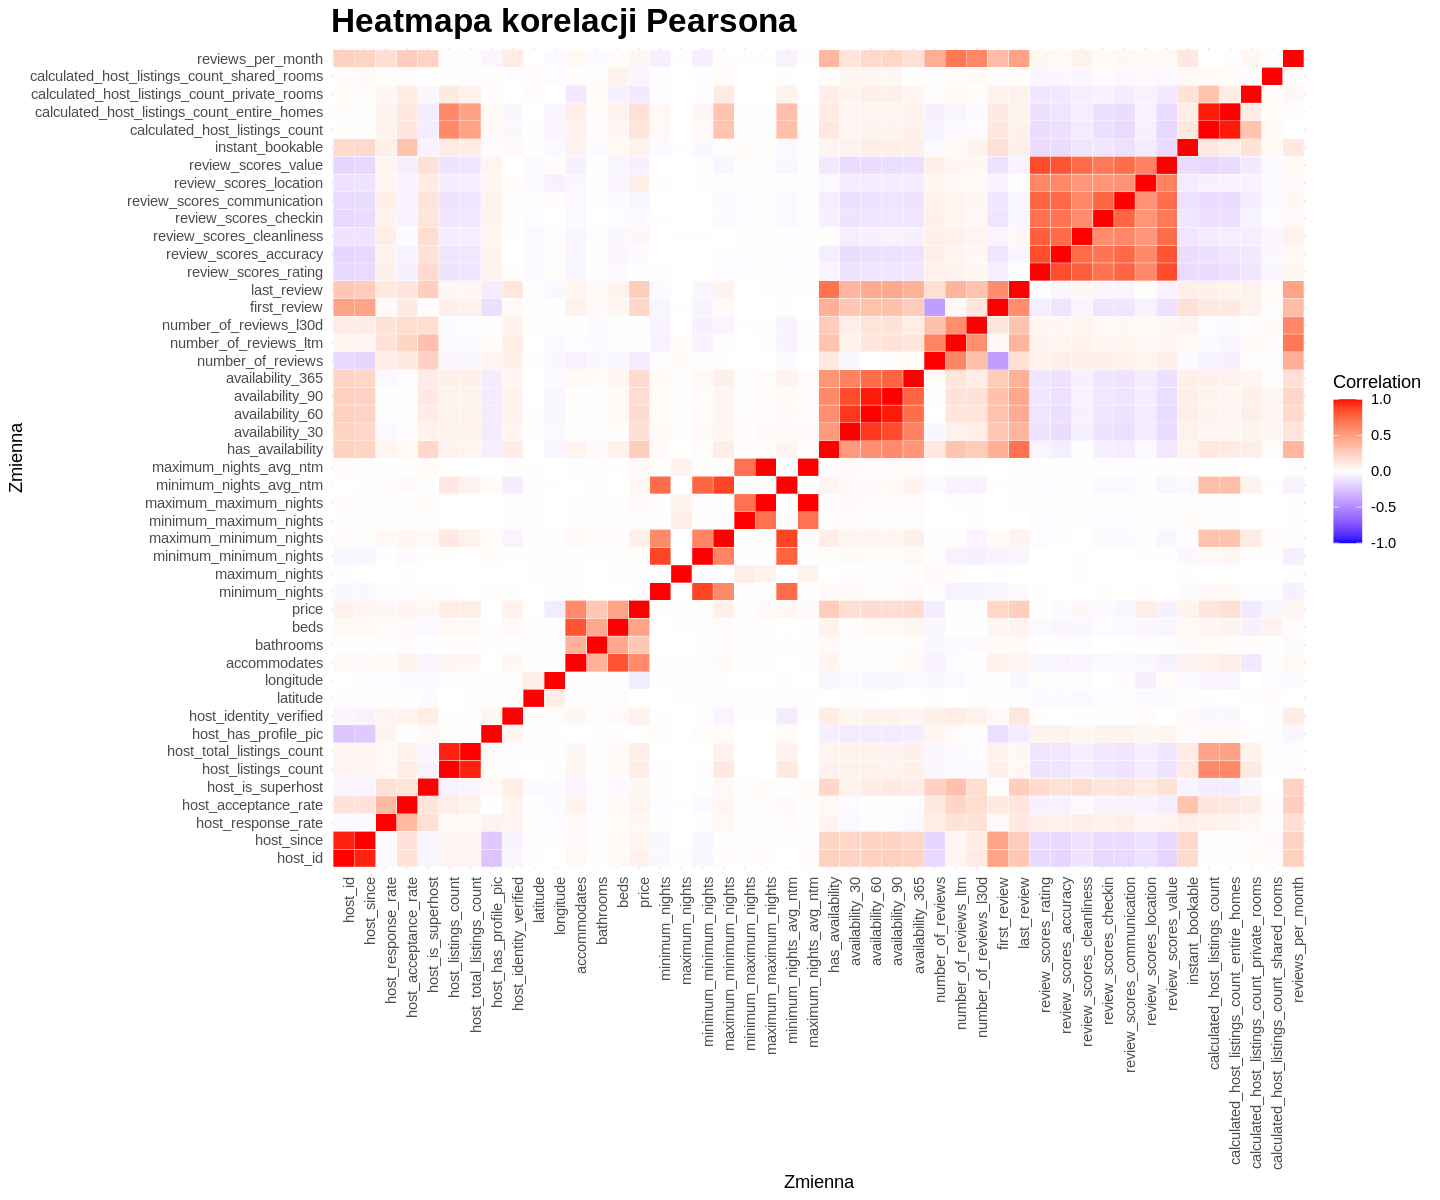

In [172]:
# melt danych do wykresu
cor_data <- reshape2::melt(cor_matrix)

# stworzenie wykresu korelacji
ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size = 20, face = "bold")) +
  labs(title = "Heatmapa korelacji Pearsona", x = "Zmienna", y = "Zmienna")

In [173]:
glimpse(df)

Rows: 59,616
Columns: 65
$ id                                           <chr> "198258", "33332", "42010…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <int64> 20231210055232, 2023121…
$ last_scraped                                 <IDate> 2023-12-10, 2023-12-10,…
$ source                                       <chr> "city scrape", "city scra…
$ name                                         <chr> "Rental unit in Barking ·…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <int> 967537, 144444, 157884, 1…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "Ryan", "Chi-Chi", "Agri …
$ host_since                                   <int> 15200, 14774, 14794, 1531…
$ host_location                                <chr> "Barking, United Kingdom"…
$ host_response

In [174]:
# transformacja typów character na factor
for (col in names(df)) {
  if (is.character(df[[col]])) {
    df[[col]] <- as.factor(df[[col]])
  }
}

In [175]:
# wybór danych do obliczeń
df_cat = subset(df, select = c(source,
                              host_response_time,
                              neighbourhood_cleansed,
                              property_type,
                              room_type,
                              bathrooms_text
              ) )

In [176]:
# funkcja licząca współczynniki V Cramera
cramers_V <- function(var1, var2) {
  crosstab <- table(var1, var2)
  chi_stat <- chisq.test(crosstab)$statistic
  obs <- sum(crosstab)
  mini <- min(dim(crosstab)) - 1
  sqrt(chi_stat / (obs * mini))
}

In [177]:
# obliczanie współczynników
rows <- list()

for (var1 in colnames(df_cat)) {
  col <- c()
  for (var2 in colnames(df_cat)) {
    cramers <- cramers_V(df_cat[[var1]], df_cat[[var2]])
    col <- c(col, round(cramers, 2))
  }
  rows[[var1]] <- col
}

cramers_results <- data.frame(rows, row.names = colnames(df_cat))

Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(crosstab):
“Chi-squared 

In [178]:
cramers_results

,source,host_response_time,neighbourhood_cleansed,property_type,room_type,bathrooms_text
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
source,1.00,0.70,0.17,0.18,0.03,0.07
host_response_time,0.70,1.00,0.09,0.12,0.04,0.06
neighbourhood_cleansed,0.17,0.09,1.00,0.09,0.12,0.05
property_type,0.18,0.12,0.09,1.00,0.97,0.20
room_type,0.03,0.04,0.12,0.97,1.00,0.50
bathrooms_text,0.07,0.06,0.05,0.20,0.50,1.00


In [179]:
# przygotowanie danych do wykresu
cramers_results <- do.call(rbind, rows)
colnames(cramers_results) <- colnames(df_cat)
rownames(cramers_results) <- colnames(df_cat)

melted_cramers_results <- melt(cramers_results, varnames = c("Var1", "Var2"), value.name = "CramersV")

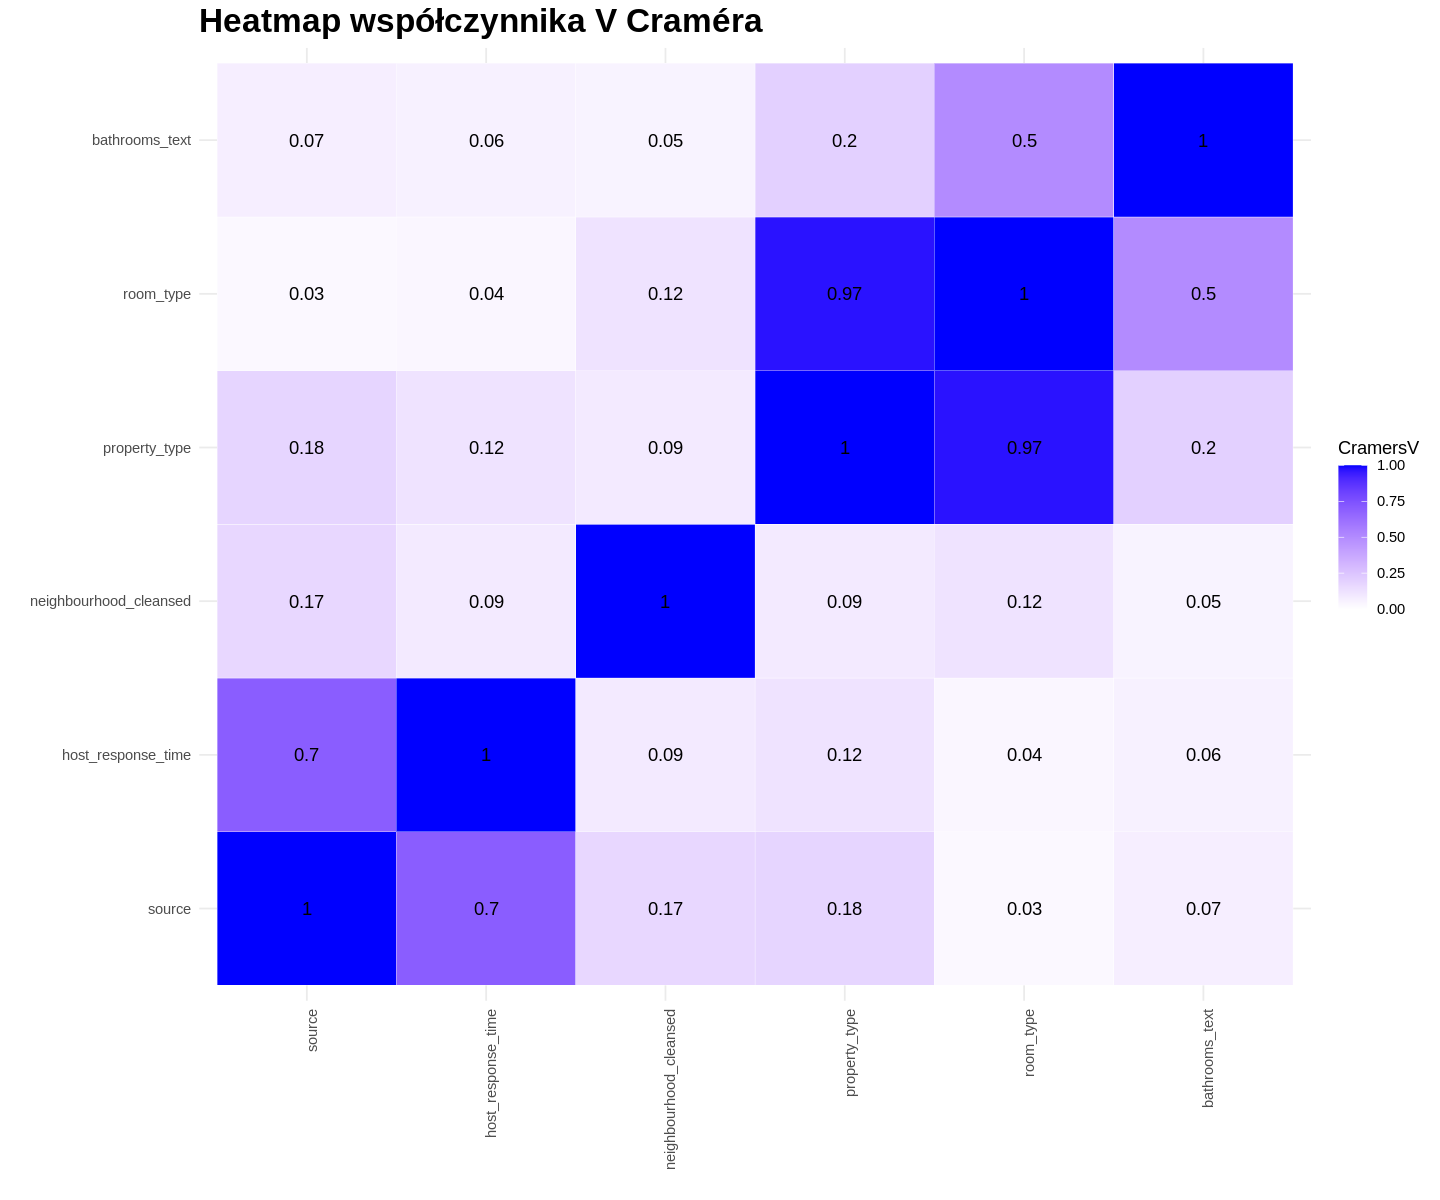

In [180]:
# heatmap współczynnika V Cramera
ggplot(data = melted_cramers_results, aes(x = Var1, y = Var2, fill = CramersV)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "blue", limits = c(0, 1)) +
  geom_text(aes(label = round(CramersV, 2)), color = "black") +
  theme_minimal() +
  labs(title = "Heatmap współczynnika V Craméra", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(size = 20, face = "bold"))

In [181]:
# wyliczenie współczynników R^2 dla jednej zmiennej numerycznej i kategorycznej
r_sq <- matrix(NA, nrow = length(colnames(df_num)), ncol = length(colnames(df_cat)), dimnames = list(colnames(df_num), colnames(df_cat)))

for (num in colnames(df_num)) {
  for (cat in colnames(df_cat)) {
    formula <- paste(num, "~ C(", cat, ")", sep = "")
    model <- lm(as.formula(formula), data = df)
    r_sq[num, cat] <- summary(model)$r.squared
  }
}

r_sq <- round(r_sq, 2)

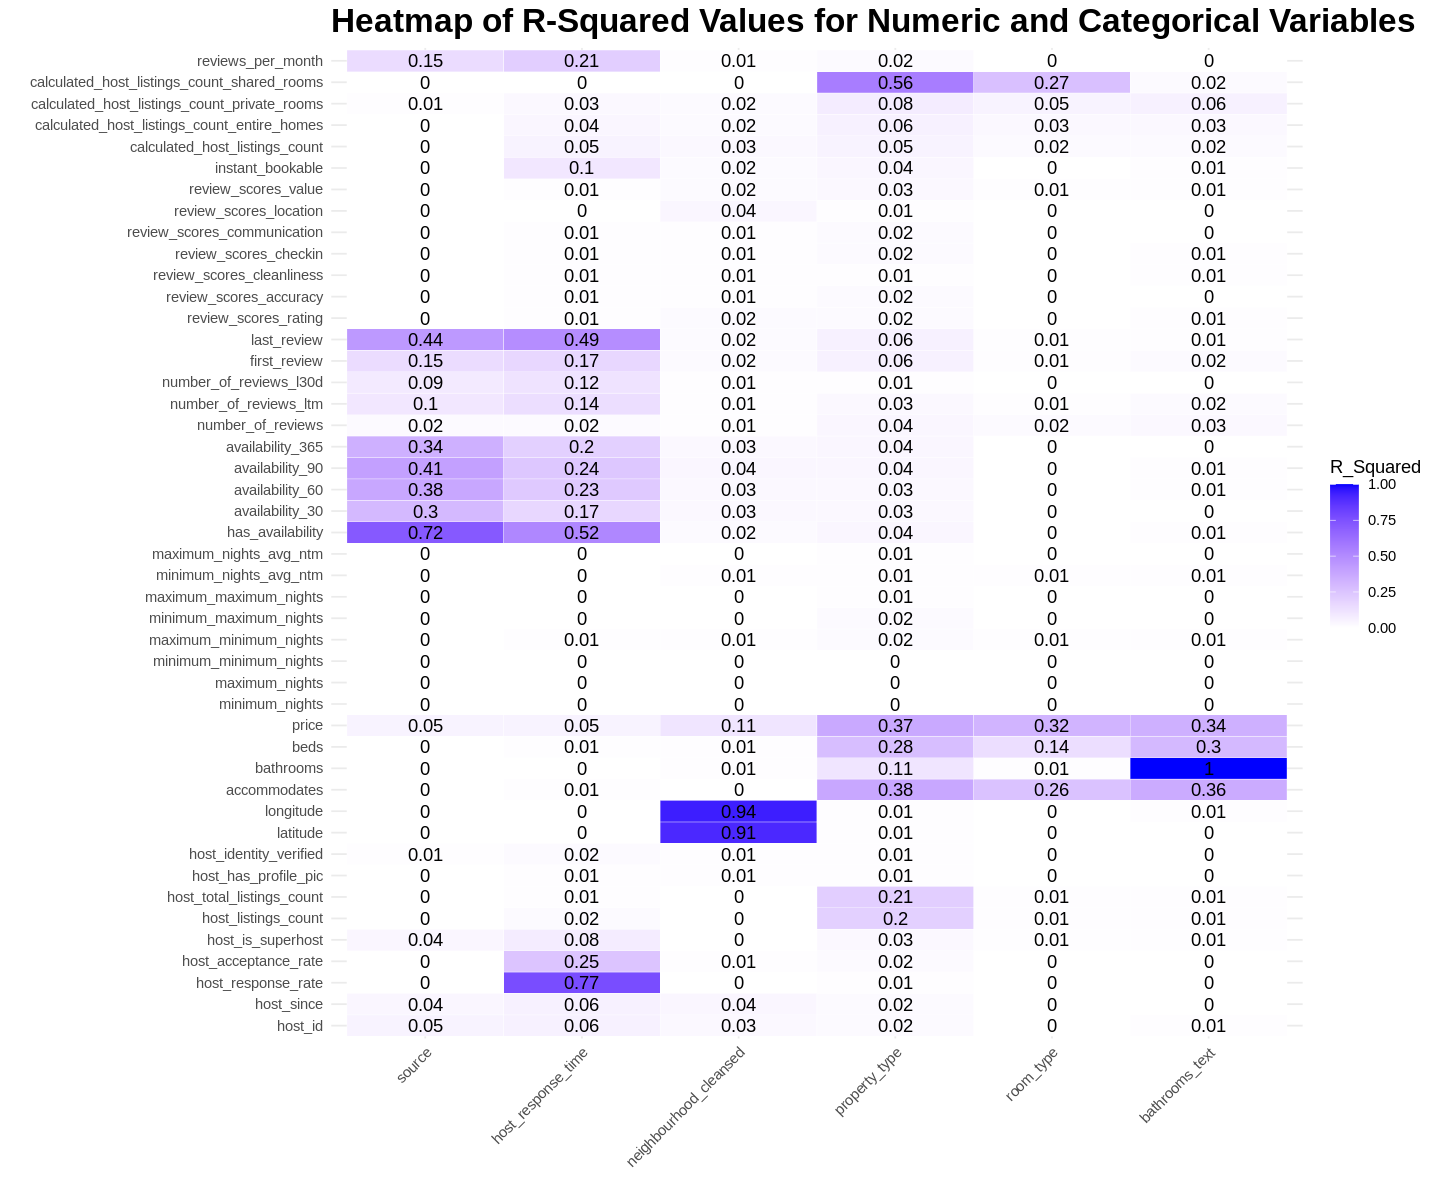

In [182]:
# wygenerowanie heatmapy
melted_r_sq <- melt(r_sq, varnames = c("NumericVar", "CategoricalVar"), value.name = "R_Squared")

ggplot(data = melted_r_sq, aes(x = CategoricalVar, y = NumericVar, fill = R_Squared)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "blue", limits = c(0, 1)) +
  geom_text(aes(label = round(R_Squared, 2)), color = "black") +
  theme_minimal() +
  labs(title = "Heatmap of R-Squared Values for Numeric and Categorical Variables", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
  plot.title = element_text(size = 20, face = "bold"))